In [1]:
using TSSM

┌ Info: Recompiling stale cache file /home/hofi/.julia/compiled/v0.7/TSSM/Mvhsy.ji for TSSM [d6c474b7-0cb8-5219-8a14-1c16c03f017a]
└ @ Base loading.jl:1185
┌ Warning: Package TSSM does not have LinearAlgebra in its dependencies:
│ - If you have TSSM checked out for development and have
│   added LinearAlgebra as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with TSSM
└ Loading LinearAlgebra into TSSM from project dependency, future warnings for TSSM are suppressed.


including tssm_fourier.jl for type Float64
    Fourier1D
    Fourier2D
    Fourier3D
    FourierReal1D
    FourierReal2D
    FourierReal3D
including tssm_fourier_bessel.jl for type Float64
    FourierBessel2D
    FourierBesselReal2D
    BesselRotSym1D
    BesselRotSymReal1D
including tssm_schroedinger.jl for type Float64
    Schroedinger1D
    Schroedinger2D
    Schroedinger3D
    SchroedingerReal1D
    SchroedingerReal2D
    SchroedingerReal3D
including tssm_schroedinger_rotating.jl for type Float64
    SchroedingerRotating2D
    SchroedingerRotating3D
    SchroedingerRotatingReal2D
    SchroedingerRotatingReal3D
including tssm_schroedinger_hermite.jl for type Float64
    SchroedingerHermite1D
    SchroedingerHermite2D
    SchroedingerHermite3D
    SchroedingerHermiteReal1D
    SchroedingerHermiteReal2D
    SchroedingerHermiteReal3D
including tssm_schroedinger_generalized_laguerre.jl for type Float64
    SchroedingerGeneralizedLaguerre2D
    SchroedingerGeneralizedLaguerreHermite3D
  

In [2]:
TSSM_dir = string(ENV["HOME"],"/.julia/dev/TSSM")
include(string(TSSM_dir, "/MCTDHF/mctdhf1d.jl"))
include(string(TSSM_dir, "/MCTDHF/check.jl"))
include(string(TSSM_dir, "/MCTDHF/propagators.jl"))
include(string(TSSM_dir, "/examples/time_propagators.jl"))

step! (generic function with 6 methods)

## Groundstate

In [3]:
V1(x) = -2/sqrt(x^2+0.7408^2)
V2(x,y) = 1/sqrt((x-y)^2+0.7408^2)
V(x,y) = V1(x) + V1(y) + V2(x,y)

V (generic function with 1 method)

In [4]:
m = MCTDHF1D(2, 6, 512, -16, 16, potential1=V1, potential2=V2, spin_restricted=true);
psi = wave_function(m);

┌ Warning: `cfunction(f, r, a::Tuple)` is deprecated, use `cfunction(f, r, Tuple{a...})` instead.
│   caller = cfunction_check_return_type(::Function, ::Type, ::Tuple{DataType}) at TSSM.jl:496
└ @ TSSM /home/hofi/.julia/dev/TSSM/src/TSSM.jl:496
┌ Warning: The function `cfunction` is now written as a macro `@cfunction`.
│   caller = cfunction(::Function, ::Type, ::Tuple{DataType}) at deprecated.jl:55
└ @ Base ./deprecated.jl:55
┌ Warning: `cfunction(f, r, a::Tuple)` is deprecated, use `cfunction(f, r, Tuple{a...})` instead.
│   caller = cfunction_check_return_type(::Function, ::Type, ::Tuple{DataType,DataType}) at TSSM.jl:496
└ @ TSSM /home/hofi/.julia/dev/TSSM/src/TSSM.jl:496
┌ Warning: The function `cfunction` is now written as a macro `@cfunction`.
│   caller = cfunction(::Function, ::Type, ::Tuple{DataType,DataType}) at deprecated.jl:55
└ @ Base ./deprecated.jl:55


In [5]:
groundstate!(psi, dt=0.1, max_iter=10000, output_step=10, tol=1e-5)

step=  10  E= -2.7041359242  err=   1.173e-01  E1= -2.6785934421  err1=   1.333e-01  ctime=      1.50
step=  20  E= -2.8608311638  err=   1.227e-02  E1= -2.8591520583  err1=   1.209e-02  ctime=      1.70
changed step size, old:   1.000000000000000e-01  new:   5.000000000000000e-02
step=  30  E= -2.8721066842  err=   1.288e-02  E1= -2.8709695954  err1=   9.254e-03  ctime=      1.82
changed step size, old:   5.000000000000000e-02  new:   2.500000000000000e-02
step=  40  E= -2.8830844471  err=   5.245e-02  E1= -2.8823192114  err1=   5.385e-02  ctime=      1.92
step=  50  E= -2.8923309956  err=   2.871e-02  E1= -2.8920580572  err1=   2.954e-02  ctime=      2.03
step=  60  E= -2.8958982378  err=   1.676e-02  E1= -2.8957814996  err1=   1.718e-02  ctime=      3.15
step=  70  E= -2.8975219408  err=   1.032e-02  E1= -2.8974655079  err1=   1.056e-02  ctime=      3.51
step=  80  E= -2.8983408469  err=   6.648e-03  E1= -2.8983112503  err1=   6.782e-03  ctime=      3.60
step=  90  E= -2.8987835247 

step= 780  E= -2.8994139163  err=   3.699e-05  E1= -2.8994139162  err1=   3.702e-05  ctime=    100.48
step= 790  E= -2.8994139182  err=   3.606e-05  E1= -2.8994139181  err1=   3.609e-05  ctime=    102.11
step= 800  E= -2.8994139199  err=   3.517e-05  E1= -2.8994139198  err1=   3.519e-05  ctime=    103.35
step= 810  E= -2.8994139215  err=   3.430e-05  E1= -2.8994139214  err1=   3.433e-05  ctime=    104.54
step= 820  E= -2.8994139231  err=   3.347e-05  E1= -2.8994139230  err1=   3.350e-05  ctime=    105.75
step= 830  E= -2.8994139245  err=   3.267e-05  E1= -2.8994139245  err1=   3.269e-05  ctime=    106.95
step= 840  E= -2.8994139259  err=   3.189e-05  E1= -2.8994139259  err1=   3.191e-05  ctime=    108.18
step= 850  E= -2.8994139272  err=   3.114e-05  E1= -2.8994139272  err1=   3.116e-05  ctime=    109.61
step= 860  E= -2.8994139285  err=   3.042e-05  E1= -2.8994139284  err1=   3.044e-05  ctime=    111.23
step= 870  E= -2.8994139296  err=   2.972e-05  E1= -2.8994139296  err1=   2.974e-0

In [6]:
save(psi, "wf_f2_n6_nx512_t0.h5")

"wf_f2_n6_nx512_t0.h5"

In [7]:
m2 = Schroedinger2Electrons(512, -16, 16, potential=V);
psi2 = wave_function(m2);

┌ Warning: `cfunction(f, r, a::Tuple)` is deprecated, use `cfunction(f, r, Tuple{a...})` instead.
│   caller = cfunction_check_return_type(::Function, ::Type, ::Tuple{DataType,DataType,DataType}) at TSSM.jl:496
└ @ TSSM /home/hofi/.julia/dev/TSSM/src/TSSM.jl:496
┌ Warning: The function `cfunction` is now written as a macro `@cfunction`.
│   caller = cfunction(::Function, ::Type, ::Tuple{DataType,DataType,DataType}) at deprecated.jl:55
└ @ Base ./deprecated.jl:55


In [8]:
convert_to_full!(psi2, psi);
norm(psi2.singlet),  norm(psi2.triplet_down),  norm(psi2.triplet_symm),  norm(psi2.triplet_up),

(1.0000000000000002, 0.0, 1.1038087341623065e-16, 0.0)

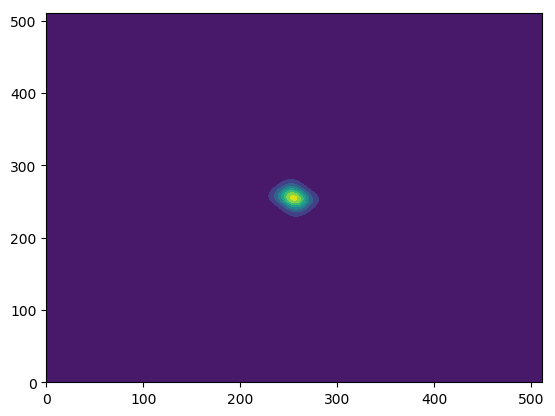

PyObject <matplotlib.contour.QuadContourSet object at 0x7fbf9812cb00>

In [9]:
using PyPlot
contourf(abs.(get_data(psi2.singlet)).^2)

## Time propagation

In [10]:
# trapezoidal envelope
function f(t)
    cycle = 2*pi/0.1837
    if t>=0.0 && t<=2*cycle
        return (1.0/(2*cycle))*t
    elseif t<=4*cycle
        return 1.0
    elseif t<=6*cycle
        return (-1.0/(2*cycle))*t+3
    else
        return 0.0
    end                
end
#laser field
E(t) = 0.1894*f(t)*sin(0.1837*t)

V1_t(x, t) = E(t)*x
V_t(x,y,t) = E(t)*(x+y)

m = MCTDHF1D(2, 6, 8192, -256, 256, potential1=V1, potential1_t=V1_t, potential2=V2, spin_restricted=true);
psi=wave_function(m);

T = 2*pi/0.1837

┌ Warning: `cfunction(f, r, a::Tuple)` is deprecated, use `cfunction(f, r, Tuple{a...})` instead.
│   caller = cfunction_check_return_type(::Function, ::Type, ::Tuple{DataType}) at TSSM.jl:496
└ @ TSSM /home/hofi/.julia/dev/TSSM/src/TSSM.jl:496
┌ Warning: The function `cfunction` is now written as a macro `@cfunction`.
│   caller = cfunction(::Function, ::Type, ::Tuple{DataType}) at deprecated.jl:55
└ @ Base ./deprecated.jl:55
┌ Warning: `cfunction(f, r, a::Tuple)` is deprecated, use `cfunction(f, r, Tuple{a...})` instead.
│   caller = cfunction_check_return_type(::Function, ::Type, ::Tuple{DataType,DataType}) at TSSM.jl:496
└ @ TSSM /home/hofi/.julia/dev/TSSM/src/TSSM.jl:496
┌ Warning: The function `cfunction` is now written as a macro `@cfunction`.
│   caller = cfunction(::Function, ::Type, ::Tuple{DataType,DataType}) at deprecated.jl:55
└ @ Base ./deprecated.jl:55


34.20351283167984

### Part 1

In [11]:
t0=0
tend=2*T
tol=1e-5
load!(psi, "wf_f2_n6_nx512_t0.h5")
set_time!(psi, t0)
time0 = time()
k = 1
told=t0
method = AdaptiveAdamsLawson(6)
for (t, tsi) in AdaptiveTimeStepper(method, psi, t0, tend, tol, 0.00001)
    n = norm(psi)
    E_pot = potential_energy(psi)
    E_kin = kinetic_energy(psi)
    E_tot = E_pot+E_kin
    stepsize = t - told
    @printf("%5i  %14.10f  %14.10f  %14.10f  %14.10f  %14.10f  %14.10f  %10.2f\n", 
        k, get_time(psi), n, E_pot, E_kin, E_tot, stepsize, time()-time0)
    told = t
    k += 1
end
save(psi, "wf_f2_n6_nx8192_t2.h5")

┌ Warning: The start/next/done iteration protocol is deprecated. Implement `iterate(::AdaptiveTimeStepper)`.
│   caller = ip:0x0
└ @ Core :-1


    1    0.0000100000    1.0000000000   -3.3195380815    0.4201241326   -2.8994139489    0.0000100000        5.26
    2    0.0000500000    1.0000000000   -3.3195380815    0.4201241326   -2.8994139489    0.0000400000        7.02
    3    0.0002100000    1.0000000000   -3.3195380816    0.4201241326   -2.8994139489    0.0001600000        8.27
    4    0.0008500000    1.0000000000   -3.3195380817    0.4201241328   -2.8994139489    0.0006400000        9.58
    5    0.0034100000    1.0000000000   -3.3195380826    0.4201241337   -2.8994139490    0.0025600000       10.85
    6    0.0136500000    0.9999999933   -3.3195380407    0.4201241308   -2.8994139099    0.0102400000       12.11
    7    0.0319370887    0.9999999932   -3.3195380608    0.4201241514   -2.8994139094    0.0182870887       13.47
t=  3.193708866e-02  err=   1.47248415e+00  dt=   2.05732868e-02  rejected...
    8    0.0525103754    0.9999999935   -3.3195381015    0.4201241903   -2.8994139112    0.0205732868       15.23
t=  5.2510

   71    0.9360092910    0.9999999931   -3.3195489231    0.4201350211   -2.8994139020    0.0140610375      101.59
   72    0.9500703289    0.9999999931   -3.3195491649    0.4201352626   -2.8994139024    0.0140610379      102.85
   73    0.9641313608    0.9999999931   -3.3195494075    0.4201355047   -2.8994139028    0.0140610319      104.29
   74    0.9781923949    0.9999999931   -3.3195496507    0.4201357474   -2.8994139033    0.0140610341      105.60
   75    0.9922534273    0.9999999931   -3.3195498945    0.4201359907   -2.8994139038    0.0140610324      107.01
   76    1.0063144556    0.9999999931   -3.3195501390    0.4201362346   -2.8994139044    0.0140610283      108.36
   77    1.0203754848    0.9999999931   -3.3195503841    0.4201364790   -2.8994139051    0.0140610292      109.75
   78    1.0344365127    0.9999999931   -3.3195506298    0.4201367239   -2.8994139059    0.0140610279      111.12
   79    1.0484975365    0.9999999931   -3.3195508760    0.4201369692   -2.8994139068   

  143    1.9483995117    0.9999999928   -3.3195672935    0.4201527567   -2.8994145368    0.0140609089      199.93
  144    1.9624604165    0.9999999927   -3.3195675633    0.4201529981   -2.8994145652    0.0140609048      201.18
  145    1.9765213199    0.9999999927   -3.3195678339    0.4201532393   -2.8994145946    0.0140609034      202.56
  146    1.9905822241    0.9999999927   -3.3195681052    0.4201534802   -2.8994146250    0.0140609042      203.81
  147    2.0046431306    0.9999999927   -3.3195683770    0.4201537205   -2.8994146564    0.0140609065      205.05
  148    2.0187040399    0.9999999927   -3.3195686492    0.4201539603   -2.8994146889    0.0140609093      206.45
  149    2.0327649515    0.9999999927   -3.3195689219    0.4201541994   -2.8994147226    0.0140609115      207.82
  150    2.0468258640    0.9999999927   -3.3195691952    0.4201544379   -2.8994147573    0.0140609125      209.20
  151    2.0608867760    0.9999999927   -3.3195694691    0.4201546760   -2.8994147932   

  215    2.9607826971    0.9999999924   -3.3195909338    0.4201698964   -2.8994210374    0.0140608551      297.72
  216    2.9748435516    0.9999999924   -3.3195913631    0.4201701370   -2.8994212261    0.0140608545      299.09
  217    2.9889044056    0.9999999924   -3.3195917971    0.4201703785   -2.8994214187    0.0140608540      300.49
  218    3.0029652592    0.9999999924   -3.3195922360    0.4201706209   -2.8994216151    0.0140608535      301.89
  219    3.0170261123    0.9999999924   -3.3195926800    0.4201708644   -2.8994218155    0.0140608531      303.27
  220    3.0310869651    0.9999999924   -3.3195931290    0.4201711091   -2.8994220199    0.0140608528      304.63
  221    3.0451478177    0.9999999924   -3.3195935833    0.4201713549   -2.8994222284    0.0140608526      306.01
  222    3.0592086701    0.9999999924   -3.3195940428    0.4201716018   -2.8994224411    0.0140608524      307.39
  223    3.0732695225    0.9999999924   -3.3195945076    0.4201718497   -2.8994226579   

  287    3.9731646394    0.9999999920   -3.3196358256    0.4201878877   -2.8994479379    0.0140608800      395.44
  288    3.9872255203    0.9999999920   -3.3196366748    0.4201881198   -2.8994485550    0.0140608809      396.81
  289    4.0012864022    0.9999999920   -3.3196375310    0.4201883506   -2.8994491804    0.0140608819      398.17
  290    4.0153472851    0.9999999920   -3.3196383941    0.4201885801   -2.8994498140    0.0140608829      399.54
  291    4.0294081690    0.9999999920   -3.3196392644    0.4201888084   -2.8994504559    0.0140608839      400.80
  292    4.0434690540    0.9999999920   -3.3196401418    0.4201890356   -2.8994511063    0.0140608850      402.20
  293    4.0575299400    0.9999999920   -3.3196410266    0.4201892615   -2.8994517650    0.0140608861      403.58
  294    4.0715908272    0.9999999920   -3.3196419187    0.4201894864   -2.8994524323    0.0140608872      404.83
  295    4.0856517156    0.9999999920   -3.3196428184    0.4201897102   -2.8994531082   

  359    4.9855528992    0.9999999917   -3.3197139341    0.4201972194   -2.8995167147    0.0140610528      491.82
  360    4.9996139565    0.9999999917   -3.3197152036    0.4201971426   -2.8995180610    0.0140610573      493.16
  361    5.0136750176    0.9999999917   -3.3197164766    0.4201970576   -2.8995194190    0.0140610611      494.53
  362    5.0277360825    0.9999999917   -3.3197177530    0.4201969643   -2.8995207888    0.0140610649      495.90
  363    5.0417971518    0.9999999917   -3.3197190328    0.4201968625   -2.8995221703    0.0140610693      497.22
  364    5.0558582260    0.9999999917   -3.3197203158    0.4201967522   -2.8995235636    0.0140610742      498.57
  365    5.0699193050    0.9999999917   -3.3197216019    0.4201966332   -2.8995249687    0.0140610789      499.93
  366    5.0839803884    0.9999999917   -3.3197228910    0.4201965054   -2.8995263856    0.0140610834      501.26
  367    5.0980414767    0.9999999917   -3.3197241830    0.4201963686   -2.8995278144   

  431    5.9979651270    0.9999999913   -3.3198040946    0.4201596365   -2.8996444581    0.0140615949      589.23
  432    6.0120267332    0.9999999913   -3.3198051472    0.4201584754   -2.8996466717    0.0140616062      590.50
  433    6.0260883511    0.9999999913   -3.3198061892    0.4201572922   -2.8996488969    0.0140616179      591.87
  434    6.0401499806    0.9999999913   -3.3198072205    0.4201560867   -2.8996511337    0.0140616295      593.27
  435    6.0542116221    0.9999999913   -3.3198082409    0.4201548588   -2.8996533821    0.0140616415      594.53
  436    6.0682732755    0.9999999913   -3.3198092501    0.4201536082   -2.8996556419    0.0140616534      595.88
  437    6.0823349412    0.9999999913   -3.3198102481    0.4201523349   -2.8996579132    0.0140616657      597.22
  438    6.0963966192    0.9999999913   -3.3198112345    0.4201510386   -2.8996601959    0.0140616780      598.60
  439    6.1104583098    0.9999999913   -3.3198122092    0.4201497192   -2.8996624900   

  503    7.0104401842    0.9999999910   -3.3198406987    0.4200103090   -2.8998303896    0.0140628397      686.84
  504    7.0245030490    0.9999999910   -3.3198404602    0.4200071693   -2.8998332909    0.0140628649      688.08
  505    7.0385659380    0.9999999910   -3.3198401961    0.4200039974   -2.8998361987    0.0140628890      689.41
  506    7.0526288498    0.9999999910   -3.3198399064    0.4200007933   -2.8998391131    0.0140629118      690.79
  507    7.0666917881    0.9999999910   -3.3198395908    0.4199975568   -2.8998420340    0.0140629383      692.21
  508    7.0807547493    0.9999999910   -3.3198392491    0.4199942880   -2.8998449611    0.0140629612      693.62
  509    7.0948177351    0.9999999910   -3.3198388813    0.4199909868   -2.8998478945    0.0140629858      694.86
  510    7.1088807478    0.9999999910   -3.3198384871    0.4199876530   -2.8998508341    0.0140630127      696.10
  511    7.1229437835    0.9999999910   -3.3198380664    0.4199842868   -2.8998537796   

  575    8.0230396711    0.9999999906   -3.3197521273    0.4197025347   -2.9000495926    0.0140650606      783.28
  576    8.0371047636    0.9999999906   -3.3197498541    0.4196971757   -2.9000526784    0.0140650925      784.64
  577    8.0511699002    0.9999999906   -3.3197475536    0.4196917914   -2.9000557622    0.0140651366      785.89
  578    8.0652350776    0.9999999906   -3.3197452260    0.4196863823   -2.9000588438    0.0140651773      787.14
  579    8.0793002850    0.9999999906   -3.3197428715    0.4196809484   -2.9000619231    0.0140652075      788.52
  580    8.0933655311    0.9999999906   -3.3197404901    0.4196754902   -2.9000649999    0.0140652461      789.76
  581    8.1074308233    0.9999999906   -3.3197380820    0.4196700078   -2.9000680742    0.0140652922      791.01
  582    8.1214961508    0.9999999906   -3.3197356474    0.4196645016   -2.9000711458    0.0140653274      792.43
  583    8.1355615108    0.9999999906   -3.3197331864    0.4196589719   -2.9000742145   

  647    9.0358300731    0.9999999903   -3.3195311202    0.4192725764   -2.9002585438    0.0140680272      881.38
  648    9.0498981526    0.9999999903   -3.3195274751    0.4192663344   -2.9002611407    0.0140680796      882.79
  649    9.0639662717    0.9999999903   -3.3195238227    0.4192600967   -2.9002637260    0.0140681191      884.16
  650    9.0780344187    0.9999999903   -3.3195201635    0.4192538639   -2.9002662996    0.0140681470      885.52
  651    9.0921026042    0.9999999903   -3.3195164979    0.4192476364   -2.9002688614    0.0140681855      886.89
  652    9.1061708461    0.9999999903   -3.3195128262    0.4192414149   -2.9002714113    0.0140682419      888.27
  653    9.1202391421    0.9999999903   -3.3195091491    0.4192351999   -2.9002739492    0.0140682961      889.61
  654    9.1343074748    0.9999999903   -3.3195054667    0.4192289918   -2.9002764749    0.0140683327      890.93
  655    9.1483758396    0.9999999903   -3.3195017797    0.4192227913   -2.9002789884   

  719   10.0488338701    0.9999999899   -3.3192768006    0.4188676109   -2.9004091897    0.0140707647      978.23
  720   10.0629046644    0.9999999899   -3.3192737938    0.4188631215   -2.9004106723    0.0140707942      979.48
  721   10.0769755050    0.9999999899   -3.3192708129    0.4188586771   -2.9004121358    0.0140708406      980.75
  722   10.0910463943    0.9999999899   -3.3192678585    0.4188542781   -2.9004135804    0.0140708893      982.00
  723   10.1051173182    0.9999999899   -3.3192649309    0.4188499252   -2.9004150057    0.0140709239      983.25
  724   10.1191882621    0.9999999899   -3.3192620307    0.4188456188   -2.9004164119    0.0140709439      984.50
  725   10.1332592247    0.9999999899   -3.3192591582    0.4188413594   -2.9004177988    0.0140709626      985.75
  726   10.1473302159    0.9999999899   -3.3192563140    0.4188371476   -2.9004191663    0.0140709912      987.00
  727   10.1614012416    0.9999999899   -3.3192534983    0.4188329839   -2.9004205144   

  791   11.0619883602    0.9999999896   -3.3191501263    0.4186866359   -2.9004634904    0.0140720224     1074.82
  792   11.0760603776    0.9999999896   -3.3191499263    0.4186864765   -2.9004634498    0.0140720174     1076.20
  793   11.0901324012    0.9999999896   -3.3191497745    0.4186863880   -2.9004633865    0.0140720236     1077.58
  794   11.1042044336    0.9999999896   -3.3191496709    0.4186863705   -2.9004633004    0.0140720324     1078.83
  795   11.1182764651    0.9999999896   -3.3191496158    0.4186864241   -2.9004631916    0.0140720315     1080.08
  796   11.1323484815    0.9999999896   -3.3191496090    0.4186865490   -2.9004630600    0.0140720163     1081.44
  797   11.1464204773    0.9999999896   -3.3191496509    0.4186867452   -2.9004629056    0.0140719958     1082.80
  798   11.1604924627    0.9999999896   -3.3191497413    0.4186870129   -2.9004627284    0.0140719855     1084.18
  799   11.1745644577    0.9999999895   -3.3191498805    0.4186873521   -2.9004625283   

  863   12.0751461706    0.9999999892   -3.3192580403    0.4188561677   -2.9004018726    0.0140709323     1171.82
  864   12.0892170567    0.9999999892   -3.3192611649    0.4188609838   -2.9004001811    0.0140708861     1173.20
  865   12.1032878777    0.9999999892   -3.3192643275    0.4188658604   -2.9003984672    0.0140708210     1174.55
  866   12.1173586218    0.9999999892   -3.3192675278    0.4188707970   -2.9003967307    0.0140707441     1175.91
  867   12.1314292893    0.9999999892   -3.3192707653    0.4188757934   -2.9003949719    0.0140706675     1177.28
  868   12.1454998921    0.9999999892   -3.3192740396    0.4188808489   -2.9003931906    0.0140706028     1178.59
  869   12.1595704480    0.9999999892   -3.3192773503    0.4188859633   -2.9003913871    0.0140705559     1179.83
  870   12.1736409725    0.9999999892   -3.3192806971    0.4188911359   -2.9003895611    0.0140705246     1181.14
  871   12.1877114739    0.9999999892   -3.3192840794    0.4188963665   -2.9003877129   

  935   13.0881373266    0.9999999889   -3.3195517127    0.4193264743   -2.9002252385    0.0140676783     1268.63
  936   13.1022049282    0.9999999889   -3.3195562895    0.4193342365   -2.9002220530    0.0140676017     1269.97
  937   13.1162724602    0.9999999889   -3.3195608649    0.4193420157   -2.9002188492    0.0140675320     1271.22
  938   13.1303399298    0.9999999889   -3.3195654384    0.4193498111   -2.9002156273    0.0140674696     1272.46
  939   13.1444073414    0.9999999889   -3.3195700093    0.4193576220   -2.9002123873    0.0140674116     1273.71
  940   13.1584746949    0.9999999889   -3.3195745771    0.4193654477   -2.9002091294    0.0140673535     1274.95
  941   13.1725419874    0.9999999889   -3.3195791409    0.4193732874   -2.9002058535    0.0140672925     1276.19
  942   13.1866092159    0.9999999888   -3.3195837004    0.4193811405   -2.9002025599    0.0140672285     1277.43
  943   13.2006763806    0.9999999888   -3.3195882547    0.4193890061   -2.9001992485   

 1007   14.1008695720    0.9999999885   -3.3198414724    0.4198859378   -2.8999555345    0.0140638761     1365.74
 1008   14.1149334088    0.9999999885   -3.3198444380    0.4198931175   -2.8999513205    0.0140638368     1367.12
 1009   14.1289972093    0.9999999885   -3.3198473628    0.4199002656   -2.8999470972    0.0140638005     1368.38
 1010   14.1430609733    0.9999999885   -3.3198502463    0.4199073815   -2.8999428647    0.0140637641     1369.63
 1011   14.1571246982    0.9999999885   -3.3198530881    0.4199144649   -2.8999386232    0.0140637249     1371.02
 1012   14.1711883793    0.9999999885   -3.3198558880    0.4199215151   -2.8999343729    0.0140636811     1372.27
 1013   14.1852520120    0.9999999885   -3.3198586456    0.4199285316   -2.8999301140    0.0140636327     1373.64
 1014   14.1993155930    0.9999999885   -3.3198613604    0.4199355140   -2.8999258465    0.0140635810     1375.01
 1015   14.2133791212    0.9999999885   -3.3198640323    0.4199424616   -2.8999215707   

 1079   15.1133576390    0.9999999882   -3.3199362881    0.4202971558   -2.8996391323    0.0140610593     1462.98
 1080   15.1274186705    0.9999999882   -3.3199358332    0.4203011047   -2.8996347285    0.0140610314     1464.32
 1081   15.1414796734    0.9999999882   -3.3199353316    0.4203050017   -2.8996303299    0.0140610029     1465.58
 1082   15.1555406459    0.9999999882   -3.3199347835    0.4203088468   -2.8996259367    0.0140609725     1466.96
 1083   15.1696015883    0.9999999882   -3.3199341892    0.4203126400   -2.8996215492    0.0140609424     1468.30
 1084   15.1836625007    0.9999999882   -3.3199335490    0.4203163814   -2.8996171677    0.0140609124     1469.67
 1085   15.1977233846    0.9999999881   -3.3199328632    0.4203200709   -2.8996127923    0.0140608839     1471.00
 1086   15.2117842428    0.9999999881   -3.3199321319    0.4203237086   -2.8996084233    0.0140608581     1472.35
 1087   15.2258450765    0.9999999881   -3.3199313556    0.4203272946   -2.8996040610   

 1151   16.1257040016    0.9999999878   -3.3198071248    0.4204565004   -2.8993506244    0.0140600082     1559.76
 1152   16.1397640085    0.9999999878   -3.3198044036    0.4204571417   -2.8993472618    0.0140600068     1561.14
 1153   16.1538240152    0.9999999878   -3.3198016723    0.4204577484   -2.8993439239    0.0140600067     1562.49
 1154   16.1678840218    0.9999999878   -3.3197989317    0.4204583209   -2.8993406108    0.0140600066     1563.84
 1155   16.1819440275    0.9999999878   -3.3197961824    0.4204588595   -2.8993373230    0.0140600057     1565.11
 1156   16.1960040326    0.9999999878   -3.3197934253    0.4204593647   -2.8993340606    0.0140600051     1566.35
 1157   16.2100640385    0.9999999878   -3.3197906610    0.4204598370   -2.8993308239    0.0140600059     1567.73
 1158   16.2241240450    0.9999999878   -3.3197878902    0.4204602768   -2.8993276134    0.0140600066     1569.07
 1159   16.2381840517    0.9999999878   -3.3197851136    0.4204606845   -2.8993244292   

 1223   17.1380338939    0.9999999875   -3.3196288889    0.4204400691   -2.8991888198    0.0140604024     1655.98
 1224   17.1520943063    0.9999999875   -3.3196272907    0.4204393181   -2.8991879726    0.0140604124     1657.37
 1225   17.1661547288    0.9999999875   -3.3196257330    0.4204385623   -2.8991871707    0.0140604225     1658.76
 1226   17.1802151615    0.9999999875   -3.3196242162    0.4204378018   -2.8991864144    0.0140604327     1659.99
 1227   17.1942756044    0.9999999875   -3.3196227410    0.4204370371   -2.8991857039    0.0140604429     1661.41
 1228   17.2083360578    0.9999999874   -3.3196213079    0.4204362683   -2.8991850396    0.0140604534     1662.76
 1229   17.2223965217    0.9999999874   -3.3196199175    0.4204354958   -2.8991844217    0.0140604639     1664.11
 1230   17.2364569963    0.9999999874   -3.3196185704    0.4204347200   -2.8991838504    0.0140604747     1665.43
 1231   17.2505174820    0.9999999874   -3.3196172670    0.4204339409   -2.8991833261   

 1295   18.1504127815    0.9999999871   -3.3196436396    0.4203850281   -2.8992586116    0.0140612461     1752.86
 1296   18.1644740404    0.9999999871   -3.3196459507    0.4203843035   -2.8992616471    0.0140612589     1754.22
 1297   18.1785353113    0.9999999871   -3.3196483221    0.4203835780   -2.8992647442    0.0140612709     1755.63
 1298   18.1925965928    0.9999999871   -3.3196507540    0.4203828511   -2.8992679029    0.0140612816     1756.88
 1299   18.2066578853    0.9999999871   -3.3196532461    0.4203821228   -2.8992711233    0.0140612924     1758.13
 1300   18.2207191912    0.9999999871   -3.3196557985    0.4203813927   -2.8992744058    0.0140613060     1759.37
 1301   18.2347805123    0.9999999871   -3.3196584109    0.4203806605   -2.8992777504    0.0140613211     1760.78
 1302   18.2488418477    0.9999999871   -3.3196610833    0.4203799260   -2.8992811573    0.0140613354     1762.04
 1303   18.2629031956    0.9999999871   -3.3196638155    0.4203791889   -2.8992846266   

 1367   19.1628586348    0.9999999868   -3.3199496546    0.4203077872   -2.8996418674    0.0140623787     1850.15
 1368   19.1769210215    0.9999999868   -3.3199555375    0.4203059199   -2.8996496176    0.0140623866     1851.53
 1369   19.1909834174    0.9999999868   -3.3199614512    0.4203040159   -2.8996574353    0.0140623959     1852.94
 1370   19.2050458187    0.9999999868   -3.3199673952    0.4203020746   -2.8996653206    0.0140624013     1854.33
 1371   19.2191082290    0.9999999867   -3.3199733688    0.4203000954   -2.8996732734    0.0140624102     1855.75
 1372   19.2331706514    0.9999999867   -3.3199793711    0.4202980775   -2.8996812937    0.0140624224     1857.11
 1373   19.2472330775    0.9999999867   -3.3199854017    0.4202960202   -2.8996893815    0.0140624261     1858.45
 1374   19.2612955032    0.9999999867   -3.3199914596    0.4202939228   -2.8996975368    0.0140624257     1859.81
 1375   19.2753579328    0.9999999867   -3.3199975443    0.4202917847   -2.8997057595   

 1439   20.1754182807    0.9999999864   -3.3204077679    0.4200381018   -2.9003696661    0.0140647798     1948.11
 1440   20.1894830848    0.9999999864   -3.3204139446    0.4200318265   -2.9003821181    0.0140648041     1949.47
 1441   20.2035479151    0.9999999864   -3.3204200972    0.4200254662   -2.9003946310    0.0140648303     1950.83
 1442   20.2176127717    0.9999999864   -3.3204262248    0.4200190203   -2.9004072045    0.0140648566     1952.19
 1443   20.2316776476    0.9999999864   -3.3204323269    0.4200124885   -2.9004198384    0.0140648758     1953.55
 1444   20.2457425498    0.9999999864   -3.3204384026    0.4200058700   -2.9004325326    0.0140649023     1954.91
 1445   20.2598074905    0.9999999864   -3.3204444512    0.4199991644   -2.9004452868    0.0140649406     1956.26
 1446   20.2738724816    0.9999999864   -3.3204504720    0.4199923711   -2.9004581009    0.0140649911     1957.58
 1447   20.2879375513    0.9999999864   -3.3204564644    0.4199854896   -2.9004709747   

 1511   21.1882538315    0.9999999861   -3.3207523749    0.4193438441   -2.9014085309    0.0140702324     2044.33
 1512   21.2023242078    0.9999999861   -3.3207552699    0.4193305033   -2.9014247665    0.0140703763     2045.59
 1513   21.2163947018    0.9999999860   -3.3207581035    0.4193170590   -2.9014410445    0.0140704940     2046.99
 1514   21.2304653017    0.9999999860   -3.3207608756    0.4193035111   -2.9014573645    0.0140705999     2048.37
 1515   21.2445360049    0.9999999860   -3.3207635859    0.4192898599   -2.9014737260    0.0140707032     2049.74
 1516   21.2586068061    0.9999999860   -3.3207662342    0.4192761053   -2.9014901289    0.0140708012     2051.15
 1517   21.2726777067    0.9999999860   -3.3207688204    0.4192622477   -2.9015065727    0.0140709006     2052.53
 1518   21.2867487157    0.9999999860   -3.3207713441    0.4192482870   -2.9015230571    0.0140710090     2053.87
 1519   21.3008198355    0.9999999860   -3.3207738054    0.4192342235   -2.9015395818   

 1583   22.2016114752    0.9999999857   -3.3208005298    0.4181360147   -2.9026645151    0.0140786502     2142.05
 1584   22.2156903092    0.9999999857   -3.3207990050    0.4181161336   -2.9026828714    0.0140788339     2143.46
 1585   22.2297693388    0.9999999857   -3.3207974268    0.4180961839   -2.9027012429    0.0140790297     2144.72
 1586   22.2438485675    0.9999999857   -3.3207957956    0.4180761664   -2.9027196292    0.0140792287     2145.97
 1587   22.2579280077    0.9999999857   -3.3207941120    0.4180560820   -2.9027380300    0.0140794401     2147.33
 1588   22.2720076632    0.9999999857   -3.3207923763    0.4180359316   -2.9027564447    0.0140796556     2148.67
 1589   22.2860875485    0.9999999857   -3.3207905890    0.4180157160   -2.9027748730    0.0140798853     2150.05
 1590   22.3001676665    0.9999999857   -3.3207887505    0.4179954360   -2.9027933144    0.0140801180     2151.47
 1591   22.3142480127    0.9999999857   -3.3207868613    0.4179750927   -2.9028117686   

 1655   23.2156973867    0.9999999854   -3.3205859032    0.4165868178   -2.9039990854    0.0140900678     2239.13
 1656   23.2297877704    0.9999999853   -3.3205819538    0.4165645391   -2.9040174146    0.0140903837     2240.50
 1657   23.2438785264    0.9999999853   -3.3205779936    0.4165422664   -2.9040357272    0.0140907561     2241.90
 1658   23.2579696183    0.9999999853   -3.3205740235    0.4165200009   -2.9040540226    0.0140910918     2243.14
 1659   23.2720609769    0.9999999853   -3.3205700441    0.4164977438   -2.9040723003    0.0140913586     2244.39
 1660   23.2861524887    0.9999999853   -3.3205660560    0.4164754964   -2.9040905596    0.0140915118     2245.74
 1661   23.3002440221    0.9999999853   -3.3205620600    0.4164532600   -2.9041088000    0.0140915335     2247.07
 1662   23.3143354513    0.9999999853   -3.3205580567    0.4164310359   -2.9041270208    0.0140914292     2248.42
 1663   23.3284266875    0.9999999853   -3.3205540468    0.4164088255   -2.9041452213   

 1727   24.2306199530    0.9999999850   -3.3203095743    0.4150621378   -2.9052474365    0.0141008488     2335.79
 1728   24.2447212924    0.9999999850   -3.3203062815    0.4150429420   -2.9052633395    0.0141013393     2337.17
 1729   24.2588232068    0.9999999850   -3.3203030124    0.4150238205   -2.9052791919    0.0141019145     2338.53
 1730   24.2729256877    0.9999999850   -3.3202997671    0.4150047739   -2.9052949932    0.0141024809     2339.84
 1731   24.2870286019    0.9999999850   -3.3202965460    0.4149858031   -2.9053107428    0.0141029142     2341.21
 1732   24.3011317930    0.9999999850   -3.3202933492    0.4149669090   -2.9053264401    0.0141031911     2342.56
 1733   24.3152350901    0.9999999850   -3.3202901769    0.4149480925   -2.9053420844    0.0141032971     2343.88
 1734   24.3293383893    0.9999999850   -3.3202870293    0.4149293542   -2.9053576751    0.0141032992     2345.14
 1735   24.3434416554    0.9999999850   -3.3202839065    0.4149106949   -2.9053732117   

 1799   25.2463375950    0.9999999846   -3.3201338863    0.4138999431   -2.9062339432    0.0141118851     2432.95
 1800   25.2604496710    0.9999999846   -3.3201321606    0.4138871860   -2.9062449746    0.0141120760     2434.31
 1801   25.2745618861    0.9999999846   -3.3201304451    0.4138745233   -2.9062559218    0.0141122151     2435.68
 1802   25.2886741759    0.9999999846   -3.3201287390    0.4138619549   -2.9062667842    0.0141122899     2436.94
 1803   25.3027864681    0.9999999846   -3.3201270419    0.4138494806   -2.9062775613    0.0141122922     2438.34
 1804   25.3168987398    0.9999999846   -3.3201253532    0.4138371004   -2.9062882527    0.0141122716     2439.59
 1805   25.3310110432    0.9999999846   -3.3201236721    0.4138248141   -2.9062988580    0.0141123034     2440.85
 1806   25.3451234824    0.9999999846   -3.3201219982    0.4138126213   -2.9063093769    0.0141124392     2442.24
 1807   25.3592361393    0.9999999846   -3.3201203307    0.4138005217   -2.9063198089   

 1871   26.2626200881    0.9999999843   -3.3199928269    0.4132048124   -2.9067880145    0.0141175939     2528.95
 1872   26.2767375811    0.9999999843   -3.3199899122    0.4131979702   -2.9067919420    0.0141174930     2530.24
 1873   26.2908549689    0.9999999843   -3.3199869497    0.4131911920   -2.9067957576    0.0141173878     2531.49
 1874   26.3049723632    0.9999999843   -3.3199839384    0.4131844774   -2.9067994610    0.0141173943     2532.75
 1875   26.3190899356    0.9999999843   -3.3199808775    0.4131778257   -2.9068030519    0.0141175725     2534.00
 1876   26.3332078044    0.9999999843   -3.3199777661    0.4131712361   -2.9068065300    0.0141178688     2535.24
 1877   26.3473259461    0.9999999843   -3.3199746032    0.4131647082   -2.9068098950    0.0141181417     2536.49
 1878   26.3614442323    0.9999999843   -3.3199713880    0.4131582414   -2.9068131467    0.0141182862     2537.75
 1879   26.3755625208    0.9999999843   -3.3199681198    0.4131518352   -2.9068162846   

 1943   27.2792485499    0.9999999839   -3.3196133607    0.4128441038   -2.9067692570    0.0141211143     2626.11
 1944   27.2933692231    0.9999999839   -3.3196051090    0.4128405960   -2.9067645130    0.0141206732     2627.46
 1945   27.3074895711    0.9999999839   -3.3195967653    0.4128371224   -2.9067596430    0.0141203480     2628.85
 1946   27.3216098365    0.9999999839   -3.3195883295    0.4128336828   -2.9067546467    0.0141202654     2630.17
 1947   27.3357302067    0.9999999839   -3.3195798012    0.4128302771   -2.9067495241    0.0141203701     2631.41
 1948   27.3498507739    0.9999999839   -3.3195711803    0.4128269052   -2.9067442751    0.0141205673     2632.67
 1949   27.3639715274    0.9999999839   -3.3195624666    0.4128235671   -2.9067388995    0.0141207534     2633.92
 1950   27.3780925307    0.9999999839   -3.3195536602    0.4128202628   -2.9067333974    0.0141210033     2635.25
 1951   27.3922138778    0.9999999839   -3.3195447608    0.4128169921   -2.9067277687   

 2015   28.2960674713    0.9999999836   -3.3187952629    0.4126892513   -2.9061060116    0.0141232676     2722.98
 2016   28.3101906885    0.9999999836   -3.3187812011    0.4126889055   -2.9060922956    0.0141232172     2724.36
 2017   28.3243137335    0.9999999836   -3.3187670894    0.4126886283   -2.9060784612    0.0141230450     2725.60
 2018   28.3384365158    0.9999999836   -3.3187529294    0.4126884208   -2.9060645086    0.0141227823     2726.86
 2019   28.3525590970    0.9999999836   -3.3187387224    0.4126882841   -2.9060504383    0.0141225812     2728.09
 2020   28.3666816187    0.9999999835   -3.3187244697    0.4126882194   -2.9060362503    0.0141225217     2729.33
 2021   28.3808041278    0.9999999835   -3.3187101726    0.4126882278   -2.9060219449    0.0141225092     2730.76
 2022   28.3949266368    0.9999999835   -3.3186958328    0.4126883104   -2.9060075223    0.0141225090     2732.09
 2023   28.4090492179    0.9999999835   -3.3186814515    0.4126884685   -2.9059929830   

 2087   29.3128887293    0.9999999832   -3.3177579163    0.4129197974   -2.9048381189    0.0141214972     2819.10
 2088   29.3270102687    0.9999999832   -3.3177449217    0.4129279994   -2.9048169223    0.0141215394     2820.50
 2089   29.3411318291    0.9999999832   -3.3177320213    0.4129363800   -2.9047956414    0.0141215603     2821.75
 2090   29.3552533804    0.9999999832   -3.3177192175    0.4129449408   -2.9047742768    0.0141215513     2823.14
 2091   29.3693748822    0.9999999832   -3.3177065128    0.4129536835   -2.9047528292    0.0141215018     2824.51
 2092   29.3834963103    0.9999999832   -3.3176939094    0.4129626099   -2.9047312995    0.0141214281     2825.88
 2093   29.3976176673    0.9999999832   -3.3176814100    0.4129717218   -2.9047096882    0.0141213570     2827.24
 2094   29.4117389207    0.9999999832   -3.3176690168    0.4129810207   -2.9046879961    0.0141212534     2828.61
 2095   29.4258600554    0.9999999832   -3.3176567323    0.4129905084   -2.9046662239   

 2159   30.3293941708    0.9999999828   -3.3172019948    0.4140615225   -2.9031404722    0.0141133093     2916.06
 2160   30.3435072074    0.9999999828   -3.3172015697    0.4140864222   -2.9031151475    0.0141130366     2917.43
 2161   30.3576200209    0.9999999828   -3.3172013895    0.4141115932   -2.9030897962    0.0141128134     2918.79
 2162   30.3717326361    0.9999999828   -3.3172014555    0.4141370362   -2.9030644193    0.0141126152     2920.18
 2163   30.3858450406    0.9999999828   -3.3172017691    0.4141627514   -2.9030390177    0.0141124045     2921.55
 2164   30.3999572881    0.9999999828   -3.3172023316    0.4141887394   -2.9030135922    0.0141122475     2922.89
 2165   30.4140693780    0.9999999828   -3.3172031444    0.4142150006   -2.9029881438    0.0141120899     2924.26
 2166   30.4281813091    0.9999999828   -3.3172042085    0.4142415352   -2.9029626733    0.0141119312     2925.60
 2167   30.4422931567    0.9999999828   -3.3172055253    0.4142683438   -2.9029371815   

 2231   31.3449848568    0.9999999825   -3.3178435532    0.4165382835   -2.9013052697    0.0140960941     3013.63
 2232   31.3590806645    0.9999999825   -3.3178621494    0.4165816960   -2.9012804534    0.0140958078     3014.96
 2233   31.3731761795    0.9999999825   -3.3178809952    0.4166253159   -2.9012556794    0.0140955150     3016.21
 2234   31.3872714043    0.9999999825   -3.3179000893    0.4166691407   -2.9012309486    0.0140952248     3017.59
 2235   31.4013663395    0.9999999825   -3.3179194302    0.4167131682   -2.9012062620    0.0140949352     3019.01
 2236   31.4154609816    0.9999999825   -3.3179390165    0.4167573959   -2.9011816206    0.0140946421     3020.40
 2237   31.4295553194    0.9999999825   -3.3179588466    0.4168018212   -2.9011570253    0.0140943379     3021.65
 2238   31.4436493486    0.9999999825   -3.3179789188    0.4168464416   -2.9011324772    0.0140940292     3022.89
 2239   31.4577430654    0.9999999824   -3.3179992317    0.4168912546   -2.9011079772   

 2303   32.3590328407    0.9999999821   -3.3196983812    0.4200154111   -2.8996829701    0.0140715114     3109.71
 2304   32.3731039934    0.9999999821   -3.3197292098    0.4200656211   -2.8996635887    0.0140711527     3110.99
 2305   32.3871747814    0.9999999821   -3.3197601006    0.4201157853   -2.8996443153    0.0140707880     3112.37
 2306   32.4012452150    0.9999999821   -3.3197910501    0.4201658994   -2.8996251507    0.0140704336     3113.76
 2307   32.4153153011    0.9999999821   -3.3198220548    0.4202159591   -2.8996060957    0.0140700861     3115.14
 2308   32.4293850345    0.9999999821   -3.3198531111    0.4202659600   -2.8995871511    0.0140697334     3116.54
 2309   32.4434544224    0.9999999821   -3.3198842157    0.4203158979   -2.8995683177    0.0140693879     3117.79
 2310   32.4575234703    0.9999999821   -3.3199153649    0.4203657685   -2.8995495965    0.0140690479     3119.20
 2311   32.4715921710    0.9999999821   -3.3199465554    0.4204155673   -2.8995309881   

 2375   33.3713036510    0.9999999818   -3.3218663082    0.4232565710   -2.8986097372    0.0140485470     3208.92
 2376   33.3853519415    0.9999999818   -3.3218926559    0.4232925965   -2.8986000594    0.0140482906     3210.25
 2377   33.3993999821    0.9999999818   -3.3219188208    0.4233282801   -2.8985905408    0.0140480406     3211.59
 2378   33.4134477711    0.9999999818   -3.3219448001    0.4233636182   -2.8985811819    0.0140477889     3212.89
 2379   33.4274953128    0.9999999818   -3.3219705910    0.4233986075   -2.8985719835    0.0140475417     3214.19
 2380   33.4415426149    0.9999999818   -3.3219961905    0.4234332446   -2.8985629459    0.0140473021     3215.59
 2381   33.4555896765    0.9999999818   -3.3220215961    0.4234675262   -2.8985540698    0.0140470617     3216.99
 2382   33.4696364920    0.9999999818   -3.3220468047    0.4235014490   -2.8985453558    0.0140468155     3218.36
 2383   33.4836830673    0.9999999818   -3.3220718138    0.4235350095   -2.8985368043   

 2447   34.3822926838    0.9999999815   -3.3231557262    0.4248063313   -2.8983493949    0.0140372120     3306.48
 2448   34.3963298499    0.9999999814   -3.3231634025    0.4248110309   -2.8983523715    0.0140371662     3307.85
 2449   34.4103669789    0.9999999814   -3.3231707702    0.4248152336   -2.8983555366    0.0140371290     3309.25
 2450   34.4244040745    0.9999999814   -3.3231778290    0.4248189386   -2.8983588905    0.0140370956     3310.62
 2451   34.4384411362    0.9999999814   -3.3231845784    0.4248221452   -2.8983624332    0.0140370617     3312.03
 2452   34.4524781660    0.9999999814   -3.3231910180    0.4248248528   -2.8983661652    0.0140370298     3313.41
 2453   34.4665151683    0.9999999814   -3.3231971474    0.4248270609   -2.8983700865    0.0140370023     3314.76
 2454   34.4805521494    0.9999999814   -3.3232029662    0.4248287689   -2.8983741973    0.0140369811     3316.19
 2455   34.4945891138    0.9999999814   -3.3232084743    0.4248299764   -2.8983784979   

 2519   35.3930685529    0.9999999811   -3.3229277467    0.4238746398   -2.8990531069    0.0140426975     3401.74
 2520   35.4071114454    0.9999999811   -3.3229140710    0.4238441773   -2.8990698937    0.0140428925     3403.08
 2521   35.4211545366    0.9999999811   -3.3229001399    0.4238132690   -2.8990868709    0.0140430913     3404.45
 2522   35.4351978291    0.9999999811   -3.3228859551    0.4237819170   -2.8991040381    0.0140432924     3405.80
 2523   35.4492413259    0.9999999811   -3.3228715186    0.4237501234   -2.8991213953    0.0140434968     3407.13
 2524   35.4632850339    0.9999999811   -3.3228568324    0.4237178903   -2.8991389422    0.0140437080     3408.37
 2525   35.4773289570    0.9999999811   -3.3228418985    0.4236852198   -2.8991566787    0.0140439231     3409.62
 2526   35.4913730950    0.9999999811   -3.3228267188    0.4236521143   -2.8991746045    0.0140441380     3410.85
 2527   35.5054174489    0.9999999811   -3.3228112954    0.4236185759   -2.8991927195   

 2591   36.4048243184    0.9999999807   -3.3214313217    0.4206991979   -2.9007321238    0.0140635511     3496.18
 2592   36.4188882691    0.9999999807   -3.3214057213    0.4206438724   -2.9007618489    0.0140639506     3497.46
 2593   36.4329525989    0.9999999807   -3.3213800708    0.4205883321   -2.9007917387    0.0140643298     3498.72
 2594   36.4470173043    0.9999999807   -3.3213543739    0.4205325812   -2.9008217927    0.0140647055     3500.06
 2595   36.4610823873    0.9999999807   -3.3213286344    0.4204766240   -2.9008520104    0.0140650830     3501.46
 2596   36.4751478465    0.9999999807   -3.3213028562    0.4204204650   -2.9008823912    0.0140654592     3502.70
 2597   36.4892136880    0.9999999807   -3.3212770431    0.4203641085   -2.9009129345    0.0140658416     3503.93
 2598   36.5032799145    0.9999999807   -3.3212511989    0.4203075589   -2.9009436400    0.0140662264     3505.21
 2599   36.5173464956    0.9999999807   -3.3212253276    0.4202508206   -2.9009745069   

 2663   37.4184224179    0.9999999804   -3.3197066127    0.4164472770   -2.9032593356    0.0140921984     3588.81
 2664   37.4325150721    0.9999999804   -3.3196882362    0.4163888107   -2.9032994255    0.0140926542     3590.05
 2665   37.4466081960    0.9999999804   -3.3196701271    0.4163304910   -2.9033396361    0.0140931239     3591.29
 2666   37.4607019032    0.9999999804   -3.3196522900    0.4162723227   -2.9033799672    0.0140937072     3592.52
 2667   37.4747962497    0.9999999804   -3.3196347295    0.4162143112   -2.9034204183    0.0140943465     3593.75
 2668   37.4888911756    0.9999999804   -3.3196174504    0.4161564620   -2.9034609884    0.0140949259     3595.03
 2669   37.5029866059    0.9999999804   -3.3196004576    0.4160987808   -2.9035016768    0.0140954303     3596.27
 2670   37.5170824264    0.9999999804   -3.3195837559    0.4160412735   -2.9035424823    0.0140958206     3597.53
 2671   37.5311785189    0.9999999803   -3.3195673501    0.4159839460   -2.9035834040   

 2735   38.4341229417    0.9999999800   -3.3193318277    0.4129192090   -2.9064126187    0.0141193370     3685.88
 2736   38.4482428480    0.9999999800   -3.3193435687    0.4128839726   -2.9064595960    0.0141199063     3687.24
 2737   38.4623631308    0.9999999800   -3.3193558484    0.4128492057   -2.9065066427    0.0141202828     3688.64
 2738   38.4764836341    0.9999999800   -3.3193686686    0.4128149113   -2.9065537574    0.0141205033     3689.97
 2739   38.4906042266    0.9999999800   -3.3193820309    0.4127810920   -2.9066009389    0.0141205926     3691.30
 2740   38.5047248165    0.9999999800   -3.3193959367    0.4127477506   -2.9066481861    0.0141205898     3692.65
 2741   38.5188454213    0.9999999800   -3.3194103876    0.4127148891   -2.9066954985    0.0141206048     3694.07
 2742   38.5329661156    0.9999999800   -3.3194253850    0.4126825096   -2.9067428754    0.0141206943     3695.34
 2743   38.5470871486    0.9999999800   -3.3194409305    0.4126506135   -2.9067903170   

 2807   39.4514189098    0.9999999797   -3.3215557733    0.4116313457   -2.9099244277    0.0141358964     3783.99
 2808   39.4655547528    0.9999999797   -3.3216045331    0.4116302175   -2.9099743156    0.0141358430     3785.27
 2809   39.4796904986    0.9999999797   -3.3216536715    0.4116294604   -2.9100242111    0.0141357458     3786.61
 2810   39.4938263227    0.9999999797   -3.3217031819    0.4116290681   -2.9100741138    0.0141358241     3787.99
 2811   39.5079621746    0.9999999797   -3.3217530571    0.4116290345   -2.9101240225    0.0141358520     3789.38
 2812   39.5220979454    0.9999999797   -3.3218032891    0.4116293531   -2.9101739360    0.0141357708     3790.64
 2813   39.5362338717    0.9999999797   -3.3218538712    0.4116300173   -2.9102238540    0.0141359263     3792.03
 2814   39.5503701426    0.9999999797   -3.3219047966    0.4116310204   -2.9102737762    0.0141362709     3793.46
 2815   39.5645067262    0.9999999796   -3.3219560571    0.4116323556   -2.9103237015   

 2879   40.4694178434    0.9999999793   -3.3254707502    0.4119966768   -2.9134740734    0.0141409916     3881.61
 2880   40.4835590533    0.9999999793   -3.3255207190    0.4119989718   -2.9135217472    0.0141412099     3882.99
 2881   40.4977002923    0.9999999793   -3.3255702376    0.4120008928   -2.9135693448    0.0141412390     3884.38
 2882   40.5118417174    0.9999999793   -3.3256192921    0.4120024267   -2.9136168653    0.0141414251     3885.81
 2883   40.5259832020    0.9999999793   -3.3256678675    0.4120035605   -2.9136643070    0.0141414846     3887.22
 2884   40.5401244484    0.9999999793   -3.3257159483    0.4120042809   -2.9137116674    0.0141412464     3888.61
 2885   40.5542658006    0.9999999793   -3.3257635212    0.4120045749   -2.9137589462    0.0141413522     3889.87
 2886   40.5684075027    0.9999999793   -3.3258105725    0.4120044295   -2.9138061429    0.0141417021     3891.13
 2887   40.5825494878    0.9999999793   -3.3258570874    0.4120038316   -2.9138532558   

 2951   41.4878852515    0.9999999790   -3.3270968208    0.4104726958   -2.9166241250    0.0141551655     3979.07
 2952   41.5020412707    0.9999999790   -3.3270807447    0.4104182488   -2.9166624959    0.0141560192     3980.48
 2953   41.5161983290    0.9999999790   -3.3270633861    0.4103627044   -2.9167006817    0.0141570583     3981.81
 2954   41.5303563156    0.9999999789   -3.3270447404    0.4103060600   -2.9167386804    0.0141579866     3983.18
 2955   41.5445144577    0.9999999789   -3.3270248041    0.4102483158   -2.9167764883    0.0141581422     3984.56
 2956   41.5586722551    0.9999999789   -3.3270035739    0.4101894715   -2.9168141024    0.0141577974     3985.96
 2957   41.5728299479    0.9999999789   -3.3269810458    0.4101295240   -2.9168515218    0.0141576927     3987.36
 2958   41.5869873722    0.9999999789   -3.3269572166    0.4100684723   -2.9168887444    0.0141574243     3988.73
 2959   41.6011447904    0.9999999789   -3.3269320829    0.4100063137   -2.9169257692   

 3023   42.5083420430    0.9999999786   -3.3227231647    0.4039082314   -2.9188149332    0.0141996419     4076.09
 3024   42.5225431014    0.9999999786   -3.3226228538    0.4037869588   -2.9188358950    0.0142010584     4077.50
 3025   42.5367457947    0.9999999786   -3.3225217962    0.4036652319   -2.9188565643    0.0142026933     4078.90
 3026   42.5509499047    0.9999999786   -3.3224200140    0.4035430743   -2.9188769397    0.0142041100     4080.14
 3027   42.5651547949    0.9999999786   -3.3223175323    0.4034205134   -2.9188970189    0.0142048902     4081.39
 3028   42.5793602243    0.9999999785   -3.3222143740    0.4032975735   -2.9189168005    0.0142054294     4082.77
 3029   42.5935661489    0.9999999785   -3.3221105607    0.4031742776   -2.9189362832    0.0142059246     4084.15
 3030   42.6077723940    0.9999999785   -3.3220061156    0.4030506500   -2.9189554655    0.0142062451     4085.38
 3031   42.6219793091    0.9999999785   -3.3219010578    0.4029267109   -2.9189743469   

 3095   43.5331016928    0.9999999782   -3.3150493025    0.3955370375   -2.9195122650    0.0142603413     4173.79
 3096   43.5473630552    0.9999999782   -3.3149591778    0.3954495469   -2.9195096309    0.0142613625     4175.16
 3097   43.5616247286    0.9999999782   -3.3148701399    0.3953634955   -2.9195066444    0.0142616734     4176.53
 3098   43.5758865720    0.9999999782   -3.3147822120    0.3952789068   -2.9195033052    0.0142618434     4177.84
 3099   43.5901492982    0.9999999782   -3.3146954118    0.3951957990   -2.9194996127    0.0142627262     4179.22
 3100   43.6044132022    0.9999999782   -3.3146097591    0.3951141926   -2.9194955665    0.0142639040     4180.46
 3101   43.6186783517    0.9999999781   -3.3145252752    0.3950341091   -2.9194911662    0.0142651495     4181.86
 3102   43.6329447553    0.9999999781   -3.3144419811    0.3949555698   -2.9194864113    0.0142664036     4183.26
 3103   43.6472118327    0.9999999781   -3.3143599008    0.3948785992   -2.9194813016   

 3167   44.5614029257    0.9999999778   -3.3121988850    0.3937910598   -2.9184078252    0.0142938543     4270.07
 3168   44.5756966280    0.9999999778   -3.3122153159    0.3938359659   -2.9183793500    0.0142937023     4271.43
 3169   44.5899885327    0.9999999778   -3.3122331121    0.3938825923   -2.9183505199    0.0142919047     4272.79
 3170   44.6042783986    0.9999999778   -3.3122522540    0.3939309185   -2.9183213355    0.0142898660     4274.17
 3171   44.6185679642    0.9999999778   -3.3122727239    0.3939809304   -2.9182917935    0.0142895655     4275.51
 3172   44.6328581010    0.9999999778   -3.3122945031    0.3940326108   -2.9182618923    0.0142901369     4276.76
 3173   44.6471488696    0.9999999778   -3.3123175713    0.3940859394   -2.9182316319    0.0142907686     4278.00
 3174   44.6614406030    0.9999999778   -3.3123419079    0.3941408963   -2.9182010116    0.0142917334     4279.40
 3175   44.6757322604    0.9999999777   -3.3123674894    0.3941974556   -2.9181700337   

 3239   45.5896645562    0.9999999774   -3.3152574617    0.3998001373   -2.9154573244    0.0142711529     4367.87
 3240   45.6039340035    0.9999999774   -3.3152982696    0.3998944740   -2.9154037956    0.0142694474     4369.24
 3241   45.6182025634    0.9999999774   -3.3153381879    0.3999882505   -2.9153499374    0.0142685599     4370.62
 3242   45.6324712031    0.9999999774   -3.3153771880    0.4000814413   -2.9152957468    0.0142686396     4371.99
 3243   45.6467399358    0.9999999774   -3.3154152390    0.4001740145   -2.9152412245    0.0142687327     4373.24
 3244   45.6610087210    0.9999999774   -3.3154523100    0.4002659387   -2.9151863713    0.0142687852     4374.49
 3245   45.6752772655    0.9999999774   -3.3154883702    0.4003571811   -2.9151311891    0.0142685445     4375.82
 3246   45.6895449446    0.9999999774   -3.3155233884    0.4004477072   -2.9150756811    0.0142676791     4377.05
 3247   45.7038112970    0.9999999774   -3.3155573342    0.4005374843   -2.9150198499   

 3311   46.6159676964    0.9999999771   -3.3146608486    0.4038444548   -2.9108163938    0.0142424132     4466.46
 3312   46.6302098498    0.9999999771   -3.3145948859    0.4038530242   -2.9107418617    0.0142421534     4467.87
 3313   46.6444520329    0.9999999771   -3.3145275076    0.4038604129   -2.9106670947    0.0142421831     4469.28
 3314   46.6586942050    0.9999999771   -3.3144587363    0.4038666412   -2.9105920951    0.0142421721     4470.68
 3315   46.6729365945    0.9999999771   -3.3143885940    0.4038717300   -2.9105168639    0.0142423894     4472.05
 3316   46.6871792553    0.9999999771   -3.3143171042    0.4038757011   -2.9104414030    0.0142426608     4473.42
 3317   46.7014217487    0.9999999771   -3.3142442939    0.4038785769   -2.9103657170    0.0142424934     4474.77
 3318   46.7156637665    0.9999999771   -3.3141701902    0.4038803804   -2.9102898098    0.0142420177     4476.14
 3319   46.7299056064    0.9999999771   -3.3140948179    0.4038811358   -2.9102136821   

 3383   47.6413278380    0.9999999768   -3.3082365338    0.4032345812   -2.9050019526    0.0142389930     4564.02
 3384   47.6555666014    0.9999999768   -3.3081573293    0.4032400061   -2.9049173232    0.0142387634     4565.35
 3385   47.6698049973    0.9999999768   -3.3080793849    0.4032467179   -2.9048326670    0.0142383959     4566.69
 3386   47.6840429828    0.9999999768   -3.3080027360    0.4032547485   -2.9047479875    0.0142379855     4567.94
 3387   47.6982811592    0.9999999768   -3.3079274142    0.4032641298   -2.9046632844    0.0142381764     4569.19
 3388   47.7125200604    0.9999999768   -3.3078534509    0.4032748929   -2.9045785579    0.0142389012     4570.44
 3389   47.7267594175    0.9999999768   -3.3077808813    0.4032870683   -2.9044938130    0.0142393571     4571.81
 3390   47.7409988653    0.9999999768   -3.3077097404    0.4033006854   -2.9044090550    0.0142394478     4573.18
 3391   47.7552382434    0.9999999768   -3.3076400615    0.4033157731   -2.9043242883   

 3455   48.6658405849    0.9999999765   -3.3071074697    0.4080739460   -2.8990335237    0.0142107326     4660.89
 3456   48.6800501795    0.9999999764   -3.3071640544    0.4082088353   -2.8989552191    0.0142095946     4662.28
 3457   48.6942590961    0.9999999764   -3.3072224309    0.4083453179   -2.8988771130    0.0142089166     4663.65
 3458   48.7084674685    0.9999999764   -3.3072825776    0.4084833703   -2.8987992073    0.0142083724     4664.99
 3459   48.7226748814    0.9999999764   -3.3073444699    0.4086229630   -2.8987215070    0.0142074128     4666.36
 3460   48.7368812957    0.9999999764   -3.3074080842    0.4087640694   -2.8986440148    0.0142064143     4667.61
 3461   48.7510871284    0.9999999764   -3.3074733982    0.4089066672   -2.8985667310    0.0142058327     4668.87
 3462   48.7652923410    0.9999999764   -3.3075403874    0.4090507289   -2.8984896585    0.0142052126     4670.12
 3463   48.7794965437    0.9999999764   -3.3076090247    0.4091962229   -2.8984128018   

 3527   49.6863536239    0.9999999761   -3.3140381006    0.4199911314   -2.8940469692    0.0141322205     4758.35
 3528   49.7004846563    0.9999999761   -3.3141477146    0.4201588646   -2.8939888500    0.0141310325     4759.73
 3529   49.7146146365    0.9999999761   -3.3142569678    0.4203258874   -2.8939310804    0.0141299802     4761.08
 3530   49.7287434458    0.9999999761   -3.3143658356    0.4204921730   -2.8938736626    0.0141288093     4762.45
 3531   49.7428709766    0.9999999761   -3.3144742937    0.4206576951   -2.8938165986    0.0141275308     4763.83
 3532   49.7569973370    0.9999999760   -3.3145823202    0.4208224306   -2.8937598895    0.0141263603     4765.20
 3533   49.7711225765    0.9999999760   -3.3146898931    0.4209863563   -2.8937035368    0.0141252396     4766.57
 3534   49.7852465829    0.9999999760   -3.3147969898    0.4211494472   -2.8936475426    0.0141240064     4767.94
 3535   49.7993693415    0.9999999760   -3.3149035888    0.4213116804   -2.8935919084   

 3599   50.7010583138    0.9999999757   -3.3201093541    0.4292622996   -2.8908470546    0.0140614551     4855.75
 3600   50.7151190933    0.9999999757   -3.3201622210    0.4293443221   -2.8908178989    0.0140607795     4857.11
 3601   50.7291792067    0.9999999757   -3.3202142703    0.4294250764   -2.8907891939    0.0140601134     4858.37
 3602   50.7432386720    0.9999999757   -3.3202655104    0.4295045695   -2.8907609409    0.0140594653     4859.76
 3603   50.7572975066    0.9999999757   -3.3203159497    0.4295828088   -2.8907331408    0.0140588346     4861.00
 3604   50.7713557049    0.9999999757   -3.3203655966    0.4296598017   -2.8907057950    0.0140581983     4862.32
 3605   50.7854132799    0.9999999757   -3.3204144601    0.4297355557   -2.8906789044    0.0140575750     4863.57
 3606   50.7994702424    0.9999999757   -3.3204625491    0.4298100789   -2.8906524702    0.0140569625     4864.97
 3607   50.8135266116    0.9999999757   -3.3205098728    0.4298833792   -2.8906264936   

 3671   51.7123014122    0.9999999754   -3.3223801059    0.4324250692   -2.8899550366    0.0140358572     4953.49
 3672   51.7263371412    0.9999999754   -3.3223966688    0.4324362461   -2.8899604227    0.0140357290     4954.85
 3673   51.7403727554    0.9999999754   -3.3224129295    0.4324466284   -2.8899663011    0.0140356142     4956.20
 3674   51.7544082544    0.9999999754   -3.3224288871    0.4324562156   -2.8899726715    0.0140354990     4957.52
 3675   51.7684436482    0.9999999754   -3.3224445405    0.4324650068   -2.8899795336    0.0140353938     4958.90
 3676   51.7824789283    0.9999999754   -3.3224598881    0.4324730010   -2.8899868871    0.0140352801     4960.26
 3677   51.7965141050    0.9999999753   -3.3224749282    0.4324801966   -2.8899947316    0.0140351767     4961.61
 3678   51.8105491674    0.9999999753   -3.3224896587    0.4324865919   -2.8900030668    0.0140350624     4962.98
 3679   51.8245841281    0.9999999753   -3.3225040772    0.4324921850   -2.8900118922   

 3743   52.7226488314    0.9999999751   -3.3224917829    0.4309375707   -2.8915542122    0.0140311655     5051.12
 3744   52.7366800880    0.9999999751   -3.3224708340    0.4308782537   -2.8915925804    0.0140312566     5052.45
 3745   52.7507114422    0.9999999751   -3.3224490418    0.4308176947   -2.8916313471    0.0140313542     5053.71
 3746   52.7647428954    0.9999999750   -3.3224263976    0.4307558875   -2.8916705101    0.0140314532     5055.08
 3747   52.7787742655    0.9999999750   -3.3224028936    0.4306928268   -2.8917100667    0.0140313701     5056.47
 3748   52.7928054845    0.9999999750   -3.3223785215    0.4306285071   -2.8917500143    0.0140312190     5057.85
 3749   52.8068368926    0.9999999750   -3.3223532727    0.4305629210   -2.8917903517    0.0140314080     5059.22
 3750   52.8208687358    0.9999999750   -3.3223271389    0.4304960617   -2.8918310772    0.0140318433     5060.62
 3751   52.8349008480    0.9999999750   -3.3223001124    0.4304279244   -2.8918721880   

 3815   53.7339343497    0.9999999747   -3.3184876430    0.4232966435   -2.8951909996    0.0140735259     5147.68
 3816   53.7480090958    0.9999999747   -3.3183943290    0.4231425495   -2.8952517796    0.0140747461     5148.93
 3817   53.7620851115    0.9999999747   -3.3183000191    0.4229872406   -2.8953127785    0.0140760158     5150.18
 3818   53.7761624689    0.9999999747   -3.3182047189    0.4228307246   -2.8953739942    0.0140773573     5151.54
 3819   53.7902411991    0.9999999747   -3.3181084344    0.4226730101   -2.8954354243    0.0140787302     5152.89
 3820   53.8043213108    0.9999999747   -3.3180111723    0.4225141060   -2.8954970663    0.0140801118     5154.21
 3821   53.8184027232    0.9999999747   -3.3179129400    0.4223540226   -2.8955589174    0.0140814124     5155.53
 3822   53.8324851851    0.9999999747   -3.3178137463    0.4221927724   -2.8956209739    0.0140824619     5156.79
 3823   53.8465686266    0.9999999747   -3.3177135995    0.4220303663   -2.8956832332   

 3887   54.7509109478    0.9999999743   -3.3099069335    0.4099137506   -2.8999931829    0.0141752243     5244.51
 3888   54.7650874230    0.9999999743   -3.3097766967    0.4097124386   -2.9000642580    0.0141764752     5245.90
 3889   54.7792651342    0.9999999743   -3.3096467626    0.4095113492   -2.9001354135    0.0141777111     5247.28
 3890   54.7934443966    0.9999999743   -3.3095171598    0.4093105102   -2.9002066496    0.0141792624     5248.53
 3891   54.8076254048    0.9999999743   -3.3093879180    0.4091099517   -2.9002779663    0.0141810082     5249.79
 3892   54.8218082188    0.9999999743   -3.3092590688    0.4089097060   -2.9003493628    0.0141828140     5251.16
 3893   54.8359925872    0.9999999743   -3.3091306468    0.4087098100   -2.9004208368    0.0141843683     5252.53
 3894   54.8501779617    0.9999999743   -3.3090026894    0.4085103050   -2.9004923844    0.0141853746     5253.91
 3895   54.8643639632    0.9999999743   -3.3088752329    0.4083112303   -2.9005640027   

 3959   55.7744751676    0.9999999739   -3.3033853885    0.3981159339   -2.9052694546    0.0142484887     5341.53
 3960   55.7887231905    0.9999999739   -3.3033670958    0.3980224704   -2.9053446254    0.0142480228     5342.90
 3961   55.8029704339    0.9999999739   -3.3033516173    0.3979317794   -2.9054198380    0.0142472434     5344.28
 3962   55.8172177167    0.9999999739   -3.3033389792    0.3978438825   -2.9054950967    0.0142472828     5345.64
 3963   55.8314661391    0.9999999739   -3.3033292074    0.3977587998   -2.9055704076    0.0142484224     5346.99
 3964   55.8457160761    0.9999999739   -3.3033223288    0.3976765558   -2.9056457730    0.0142499370     5348.37
 3965   55.8599665542    0.9999999739   -3.3033183701    0.3975971822   -2.9057211879    0.0142504781     5349.72
 3966   55.8742161934    0.9999999739   -3.3033173565    0.3975207113   -2.9057966452    0.0142496392     5351.11
 3967   55.8884647499    0.9999999739   -3.3033193120    0.3974471681   -2.9058721439   

 4031   56.8002170562    0.9999999735   -3.3101469758    0.3993356396   -2.9108113362    0.0142253736     5438.80
 4032   56.8144371422    0.9999999735   -3.3103553863    0.3994652622   -2.9108901242    0.0142200859     5440.20
 4033   56.8286535534    0.9999999735   -3.3105664161    0.3995974739   -2.9109689422    0.0142164112     5441.59
 4034   56.8428696013    0.9999999735   -3.3107800740    0.3997322659   -2.9110478082    0.0142160479     5442.93
 4035   56.8570861605    0.9999999735   -3.3109963330    0.3998696068   -2.9111267262    0.0142165592     5444.24
 4036   56.8713016891    0.9999999735   -3.3112151281    0.4000094408   -2.9112056874    0.0142155286     5445.61
 4037   56.8855132428    0.9999999735   -3.3114363701    0.4001516956   -2.9112846745    0.0142115537     5446.96
 4038   56.8997195162    0.9999999735   -3.3116599927    0.4002963130   -2.9113636797    0.0142062733     5448.32
 4039   56.9139228092    0.9999999735   -3.3118859850    0.4004432700   -2.9114427150   

 4103   57.7889088665    0.9999999732   -3.3279398422    0.4115901844   -2.9163496577    0.0128159833     5536.01
 4104   57.8017041248    0.9999999732   -3.3281600446    0.4117392229   -2.9164208217    0.0127952583     5537.41
 4105   57.8144805953    0.9999999732   -3.3283780001    0.4118861807   -2.9164918194    0.0127764705     5538.82
 4106   57.8272388449    0.9999999732   -3.3285936581    0.4120310062   -2.9165626519    0.0127582496     5540.07
 4107   57.8399784943    0.9999999732   -3.3288069524    0.4121736374   -2.9166333150    0.0127396494     5541.46
 4108   57.8526987274    0.9999999732   -3.3290178107    0.4123140087   -2.9167038020    0.0127202331     5542.85
 4109   57.8653996941    0.9999999732   -3.3292261772    0.4124520657   -2.9167741115    0.0127009667     5544.23
 4110   57.8780825736    0.9999999732   -3.3294320136    0.4125877656   -2.9168442480    0.0126828795     5545.58
 4111   57.8907483544    0.9999999732   -3.3296352784    0.4127210636   -2.9169142148   

 4175   58.6765817493    0.9999999731   -3.3352150533    0.4142250037   -2.9209900495    0.0120161455     5633.00
 4176   58.6885917681    0.9999999730   -3.3351609549    0.4141146481   -2.9210463068    0.0120100188     5634.40
 4177   58.7005955856    0.9999999730   -3.3351020322    0.4139997422   -2.9211022900    0.0120038175     5635.73
 4178   58.7125932352    0.9999999730   -3.3350382805    0.4138802837   -2.9211579968    0.0119976496     5636.98
 4179   58.7245850109    0.9999999730   -3.3349696952    0.4137562691   -2.9212134261    0.0119917757     5638.23
 4180   58.7365712969    0.9999999730   -3.3348962717    0.4136276945   -2.9212685771    0.0119862860     5639.60
 4181   58.7485524604    0.9999999730   -3.3348180060    0.4134945570   -2.9213234490    0.0119811635     5641.02
 4182   58.7605285780    0.9999999730   -3.3347348972    0.4133568577   -2.9213780394    0.0119761176     5642.42
 4183   58.7724993019    0.9999999730   -3.3346469486    0.4132146041   -2.9214323444   

 4247   59.5284662123    0.9999999729   -3.3199789471    0.3957663598   -2.9242125872    0.0116644429     5729.13
 4248   59.5401259295    0.9999999729   -3.3196398538    0.3953961163   -2.9242437375    0.0116597172     5730.55
 4249   59.5517789071    0.9999999729   -3.3192988404    0.3950243733   -2.9242744671    0.0116529776     5731.80
 4250   59.5634241923    0.9999999729   -3.3189560166    0.3946512440   -2.9243047726    0.0116452852     5733.19
 4251   59.5750627922    0.9999999729   -3.3186114356    0.3942767800   -2.9243346556    0.0116385999     5734.54
 4252   59.5866961273    0.9999999729   -3.3182651378    0.3939010191   -2.9243641186    0.0116333351     5735.91
 4253   59.5983249498    0.9999999729   -3.3179171837    0.3935240212   -2.9243931624    0.0116288225     5737.27
 4254   59.6099488008    0.9999999729   -3.3175676704    0.3931458858   -2.9244217847    0.0116238511     5738.64
 4255   59.6215664316    0.9999999729   -3.3172167202    0.3927667390   -2.9244499812   

 4319   60.3535108654    0.9999999728   -3.2958155096    0.3704732960   -2.9253422135    0.0113322757     5826.23
 4320   60.3648410382    0.9999999728   -3.2955588148    0.3702171301   -2.9253416847    0.0113301728     5827.58
 4321   60.3761700260    0.9999999728   -3.2953062759    0.3699655710   -2.9253407049    0.0113289878     5828.94
 4322   60.3874990153    0.9999999728   -3.2950579386    0.3697186649   -2.9253392737    0.0113289893     5830.30
 4323   60.3988281159    0.9999999728   -3.2948138725    0.3694764819   -2.9253373906    0.0113291006     5831.65
 4324   60.4101564342    0.9999999728   -3.2945741673    0.3692391117   -2.9253350556    0.0113283183     5833.00
 4325   60.4214829580    0.9999999728   -3.2943389124    0.3690066439   -2.9253322685    0.0113265239     5834.36
 4326   60.4328081555    0.9999999728   -3.2941081649    0.3687791357   -2.9253290292    0.0113251974     5835.71
 4327   60.4441332471    0.9999999728   -3.2938819663    0.3685566293   -2.9253253369   

 4391   61.1722190251    0.9999999727   -3.2908045014    0.3666798878   -2.9241246136    0.0114586969     5923.93
 4392   61.1836810281    0.9999999727   -3.2909443864    0.3668540464   -2.9240903400    0.0114620029     5925.30
 4393   61.1951462595    0.9999999727   -3.2910896194    0.3670340472   -2.9240555722    0.0114652315     5926.65
 4394   61.2066146862    0.9999999727   -3.2912401428    0.3672198335   -2.9240203092    0.0114684267     5928.05
 4395   61.2180865980    0.9999999727   -3.2913959013    0.3674113519   -2.9239845494    0.0114719118     5929.38
 4396   61.2295621139    0.9999999727   -3.2915568354    0.3676085442   -2.9239482912    0.0114755159     5930.77
 4397   61.2410409300    0.9999999727   -3.2917228773    0.3678113425   -2.9239115348    0.0114788161     5932.17
 4398   61.2525228961    0.9999999727   -3.2918939587    0.3680196790   -2.9238742797    0.0114819661     5933.58
 4399   61.2640080529    0.9999999727   -3.2920700116    0.3682334870   -2.9238365246   

 4463   62.0083916678    0.9999999725   -3.3091119836    0.3888038490   -2.9203081346    0.0118014309     6021.38
 4464   62.0201984617    0.9999999725   -3.3093785639    0.3891442897   -2.9202342742    0.0118067939     6022.74
 4465   62.0320110260    0.9999999725   -3.3096420173    0.3894822252   -2.9201597921    0.0118125643     6023.99
 4466   62.0438299746    0.9999999725   -3.3099022105    0.3898175285   -2.9200846820    0.0118189486     6025.35
 4467   62.0556554798    0.9999999725   -3.3101590008    0.3901500600   -2.9200089408    0.0118255052     6026.71
 4468   62.0674875545    0.9999999725   -3.3104122424    0.3904796765   -2.9199325659    0.0118320747     6028.07
 4469   62.0793260541    0.9999999725   -3.3106617872    0.3908062311   -2.9198555561    0.0118384996     6029.43
 4470   62.0911702081    0.9999999725   -3.3109074750    0.3911295608   -2.9197779142    0.0118441540     6030.69
 4471   62.1030201024    0.9999999725   -3.3111491652    0.3914495278   -2.9196996375   

 4535   62.8790151997    0.9999999724   -3.3131928592    0.3999718459   -2.9132210133    0.0124520361     6118.49
 4536   62.8914811658    0.9999999724   -3.3129661510    0.3998714996   -2.9130946514    0.0124659662     6119.85
 4537   62.9039608762    0.9999999724   -3.3127312292    0.3997637890   -2.9129674403    0.0124797103     6121.20
 4538   62.9164538450    0.9999999724   -3.3124881621    0.3996487790   -2.9128393831    0.0124929688     6122.46
 4539   62.9289592784    0.9999999724   -3.3122370302    0.3995265436   -2.9127104866    0.0125054333     6123.82
 4540   62.9414775668    0.9999999724   -3.3119778963    0.3993971512   -2.9125807451    0.0125182885     6125.17
 4541   62.9540101808    0.9999999724   -3.3117108035    0.3992606616   -2.9124501419    0.0125326139     6126.54
 4542   62.9665579151    0.9999999724   -3.3114358116    0.3991171447   -2.9123186669    0.0125477343     6127.92
 4543   62.9791206049    0.9999999724   -3.3111530052    0.3989666850   -2.9121863201   

Excessive output truncated after 524297 bytes.

4596   63.6692766582    0.9999999722   -3.2887774641    0.3849133567   -2

"wf_f2_n6_nx8192_t2.h5"

### Part 2

In [12]:
t0=2*T
tend=4*T
load!(psi, "wf_f2_n6_nx8192_t2.h5")
set_time!(psi, t0)
#time0 = time()
#k = 1
told=t0
method = AdaptiveAdamsLawson(6)
for (t, tsi) in AdaptiveTimeStepper(method, psi, t0, tend, tol, 0.00001)
    n = norm(psi)
    E_pot = potential_energy(psi)
    E_kin = kinetic_energy(psi)
    E_tot = E_pot+E_kin
    stepsize = t - told
    @printf("%5i  %14.10f  %14.10f  %14.10f  %14.10f  %14.10f  %14.10f  %10.2f\n", 
        k, get_time(psi), n, E_pot, E_kin, E_tot, stepsize, time()-time0)
    told = t
    k += 1
end
save(psi, "wf_f2_n6_nx8192_t4.h5")

 4925   68.4070356634    0.9999999715   -3.2826357249    0.4544184749   -2.8282172500    0.0000100000     6611.83
 4926   68.4070756634    0.9999999715   -3.2826369682    0.4544201862   -2.8282167820    0.0000400000     6613.07
 4927   68.4072356634    0.9999999715   -3.2826419410    0.4544270310   -2.8282149100    0.0001600000     6614.32
 4928   68.4078756634    0.9999999715   -3.2826618264    0.4544544034   -2.8282074231    0.0006400000     6615.67
 4929   68.4104356634    0.9999999715   -3.2827412699    0.4545637785   -2.8281774914    0.0025600000     6616.97
 4930   68.4206756634    0.9999999720   -3.2830574469    0.4549994226   -2.8280580243    0.0102400000     6618.24
 4931   68.4444126507    0.9999998500   -3.2837791598    0.4559972220   -2.8277819378    0.0237369873     6619.51
t=  6.844441265e+01  err=   2.78814423e+00  dt=   2.05195164e-02  rejected...
t=  6.844441265e+01  err=   1.13798356e+00  dt=   1.81296827e-02  rejected...
 4932   68.4625423334    0.9999998501   -3.284

 4995   69.3671632049    0.9999998496   -3.2920789886    0.4734647246   -2.8186142640    0.0142978128     6707.59
 4996   69.3814579339    0.9999998496   -3.2918615240    0.4733678667   -2.8184936572    0.0142947290     6708.87
 4997   69.3957496430    0.9999998496   -3.2916347614    0.4732610800   -2.8183736814    0.0142917092     6710.26
 4998   69.4100383239    0.9999998495   -3.2913988471    0.4731445121   -2.8182543350    0.0142886808     6711.69
 4999   69.4243239318    0.9999998495   -3.2911539305    0.4730183139   -2.8181356166    0.0142856079     6713.09
 5000   69.4386064586    0.9999998495   -3.2909001630    0.4728826383   -2.8180175247    0.0142825268     6714.34
 5001   69.4528859004    0.9999998495   -3.2906376985    0.4727376406   -2.8179000579    0.0142794418     6715.60
 5002   69.4671622649    0.9999998495   -3.2903666926    0.4725834781   -2.8177832145    0.0142763645     6717.00
 5003   69.4814355735    0.9999998495   -3.2900873027    0.4724203097   -2.8176669930   

 5067   70.3905982428    0.9999998490   -3.2620034748    0.4505443367   -2.8114591381    0.0142003530     6805.40
 5068   70.4048006469    0.9999998490   -3.2615049751    0.4501247189   -2.8113802562    0.0142024041     6806.69
 5069   70.4190055470    0.9999998490   -3.2610070983    0.4497052078   -2.8113018906    0.0142049001     6808.03
 5070   70.4332133309    0.9999998490   -3.2605099129    0.4492858754   -2.8112240375    0.0142077839     6809.28
 5071   70.4474240752    0.9999998490   -3.2600134954    0.4488668005   -2.8111466948    0.0142107443     6810.67
 5072   70.4616377989    0.9999998490   -3.2595179217    0.4484480609   -2.8110698608    0.0142137237     6811.92
 5073   70.4758546381    0.9999998490   -3.2590232608    0.4480297279   -2.8109935329    0.0142168392     6813.17
 5074   70.4900746834    0.9999998489   -3.2585295805    0.4476118717   -2.8109177088    0.0142200454     6814.42
 5075   70.5042978184    0.9999998489   -3.2580369527    0.4471945654   -2.8108423873   

 5139   71.4228463399    0.9999998486   -3.2294970513    0.4225718972   -2.8069251541    0.0144698984     6900.62
 5140   71.4373189548    0.9999998486   -3.2290838837    0.4222085719   -2.8068753118    0.0144726149     6902.00
 5141   71.4517941539    0.9999998486   -3.2286708439    0.4218451240   -2.8068257199    0.0144751991     6903.36
 5142   71.4662720145    0.9999998486   -3.2282578862    0.4214815134   -2.8067763728    0.0144778606     6904.72
 5143   71.4807526834    0.9999998486   -3.2278449644    0.4211176995   -2.8067272649    0.0144806688     6906.08
 5144   71.4952361930    0.9999998485   -3.2274320367    0.4207536458   -2.8066783909    0.0144835097     6907.45
 5145   71.5097223643    0.9999998485   -3.2270190685    0.4203893222   -2.8066297463    0.0144861713     6908.81
 5146   71.5242110598    0.9999998485   -3.2266060255    0.4200246993   -2.8065813263    0.0144886955     6910.18
 5147   71.5387022401    0.9999998485   -3.2261928720    0.4196597462   -2.8065331258   

 5211   72.4695197564    0.9999998481   -3.1995351044    0.3958311514   -2.8037039529    0.0145809732     6993.64
 5212   72.4841015325    0.9999998481   -3.1991448705    0.3954835112   -2.8036613594    0.0145817761     6994.88
 5213   72.4986851861    0.9999998481   -3.1987572210    0.3951384494   -2.8036187716    0.0145836536     6996.13
 5214   72.5132705660    0.9999998481   -3.1983722752    0.3947960852   -2.8035761900    0.0145853799     6997.36
 5215   72.5278574791    0.9999998480   -3.1979901547    0.3944565395   -2.8035336152    0.0145869131     6998.60
 5216   72.5424451075    0.9999998480   -3.1976109981    0.3941199485   -2.8034910496    0.0145876283     6999.85
 5217   72.5570313986    0.9999998480   -3.1972349764    0.3937864770   -2.8034484994    0.0145862911     7001.08
 5218   72.5716157371    0.9999998480   -3.1968622228    0.3934562560   -2.8034059668    0.0145843386     7002.31
 5219   72.5861994403    0.9999998480   -3.1964928221    0.3931293738   -2.8033634483   

 5283   73.5053302223    0.9999998475   -3.1849167810    0.3841136053   -2.8008031757    0.0134370850     7089.54
 5284   73.5187124272    0.9999998475   -3.1849751440    0.3842052267   -2.8007699173    0.0133822049     7090.97
 5285   73.5320409956    0.9999998474   -3.1850406296    0.3843036389   -2.8007369907    0.0133285684     7092.34
 5286   73.5453169022    0.9999998474   -3.1851131525    0.3844087574   -2.8007043951    0.0132759066     7093.59
 5287   73.5585417313    0.9999998474   -3.1851926315    0.3845205032   -2.8006721283    0.0132248290     7094.83
 5288   73.5717186040    0.9999998474   -3.1852789972    0.3846388132   -2.8006401841    0.0131768727     7096.07
 5289   73.5848511541    0.9999998474   -3.1853721894    0.3847636339   -2.8006085555    0.0131325501     7097.41
 5290   73.5979415739    0.9999998474   -3.1854721420    0.3848949032   -2.8005772388    0.0130904198     7098.66
 5291   73.6109916594    0.9999998474   -3.1855787889    0.3850325573   -2.8005462316   

 5355   74.3967365722    0.9999998472   -3.2031771627    0.4039764869   -2.7992006758    0.0117040166     7186.44
 5356   74.4084244462    0.9999998472   -3.2035640932    0.4043741188   -2.7991899744    0.0116878739     7187.85
 5357   74.4200959647    0.9999998472   -3.2039525573    0.4047729652   -2.7991795921    0.0116715186     7189.19
 5358   74.4317520797    0.9999998472   -3.2043424947    0.4051729673   -2.7991695274    0.0116561150     7190.58
 5359   74.4433938272    0.9999998472   -3.2047338483    0.4055740695   -2.7991597788    0.0116417475     7191.96
 5360   74.4550218397    0.9999998472   -3.2051265481    0.4059762028   -2.7991503453    0.0116280125     7193.35
 5361   74.4666365061    0.9999998472   -3.2055205156    0.4063792898   -2.7991412258    0.0116146665     7194.73
 5362   74.4782371672    0.9999998472   -3.2059156369    0.4067832166   -2.7991324202    0.0116006611     7196.10
 5363   74.4898225290    0.9999998472   -3.2063117756    0.4071878468   -2.7991239288   

 5427   75.2038842289    0.9999998471   -3.2296801006    0.4305162401   -2.7991638605    0.0107950085     7283.14
 5428   75.2146686505    0.9999998471   -3.2299501632    0.4307780263   -2.7991721368    0.0107844216     7284.39
 5429   75.2254424566    0.9999998471   -3.2302153689    0.4310347753   -2.7991805936    0.0107738062     7285.80
 5430   75.2362051519    0.9999998471   -3.2304756242    0.4312863966   -2.7991892275    0.0107626952     7287.05
 5431   75.2469568237    0.9999998471   -3.2307308505    0.4315328148   -2.7991980357    0.0107516718     7288.30
 5432   75.2576979872    0.9999998471   -3.2309809800    0.4317739644   -2.7992070156    0.0107411634     7289.68
 5433   75.2684283414    0.9999998471   -3.2312259263    0.4320097623   -2.7992161640    0.0107303543     7291.06
 5434   75.2791484531    0.9999998471   -3.2314656236    0.4322401451   -2.7992254785    0.0107201117     7292.31
 5435   75.2898596910    0.9999998471   -3.2317000233    0.4324650659   -2.7992349574   

 5499   75.9595455464    0.9999998470   -3.2328355449    0.4327874521   -2.8000480929    0.0102725782     7377.12
 5500   75.9698139903    0.9999998470   -3.2326073616    0.4325454538   -2.8000619077    0.0102684440     7378.36
 5501   75.9800784773    0.9999998470   -3.2323712483    0.4322955548   -2.8000756935    0.0102644870     7379.60
 5502   75.9903388445    0.9999998470   -3.2321272217    0.4320377745   -2.8000894472    0.0102603672     7380.85
 5503   76.0005949649    0.9999998470   -3.2318752998    0.4317721342   -2.8001031656    0.0102561204     7382.09
 5504   76.0108469246    0.9999998470   -3.2316154975    0.4314986515   -2.8001168461    0.0102519597     7383.32
 5505   76.0210948727    0.9999998470   -3.2313478301    0.4312173441   -2.8001304860    0.0102479480     7384.55
 5506   76.0313389682    0.9999998470   -3.2310723136    0.4309282309   -2.8001440827    0.0102440955     7385.79
 5507   76.0415793511    0.9999998470   -3.2307889665    0.4306313330   -2.8001576336   

 5571   76.6924523439    0.9999998469   -3.1986250750    0.3978095767   -2.8008154984    0.0101351255     7466.29
 5572   76.7025865743    0.9999998469   -3.1979598621    0.3971389594   -2.8008209026    0.0101342304     7467.54
 5573   76.7127202133    0.9999998469   -3.1972920364    0.3964659223   -2.8008261141    0.0101336389     7468.79
 5574   76.7228535859    0.9999998469   -3.1966217137    0.3957905823   -2.8008311314    0.0101333727     7470.03
 5575   76.7329870583    0.9999998469   -3.1959490084    0.3951130555   -2.8008359530    0.0101334723     7471.26
 5576   76.7431207848    0.9999998469   -3.1952740502    0.3944334728   -2.8008405774    0.0101337266     7472.49
 5577   76.7532546559    0.9999998469   -3.1945969878    0.3937519848   -2.8008450030    0.0101338710     7473.73
 5578   76.7633884969    0.9999998469   -3.1939179760    0.3930687477   -2.8008492282    0.0101338410     7474.97
 5579   76.7735222449    0.9999998469   -3.1932371637    0.3923839122   -2.8008532515   

 5643   77.4236965582    0.9999998469   -3.1533928078    0.3527559361   -2.8006368717    0.0102092944     7555.50
 5644   77.4339085244    0.9999998469   -3.1529559666    0.3523305315   -2.8006254351    0.0102119661     7556.75
 5645   77.4441227825    0.9999998469   -3.1525288897    0.3519151545   -2.8006137351    0.0102142581     7557.98
 5646   77.4543393198    0.9999998469   -3.1521117544    0.3515099831   -2.8006017713    0.0102165373     7559.22
 5647   77.4645585476    0.9999998469   -3.1517047200    0.3511151774   -2.8005895426    0.0102192278     7560.45
 5648   77.4747804707    0.9999998469   -3.1513079610    0.3507309124   -2.8005770486    0.0102219231     7561.69
 5649   77.4850045453    0.9999998469   -3.1509216707    0.3503573815   -2.8005642892    0.0102240746     7562.92
 5650   77.4952300038    0.9999998469   -3.1505460462    0.3499947812   -2.8005512650    0.0102254585     7564.16
 5651   77.5054571013    0.9999998469   -3.1501812435    0.3496432682   -2.8005379753   

 5715   78.1673652566    0.9999998468   -3.1545707996    0.3554723382   -2.7990984614    0.0104751706     7644.69
 5716   78.1778441758    0.9999998468   -3.1551045618    0.3560385005   -2.7990660613    0.0104789192     7645.93
 5717   78.1883280481    0.9999998468   -3.1556516760    0.3566183502   -2.7990333258    0.0104838723     7647.17
 5718   78.1988176855    0.9999998468   -3.1562120413    0.3572117907   -2.7990002506    0.0104896374     7648.40
 5719   78.2093131613    0.9999998468   -3.1567855133    0.3578186798   -2.7989668335    0.0104954758     7649.64
 5720   78.2198141588    0.9999998468   -3.1573719196    0.3584388459   -2.7989330737    0.0105009975     7650.88
 5721   78.2303202107    0.9999998468   -3.1579710712    0.3590721006   -2.7988989706    0.0105060519     7652.11
 5722   78.2408314706    0.9999998468   -3.1585828070    0.3597182850   -2.7988645219    0.0105112600     7653.35
 5723   78.2513484160    0.9999998468   -3.1592069797    0.3603772556   -2.7988297240   

 5787   78.9369765930    0.9999998467   -3.2129017154    0.4171505384   -2.7957511770    0.0109279615     7733.94
 5788   78.9479127983    0.9999998467   -3.2137180760    0.4180308094   -2.7956872665    0.0109362053     7735.18
 5789   78.9588570720    0.9999998467   -3.2145255821    0.4189028058   -2.7956227763    0.0109442737     7736.42
 5790   78.9698089870    0.9999998467   -3.2153238221    0.4197661176   -2.7955577045    0.0109519151     7737.66
 5791   78.9807680155    0.9999998467   -3.2161123805    0.4206203308   -2.7954920497    0.0109590285     7738.89
 5792   78.9917341959    0.9999998467   -3.2168908864    0.4214650791   -2.7954258073    0.0109661804     7740.14
 5793   79.0027080731    0.9999998467   -3.2176590069    0.4223000373   -2.7953589697    0.0109738773     7741.39
 5794   79.0136903605    0.9999998467   -3.2184164210    0.4231248932   -2.7952915278    0.0109822874     7742.63
 5795   79.0246813616    0.9999998467   -3.2191627802    0.4239393049   -2.7952234753   

 5859   79.7458110649    0.9999998466   -3.2313429434    0.4419495719   -2.7893933714    0.0115396284     7823.20
 5860   79.7573597046    0.9999998466   -3.2308784652    0.4416021937   -2.7892762714    0.0115486397     7824.43
 5861   79.7689173057    0.9999998466   -3.2303945261    0.4412362312   -2.7891582949    0.0115576011     7825.69
 5862   79.7804834873    0.9999998466   -3.2298913650    0.4408519216   -2.7890394433    0.0115661817     7826.92
 5863   79.7920581961    0.9999998466   -3.2293692200    0.4404495046   -2.7889197153    0.0115747088     7828.16
 5864   79.8036417160    0.9999998466   -3.2288283250    0.4400292193   -2.7887991057    0.0115835199     7829.39
 5865   79.8152343409    0.9999998466   -3.2282689235    0.4395913139   -2.7886776095    0.0115926249     7830.63
 5866   79.8268361994    0.9999998466   -3.2276912768    0.4391360534   -2.7885552233    0.0116018585     7831.87
 5867   79.8384468953    0.9999998466   -3.2270956844    0.4386637349   -2.7884319494   

 5931   80.6066585377    0.9999998464   -3.1713489125    0.3927716365   -2.7785772760    0.0125647805     7912.43
 5932   80.6192469583    0.9999998463   -3.1705951565    0.3922051804   -2.7783899761    0.0125884206     7913.68
 5933   80.6318584545    0.9999998463   -3.1698590905    0.3916575053   -2.7782015852    0.0126114962     7914.92
 5934   80.6444924919    0.9999998463   -3.1691414181    0.3911293062   -2.7780121119    0.0126340374     7916.16
 5935   80.6571493432    0.9999998463   -3.1684427889    0.3906212363   -2.7778215526    0.0126568513     7917.40
 5936   80.6698299613    0.9999998463   -3.1677638113    0.3901339179   -2.7776298934    0.0126806180     7918.80
 5937   80.6825351434    0.9999998463   -3.1671051002    0.3896679776   -2.7774371226    0.0127051822     7920.14
 5938   80.6952656552    0.9999998463   -3.1664672695    0.3892240405   -2.7772432289    0.0127305118     7921.39
 5939   80.7080217660    0.9999998463   -3.1658509528    0.3888027445   -2.7770482083   

 6003   81.5838388885    0.9999998461   -3.1866774718    0.4245954037   -2.7620820681    0.0145971760     8010.02
 6004   81.5984591841    0.9999998461   -3.1878529554    0.4260455821   -2.7618073733    0.0146202956     8011.27
 6005   81.6131024504    0.9999998461   -3.1890388498    0.4275074308   -2.7615314190    0.0146432663     8012.66
 6006   81.6277692492    0.9999998461   -3.1902339486    0.4289797608   -2.7612541878    0.0146667988     8014.04
 6007   81.6424593015    0.9999998461   -3.1914369566    0.4304612789   -2.7609756777    0.0146900523     8015.28
 6008   81.6571710880    0.9999998461   -3.1926464570    0.4319505468   -2.7606959103    0.0147117865     8016.66
 6009   81.6719030181    0.9999998461   -3.1938610085    0.4334460997   -2.7604149088    0.0147319302     8017.98
 6010   81.6866540188    0.9999998461   -3.1950791966    0.4349465099   -2.7601326868    0.0147510007     8019.35
 6011   81.7014232888    0.9999998461   -3.1962996166    0.4364503639   -2.7598492526   

 6075   82.6608411998    0.9999998458   -3.2272803492    0.4878508767   -2.7394294725    0.0150995118     8106.66
 6076   82.6759455491    0.9999998458   -3.2266294930    0.4875540082   -2.7390754849    0.0151043493     8107.92
 6077   82.6910546195    0.9999998458   -3.2259466047    0.4872261704   -2.7387204342    0.0151090704     8109.35
 6078   82.7061675278    0.9999998458   -3.2252325422    0.4868681942   -2.7383643480    0.0151129084     8110.74
 6079   82.7212832116    0.9999998458   -3.2244882155    0.4864809574   -2.7380072581    0.0151156838     8112.13
 6080   82.7364018775    0.9999998458   -3.2237145106    0.4860653433   -2.7376491673    0.0151186659     8113.51
 6081   82.7515249238    0.9999998458   -3.2229122813    0.4856222314   -2.7372900499    0.0151230462     8114.87
 6082   82.7666530088    0.9999998458   -3.2220824448    0.4851525466   -2.7369298982    0.0151280851     8116.26
 6083   82.7817856076    0.9999998458   -3.2212260139    0.4846572814   -2.7365687325   

 6147   83.7493539317    0.9999998455   -3.1655651217    0.4534165736   -2.7121485482    0.0149763904     8204.68
 6148   83.7643252685    0.9999998455   -3.1653715177    0.4536119295   -2.7117595883    0.0149713368     8205.93
 6149   83.7792914122    0.9999998455   -3.1652079802    0.4538372892   -2.7113706910    0.0149661436     8207.19
 6150   83.7942522516    0.9999998455   -3.1650743092    0.4540924408   -2.7109818683    0.0149608394     8208.59
 6151   83.8092080341    0.9999998455   -3.1649702733    0.4543771506   -2.7105931226    0.0149557825     8210.00
 6152   83.8241595836    0.9999998455   -3.1648956133    0.4546911723   -2.7102044410    0.0149515495     8211.39
 6153   83.8391076779    0.9999998455   -3.1648500503    0.4550342389   -2.7098158114    0.0149480943     8212.77
 6154   83.8540525226    0.9999998455   -3.1648332862    0.4554060497   -2.7094272365    0.0149448447     8214.18
 6155   83.8689940226    0.9999998455   -3.1648450000    0.4558062738   -2.7090387262   

 6219   84.8270079701    0.9999998453   -3.2005205898    0.5163017176   -2.6842188723    0.0151000179     8297.41
 6220   84.8421137006    0.9999998453   -3.2011615570    0.5173332554   -2.6838283015    0.0151057306     8298.65
 6221   84.8572251435    0.9999998453   -3.2017896295    0.5183520996   -2.6834375298    0.0151114429     8299.89
 6222   84.8723425038    0.9999998453   -3.2024041268    0.5193575794   -2.6830465474    0.0151173602     8301.12
 6223   84.8874658042    0.9999998453   -3.2030043681    0.5203490189   -2.6826553491    0.0151233004     8302.36
 6224   84.9025949604    0.9999998453   -3.2035896761    0.5213257432   -2.6822639329    0.0151291561     8303.60
 6225   84.9177298370    0.9999998453   -3.2041593812    0.5222870834   -2.6818722978    0.0151348766     8304.82
 6226   84.9328702630    0.9999998453   -3.2047128222    0.5232323782   -2.6814804440    0.0151404260     8306.06
 6227   84.9480161233    0.9999998453   -3.2052493511    0.5241609807   -2.6810883703   

 6291   85.9222190218    0.9999998450   -3.1894468284    0.5338015412   -2.6556452872    0.0151772402     8386.66
 6292   85.9373919175    0.9999998450   -3.1884677408    0.5332206725   -2.6552470684    0.0151728957     8387.91
 6293   85.9525604021    0.9999998450   -3.1874760949    0.5326270711   -2.6548490238    0.0151684846     8389.15
 6294   85.9677244050    0.9999998450   -3.1864726132    0.5320214503   -2.6544511629    0.0151640029     8390.39
 6295   85.9828838724    0.9999998450   -3.1854580228    0.5314045278   -2.6540534950    0.0151594673     8391.63
 6296   85.9980388732    0.9999998450   -3.1844330472    0.5307770214   -2.6536560258    0.0151550008     8392.87
 6297   86.0131894906    0.9999998450   -3.1833984123    0.5301396513   -2.6532587610    0.0151506175     8394.10
 6298   86.0283357340    0.9999998450   -3.1823548518    0.5294931437   -2.6528617081    0.0151462434     8395.35
 6299   86.0434776275    0.9999998449   -3.1813031004    0.5288382260   -2.6524648743   

 6363   87.0076419741    0.9999998444   -3.1252144788    0.4975054084   -2.6277090704    0.0150669773     8480.52
 6364   87.0227113031    0.9999998444   -3.1248030393    0.4974701403   -2.6273328991    0.0150693290     8481.77
 6365   87.0377829232    0.9999998444   -3.1244089083    0.4974519024   -2.6269570059    0.0150716201     8483.18
 6366   87.0528566542    0.9999998444   -3.1240319361    0.4974505443   -2.6265813918    0.0150737310     8484.43
 6367   87.0679323608    0.9999998444   -3.1236719537    0.4974658977   -2.6262060561    0.0150757065     8485.68
 6368   87.0830102886    0.9999998444   -3.1233287660    0.4974977776   -2.6258309884    0.0150779278     8486.92
 6369   87.0980906649    0.9999998444   -3.1230021622    0.4975459835   -2.6254561788    0.0150803764     8488.29
 6370   87.1131734135    0.9999998444   -3.1226919220    0.4976102977   -2.6250816244    0.0150827486     8489.61
 6371   87.1282585846    0.9999998444   -3.1223978057    0.4976904867   -2.6247073190   

 6435   88.0979376293    0.9999998442   -3.1173569669    0.5164164350   -2.6009405319    0.0151767692     8577.78
 6436   88.1131120873    0.9999998442   -3.1171231237    0.5165563503   -2.6005667734    0.0151744580     8579.16
 6437   88.1282814785    0.9999998442   -3.1168738607    0.5166809678   -2.6001928929    0.0151693913     8580.42
 6438   88.1434470259    0.9999998442   -3.1166088220    0.5167899683   -2.5998188537    0.0151655473     8581.70
 6439   88.1586124142    0.9999998442   -3.1163276132    0.5168830547   -2.5994445585    0.0151653883     8583.11
 6440   88.1737793349    0.9999998442   -3.1160298779    0.5169599187   -2.5990699592    0.0151669207     8584.50
 6441   88.1889471609    0.9999998442   -3.1157153149    0.5170202500   -2.5986950650    0.0151678261     8585.88
 6442   88.2041151331    0.9999998442   -3.1153836425    0.5170637538   -2.5983198887    0.0151679722     8587.13
 6443   88.2192825325    0.9999998442   -3.1150345951    0.5170901527   -2.5979444425   

 6507   89.1835548960    0.9999998439   -3.0546127464    0.4811846229   -2.5734281235    0.0149672271     8675.07
 6508   89.1985191866    0.9999998439   -3.0531749677    0.4801351364   -2.5730398313    0.0149642905     8676.42
 6509   89.2134810269    0.9999998439   -3.0517279306    0.4790764027   -2.5726515279    0.0149618404     8677.77
 6510   89.2284397607    0.9999998438   -3.0502720455    0.4780088037   -2.5722632418    0.0149587338     8679.14
 6511   89.2433959152    0.9999998438   -3.0488076100    0.4769326390   -2.5718749710    0.0149561545     8680.50
 6512   89.2583511715    0.9999998438   -3.0473348082    0.4758481245   -2.5714866838    0.0149552562     8681.86
 6513   89.2733057675    0.9999998438   -3.0458539656    0.4747555796   -2.5710983859    0.0149545961     8683.27
 6514   89.2882583990    0.9999998438   -3.0443655627    0.4736554391   -2.5707101236    0.0149526315     8684.63
 6515   89.3032077846    0.9999998438   -3.0428700820    0.4725481396   -2.5703219424   

 6579   90.2544891944    0.9999998432   -2.9488461940    0.4025746761   -2.5462715179    0.0146335934     8766.96
 6580   90.2690983452    0.9999998432   -2.9476673799    0.4017442577   -2.5459231223    0.0146091509     8768.21
 6581   90.2836794011    0.9999998432   -2.9465057382    0.4009293720   -2.5455763662    0.0145810559     8769.45
 6582   90.2982293763    0.9999998432   -2.9453616736    0.4001303444   -2.5452313292    0.0145499752     8770.68
 6583   90.3127455046    0.9999998432   -2.9442355539    0.3993474693   -2.5448880846    0.0145161283     8771.92
 6584   90.3272253990    0.9999998432   -2.9431276990    0.3985810031   -2.5445466959    0.0144798944     8773.16
 6585   90.3416671794    0.9999998431   -2.9420383725    0.3978311589   -2.5442072136    0.0144417804     8774.39
 6586   90.3560690961    0.9999998431   -2.9409678121    0.3970981276   -2.5438696844    0.0144019168     8775.63
 6587   90.3704295864    0.9999998431   -2.9399162262    0.3963820762   -2.5435341500   

 6651   91.2059961016    0.9999998428   -2.9107776469    0.3845975233   -2.5261801235    0.0122798293     8856.11
 6652   91.2182645672    0.9999998428   -2.9108371518    0.3848751040   -2.5259620478    0.0122684656     8857.36
 6653   91.2305234225    0.9999998428   -2.9109096239    0.3851643094   -2.5257453145    0.0122588553     8858.60
 6654   91.2427720559    0.9999998428   -2.9109949127    0.3854649780   -2.5255299347    0.0122486335     8859.84
 6655   91.2550101426    0.9999998428   -2.9110928645    0.3857769504   -2.5253159142    0.0122380867     8861.08
 6656   91.2672386004    0.9999998428   -2.9112033331    0.3861000961   -2.5251032370    0.0122284578     8862.31
 6657   91.2794571804    0.9999998428   -2.9113261604    0.3864342530   -2.5248919074    0.0122185800     8863.54
 6658   91.2916647235    0.9999998428   -2.9114611740    0.3867792287   -2.5246819453    0.0122075430     8864.77
 6659   91.3038601463    0.9999998428   -2.9116081949    0.3871348264   -2.5244733684   

 6723   92.0631584947    0.9999998426   -2.9370354750    0.4231834080   -2.5138520670    0.0115339612     8945.39
 6724   92.0746823708    0.9999998426   -2.9375292892    0.4238027613   -2.5137265279    0.0115238761     8946.63
 6725   92.0861948620    0.9999998426   -2.9380212736    0.4244191286   -2.5136021450    0.0115124912     8947.86
 6726   92.0976947814    0.9999998426   -2.9385111755    0.4250322500   -2.5134789255    0.0114999194     8949.10
 6727   92.1091815869    0.9999998426   -2.9389987718    0.4256419027   -2.5133568691    0.0114868055     8950.33
 6728   92.1206538362    0.9999998426   -2.9394838039    0.4262478190   -2.5132359849    0.0114722493     8951.56
 6729   92.1321100164    0.9999998426   -2.9399660133    0.4268497312   -2.5131162821    0.0114561802     8952.79
 6730   92.1435507277    0.9999998426   -2.9404452334    0.4274474858   -2.5129977476    0.0114407113     8954.03
 6731   92.1549765540    0.9999998426   -2.9409212985    0.4280409299   -2.5128803686   

 6795   92.8584522104    0.9999998423   -2.9581588273    0.4507162742   -2.5074425531    0.0106994353     9038.30
 6796   92.8691461000    0.9999998423   -2.9581482564    0.4507635990   -2.5073846574    0.0106938896     9039.54
 6797   92.8798343983    0.9999998423   -2.9581276172    0.4508001614   -2.5073274558    0.0106882983     9040.78
 6798   92.8905169065    0.9999998423   -2.9580968803    0.4508259355   -2.5072709448    0.0106825082     9042.01
 6799   92.9011931401    0.9999998423   -2.9580560212    0.4508408988   -2.5072151225    0.0106762336     9043.25
 6800   92.9118624447    0.9999998423   -2.9580050205    0.4508450330   -2.5071599875    0.0106693046     9044.49
 6801   92.9225244153    0.9999998423   -2.9579438625    0.4508383252   -2.5071055373    0.0106619706     9045.72
 6802   92.9331789374    0.9999998423   -2.9578725336    0.4508207661   -2.5070517675    0.0106545221     9046.97
 6803   92.9438260638    0.9999998423   -2.9577910221    0.4507923488   -2.5069986733   

 6867   93.6170594071    0.9999998422   -2.9323301828    0.4275310670   -2.5047991158    0.0104340736     9127.60
 6868   93.6274917756    0.9999998422   -2.9316584402    0.4268773144   -2.5047811258    0.0104323686     9128.85
 6869   93.6379219189    0.9999998422   -2.9309804539    0.4262168678   -2.5047635860    0.0104301432     9130.08
 6870   93.6483494356    0.9999998422   -2.9302963901    0.4255498946   -2.5047464955    0.0104275167     9131.32
 6871   93.6587740717    0.9999998422   -2.9296064086    0.4248765557   -2.5047298529    0.0104246362     9132.57
 6872   93.6691959060    0.9999998422   -2.9289106497    0.4241969933   -2.5047136564    0.0104218343     9133.81
 6873   93.6796156971    0.9999998422   -2.9282092099    0.4235113067   -2.5046979033    0.0104197911     9135.05
 6874   93.6900338941    0.9999998422   -2.9275022075    0.4228196161   -2.5046825914    0.0104181969     9136.28
 6875   93.7004495032    0.9999998422   -2.9267898612    0.4221221405   -2.5046677207   

 6939   94.3646741730    0.9999998422   -2.8783496006    0.3737502039   -2.5045993967    0.0103653928     9218.96
 6940   94.3750370697    0.9999998422   -2.8776954581    0.3730833077   -2.5046121504    0.0103628967     9220.35
 6941   94.3853977234    0.9999998422   -2.8770492581    0.3724239171   -2.5046253411    0.0103606537     9221.77
 6942   94.3957574256    0.9999998422   -2.8764111095    0.3717721381   -2.5046389714    0.0103597021     9223.16
 6943   94.4061172487    0.9999998422   -2.8757811355    0.3711280916   -2.5046530438    0.0103598232     9224.58
 6944   94.4164780254    0.9999998422   -2.8751594742    0.3704919134   -2.5046675609    0.0103607766     9225.96
 6945   94.4268404018    0.9999998422   -2.8745462749    0.3698637502   -2.5046825247    0.0103623764     9227.32
 6946   94.4372045686    0.9999998422   -2.8739417124    0.3692437752   -2.5046979372    0.0103641668     9228.67
 6947   94.4475703196    0.9999998422   -2.8733459820    0.3686321826   -2.5047137994   

 7011   95.1134947165    0.9999998420   -2.8594074603    0.3526730164   -2.5067344439    0.0104797400     9311.19
 7012   95.1239771897    0.9999998420   -2.8596190862    0.3528361088   -2.5067829774    0.0104824732     9312.44
 7013   95.1344619154    0.9999998420   -2.8598445033    0.3530124396   -2.5068320637    0.0104847257     9313.67
 7014   95.1449486177    0.9999998419   -2.8600836893    0.3532019868   -2.5068817024    0.0104867023     9314.90
 7015   95.1554379453    0.9999998419   -2.8603366411    0.3534047435   -2.5069318976    0.0104893276     9316.14
 7016   95.1659308096    0.9999998419   -2.8606033639    0.3536207092   -2.5069826547    0.0104928642     9317.38
 7017   95.1764274339    0.9999998419   -2.8608838464    0.3538498705   -2.5070339758    0.0104966244     9318.61
 7018   95.1869279867    0.9999998419   -2.8611780744    0.3540922116   -2.5070858628    0.0105005528     9319.86
 7019   95.1974329074    0.9999998419   -2.8614860408    0.3543477218   -2.5071383190   

 7083   95.8805377216    0.9999998417   -2.9068309099    0.3951260112   -2.5117048986    0.0108716222     9402.53
 7084   95.8914171911    0.9999998417   -2.9078509625    0.3960559574   -2.5117950051    0.0108794694     9403.89
 7085   95.9023045695    0.9999998417   -2.9088762299    0.3969905632   -2.5118856667    0.0108873785     9405.26
 7086   95.9131996828    0.9999998417   -2.9099064038    0.3979295244   -2.5119768794    0.0108951133     9406.62
 7087   95.9241021850    0.9999998417   -2.9109411541    0.3988725165   -2.5120686376    0.0109025022     9407.97
 7088   95.9350118190    0.9999998417   -2.9119801536    0.3998192173   -2.5121609363    0.0109096340     9409.34
 7089   95.9459286929    0.9999998417   -2.9130231044    0.4007693308   -2.5122537736    0.0109168739     9410.72
 7090   95.9568526221    0.9999998417   -2.9140696757    0.4017225308   -2.5123471449    0.0109239292     9411.97
 7091   95.9677835324    0.9999998417   -2.9151195422    0.4026784957   -2.5124410465   

 7155   96.6863183958    0.9999998413   -2.9727787983    0.4533653216   -2.5194134767    0.0115536508     9496.96
 7156   96.6978820563    0.9999998413   -2.9732711055    0.4537366287   -2.5195344768    0.0115636605     9498.20
 7157   96.7094555004    0.9999998413   -2.9737440792    0.4540883536   -2.5196557256    0.0115734441     9499.44
 7158   96.7210396040    0.9999998413   -2.9741975830    0.4544203564   -2.5197772266    0.0115841036     9500.67
 7159   96.7326354314    0.9999998413   -2.9746314935    0.4547325079   -2.5198989856    0.0115958274     9501.91
 7160   96.7442439084    0.9999998413   -2.9750456877    0.4550246809   -2.5200210068    0.0116084769     9503.14
 7161   96.7558655903    0.9999998413   -2.9754400364    0.4552967457   -2.5201432906    0.0116216820     9504.37
 7162   96.7675003721    0.9999998413   -2.9758143987    0.4555485682   -2.5202658305    0.0116347817     9505.62
 7163   96.7791480947    0.9999998413   -2.9761686462    0.4557800268   -2.5203886194   

 7227   97.5532152163    0.9999998406   -2.9635003329    0.4349403204   -2.5285600125    0.0125946640     9586.23
 7228   97.5658291371    0.9999998406   -2.9630518093    0.4343613839   -2.5286904254    0.0126139208     9587.47
 7229   97.5784631586    0.9999998406   -2.9626106305    0.4337897351   -2.5288208954    0.0126340214     9588.71
 7230   97.5911165922    0.9999998406   -2.9621777225    0.4332263094   -2.5289514131    0.0126534336     9589.94
 7231   97.6037892170    0.9999998405   -2.9617539999    0.4326720260   -2.5290819739    0.0126726248     9591.19
 7232   97.6164829056    0.9999998405   -2.9613403136    0.4321277190   -2.5292125946    0.0126936886     9592.43
 7233   97.6291993339    0.9999998405   -2.9609375318    0.4315942416   -2.5293432902    0.0127164283     9593.67
 7234   97.6419388112    0.9999998405   -2.9605465744    0.4310725129   -2.5294740615    0.0127394773     9594.91
 7235   97.6547013293    0.9999998405   -2.9601683751    0.4305634690   -2.5296049061   

 7299   98.5246649970    0.9999998400   -2.9962677015    0.4582088910   -2.5380588105    0.0144926900     9682.13
 7300   98.5391867698    0.9999998400   -2.9979863151    0.4597960981   -2.5381902170    0.0145217728     9683.39
 7301   98.5537383045    0.9999998400   -2.9997329905    0.4614115151   -2.5383214754    0.0145515347     9684.78
 7302   98.5683195761    0.9999998400   -3.0015066654    0.4630540892   -2.5384525762    0.0145812717     9686.11
 7303   98.5829300910    0.9999998400   -3.0033061799    0.4647226743   -2.5385835056    0.0146105149     9687.49
 7304   98.5975691866    0.9999998400   -3.0051303111    0.4664160632   -2.5387142480    0.0146390955     9688.73
 7305   98.6122357677    0.9999998400   -3.0069777402    0.4681329564   -2.5388447838    0.0146665811     9689.97
 7306   98.6269287206    0.9999998400   -3.0088471038    0.4698720104   -2.5389750934    0.0146929529     9691.21
 7307   98.6416474759    0.9999998400   -3.0107370689    0.4716319070   -2.5391051618   

 7371   99.6133536118    0.9999998395   -3.1028239752    0.5565538012   -2.5462701740    0.0153979314     9775.63
 7372   99.6287575999    0.9999998395   -3.1028285688    0.5564719297   -2.5463566391    0.0154039882     9777.00
 7373   99.6441684876    0.9999998395   -3.1027714832    0.5563292310   -2.5464422523    0.0154108877     9778.36
 7374   99.6595864997    0.9999998395   -3.1026527757    0.5561257575   -2.5465270182    0.0154180121     9779.71
 7375   99.6750114978    0.9999998395   -3.1024725716    0.5558616314   -2.5466109402    0.0154249981     9781.06
 7376   99.6904429424    0.9999998394   -3.1022310723    0.5555370525   -2.5466940198    0.0154314446     9782.44
 7377   99.7058807044    0.9999998394   -3.1019285469    0.5551522853   -2.5467762616    0.0154377620     9783.83
 7378   99.7213252948    0.9999998394   -3.1015653178    0.5547076438   -2.5468576740    0.0154445904     9785.23
 7379   99.7367782503    0.9999998394   -3.1011417376    0.5542034666   -2.5469382710   

 7443  100.7423313948    0.9999998391   -3.0121696753    0.4611267225   -2.5510429528    0.0157224157     9872.63
 7444  100.7580401356    0.9999998391   -3.0112894099    0.4601855649   -2.5511038449    0.0157087408     9874.05
 7445  100.7737346479    0.9999998391   -3.0104707610    0.4593057107   -2.5511650503    0.0156945122     9875.30
 7446  100.7894148958    0.9999998391   -3.0097149397    0.4584883545   -2.5512265853    0.0156802480     9876.55
 7447  100.8050812389    0.9999998391   -3.0090230518    0.4577345848   -2.5512884671    0.0156663431     9877.95
 7448  100.8207332703    0.9999998391   -3.0083961482    0.4570454389   -2.5513507094    0.0156520314     9879.27
 7449  100.8363700106    0.9999998391   -3.0078352013    0.4564218784   -2.5514133229    0.0156367403     9880.64
 7450  100.8519911340    0.9999998391   -3.0073410550    0.4558647348   -2.5514763202    0.0156211234     9881.88
 7451  100.8675968689    0.9999998391   -3.0069144396    0.4553747241   -2.5515397154   

 7515  101.8431846542    0.9999998391   -3.0934018289    0.5368284496   -2.5565733794    0.0150953020     9967.51
 7516  101.8582817283    0.9999998391   -3.0955173289    0.5388542501   -2.5566630788    0.0150970741     9968.77
 7517  101.8733808177    0.9999998391   -3.0976186011    0.5408657829   -2.5567528183    0.0150990894     9970.02
 7518  101.8884820801    0.9999998391   -3.0997041026    0.5428615243   -2.5568425783    0.0151012624     9971.39
 7519  101.9035857005    0.9999998391   -3.1017723269    0.5448399878   -2.5569323390    0.0151036204     9972.77
 7520  101.9186919690    0.9999998391   -3.1038218160    0.5467997346   -2.5570220814    0.0151062685     9974.18
 7521  101.9338012861    0.9999998391   -3.1058511609    0.5487393743   -2.5571117866    0.0151093171     9975.55
 7522  101.9489139993    0.9999998391   -3.1078589798    0.5506575441   -2.5572014357    0.0151127133     9976.91
 7523  101.9640303575    0.9999998391   -3.1098439131    0.5525529042   -2.5572910089   

 7587  102.9466904338    0.9999998390   -3.1555459209    0.5935353935   -2.5620105274    0.0156284679    10064.79
 7588  102.9623256609    0.9999998390   -3.1548844693    0.5928267513   -2.5620577180    0.0156352272    10066.16
 7589  102.9779673808    0.9999998390   -3.1541891954    0.5920853081   -2.5621038873    0.0156417199    10067.53
 7590  102.9936153139    0.9999998390   -3.1534609569    0.5913119236   -2.5621490333    0.0156479331    10068.89
 7591  103.0092691707    0.9999998390   -3.1527006350    0.5905074808   -2.5621931542    0.0156538568    10070.24
 7592  103.0249286713    0.9999998390   -3.1519091330    0.5896728842   -2.5622362489    0.0156595006    10071.60
 7593  103.0405935288    0.9999998390   -3.1510873764    0.5888090600   -2.5622783164    0.0156648576    10072.97
 7594  103.0562634628    0.9999998390   -3.1502363114    0.5879169549   -2.5623193566    0.0156699340    10074.29
 7595  103.0719381896    0.9999998390   -3.1493569054    0.5869975359   -2.5623593695   

 7659  104.0753948412    0.9999998388   -3.0841701330    0.5211819770   -2.5629881559    0.0156034540    10158.66
 7660  104.0909942270    0.9999998387   -3.0837126465    0.5207410038   -2.5629716427    0.0155993858    10159.98
 7661  104.1065895833    0.9999998387   -3.0832864519    0.5203320595   -2.5629543924    0.0155953563    10161.21
 7662  104.1221809902    0.9999998387   -3.0828916548    0.5199552507   -2.5629364041    0.0155914069    10162.46
 7663  104.1377683637    0.9999998387   -3.0825283272    0.5196106503   -2.5629176769    0.0155873735    10163.70
 7664  104.1533515798    0.9999998387   -3.0821965034    0.5192982938   -2.5628982096    0.0155832161    10164.94
 7665  104.1689306806    0.9999998387   -3.0818961751    0.5190181747   -2.5628780004    0.0155791008    10166.18
 7666  104.1845057529    0.9999998387   -3.0816272960    0.5187702487   -2.5628570473    0.0155750723    10167.42
 7667  104.2000767612    0.9999998387   -3.0813897837    0.5185544356   -2.5628353482   

 7731  105.1901957294    0.9999998384   -3.1042099166    0.5445863746   -2.5596235420    0.0154547234    10249.30
 7732  105.2056529675    0.9999998384   -3.1045232167    0.5449841786   -2.5595390381    0.0154572381    10250.63
 7733  105.2211123553    0.9999998384   -3.1048146755    0.5453613809   -2.5594532946    0.0154593878    10251.88
 7734  105.2365736025    0.9999998384   -3.1050835668    0.5457172596   -2.5593663072    0.0154612472    10253.14
 7735  105.2520368875    0.9999998384   -3.1053291985    0.5460511295   -2.5592780690    0.0154632850    10254.51
 7736  105.2675026370    0.9999998384   -3.1055509072    0.5463623350   -2.5591885723    0.0154657495    10255.91
 7737  105.2829712429    0.9999998384   -3.1057480529    0.5466502438   -2.5590978091    0.0154686059    10257.15
 7738  105.2984429526    0.9999998383   -3.1059200184    0.5469142454   -2.5590057730    0.0154717097    10258.39
 7739  105.3139182255    0.9999998383   -3.1060662142    0.5471537582   -2.5589124560   

 7803  106.3105469365    0.9999998379   -3.0560567052    0.5057659411   -2.5502907642    0.0156229932    10345.45
 7804  106.3261683801    0.9999998379   -3.0545512512    0.5044320572   -2.5501191940    0.0156214437    10346.79
 7805  106.3417873250    0.9999998379   -3.0530364231    0.5030896434   -2.5499467797    0.0156189449    10348.15
 7806  106.3574038526    0.9999998379   -3.0515129222    0.5017393855   -2.5497735367    0.0156165276    10349.56
 7807  106.3730193571    0.9999998379   -3.0499813179    0.5003818519   -2.5495994661    0.0156155044    10350.98
 7808  106.3886345933    0.9999998379   -3.0484422372    0.4990176612   -2.5494245759    0.0156152363    10352.36
 7809  106.4042493386    0.9999998378   -3.0468963990    0.4976475136   -2.5492488854    0.0156147453    10353.69
 7810  106.4198633583    0.9999998378   -3.0453445204    0.4962721063   -2.5490724141    0.0156140197    10355.02
 7811  106.4354760653    0.9999998378   -3.0437873490    0.4948921634   -2.5488951856   

 7875  107.4202443485    0.9999998361   -2.9577414388    0.4207585823   -2.5369828565    0.0148251330    10443.11
 7876  107.4350274001    0.9999998361   -2.9568507539    0.4200449212   -2.5368058327    0.0147830516    10444.49
 7877  107.4497672360    0.9999998361   -2.9559774497    0.4193477031   -2.5366297465    0.0147398359    10445.86
 7878  107.4644619560    0.9999998360   -2.9551215315    0.4186668998   -2.5364546317    0.0146947200    10447.22
 7879  107.4791094524    0.9999998360   -2.9542830066    0.4180024830   -2.5362805235    0.0146474964    10448.55
 7880  107.4937084949    0.9999998359   -2.9534618227    0.4173543762   -2.5361074465    0.0145990426    10449.80
 7881  107.5082581399    0.9999998359   -2.9526579054    0.4167224843   -2.5359354211    0.0145496450    10451.05
 7882  107.5227578870    0.9999998359   -2.9518711512    0.4161066891   -2.5357644621    0.0144997471    10452.46
 7883  107.5372073216    0.9999998358   -2.9511014491    0.4155068663   -2.5355945828   

 7947  108.3717632583    0.9999998337   -2.9312177342    0.4042322249   -2.5269855093    0.0120391873    10540.25
 7948  108.3837830854    0.9999998337   -2.9312822407    0.4043991653   -2.5268830755    0.0120198271    10541.61
 7949  108.3957833506    0.9999998337   -2.9313560424    0.4045745369   -2.5267815055    0.0120002652    10542.93
 7950  108.4077649263    0.9999998337   -2.9314390412    0.4047582502   -2.5266807910    0.0119815757    10544.18
 7951  108.4197287801    0.9999998336   -2.9315311401    0.4049502177   -2.5265809225    0.0119638538    10545.43
 7952  108.4316765224    0.9999998336   -2.9316322489    0.4051503634   -2.5264818855    0.0119477423    10546.68
 7953  108.4436091851    0.9999998336   -2.9317422745    0.4053586038   -2.5263836707    0.0119326627    10547.93
 7954  108.4555259531    0.9999998335   -2.9318611053    0.4055748216   -2.5262862837    0.0119167680    10549.18
 7955  108.4674262159    0.9999998335   -2.9319886275    0.4057988993   -2.5261897282   

 8019  109.2041228273    0.9999998314   -2.9522933511    0.4307119526   -2.5215813985    0.0112061641    10636.78
 8020  109.2153210050    0.9999998314   -2.9526913840    0.4311598288   -2.5215315553    0.0111981777    10638.11
 8021  109.2265111253    0.9999998314   -2.9530881965    0.4316058834   -2.5214823131    0.0111901204    10639.53
 8022  109.2376936517    0.9999998313   -2.9534836264    0.4320499602   -2.5214336662    0.0111825264    10640.88
 8023  109.2488691988    0.9999998313   -2.9538775169    0.4324919088   -2.5213856081    0.0111755471    10642.25
 8024  109.2600376306    0.9999998313   -2.9542696846    0.4329315489   -2.5213381357    0.0111684318    10643.65
 8025  109.2711984992    0.9999998312   -2.9546599353    0.4333686882   -2.5212912471    0.0111608686    10645.02
 8026  109.2823514857    0.9999998312   -2.9550480798    0.4338031401   -2.5212449397    0.0111529866    10646.27
 8027  109.2934964788    0.9999998312   -2.9554339366    0.4342347265   -2.5211992101   

 8091  109.9925349296    0.9999998286   -2.9679730294    0.4486955999   -2.5192774294    0.0107400491    10726.84
 8092  110.0032693131    0.9999998286   -2.9678810796    0.4486210320   -2.5192600476    0.0107343835    10728.07
 8093  110.0139974052    0.9999998285   -2.9677780540    0.4485350874   -2.5192429666    0.0107280922    10729.32
 8094  110.0247185590    0.9999998285   -2.9676639094    0.4484377257   -2.5192261837    0.0107211538    10730.56
 8095  110.0354335917    0.9999998285   -2.9675385910    0.4483288974   -2.5192096936    0.0107150326    10731.79
 8096  110.0461444589    0.9999998284   -2.9674020288    0.4482085392   -2.5191934896    0.0107108672    10733.01
 8097  110.0568519244    0.9999998284   -2.9672541654    0.4480765984   -2.5191775670    0.0107074655    10734.25
 8098  110.0675556964    0.9999998283   -2.9670949599    0.4479330374   -2.5191619225    0.0107037720    10735.48
 8099  110.0782546646    0.9999998283   -2.9669243897    0.4477778355   -2.5191465542   

 8163  110.7554699785    0.9999998261   -2.9334354250    0.4148438368   -2.5185915882    0.0104937115    10817.56
 8164  110.7659612058    0.9999998261   -2.9326223938    0.4140345996   -2.5185877941    0.0104912273    10818.93
 8165  110.7764494302    0.9999998260   -2.9318038651    0.4132197554   -2.5185841097    0.0104882244    10820.31
 8166  110.7869332175    0.9999998260   -2.9309801682    0.4123996339   -2.5185805344    0.0104837873    10821.56
 8167  110.7974121477    0.9999998260   -2.9301515576    0.4115744906   -2.5185770670    0.0104789301    10822.81
 8168  110.8078877635    0.9999998260   -2.9293181349    0.4107444288   -2.5185737061    0.0104756158    10824.05
 8169  110.8183621251    0.9999998259   -2.9284799604    0.4099095103   -2.5185704500    0.0104743617    10825.44
 8170  110.8288367439    0.9999998259   -2.9276371376    0.4090698402   -2.5185672974    0.0104746188    10826.81
 8171  110.8393118205    0.9999998259   -2.9267898774    0.4082256299   -2.5185642475   

 8235  111.5082153866    0.9999998239   -2.8757210682    0.3571425399   -2.5185785284    0.0104486601    10913.56
 8236  111.5186649947    0.9999998239   -2.8751750998    0.3565926583   -2.5185824416    0.0104496081    10914.80
 8237  111.5291162357    0.9999998239   -2.8746430158    0.3560565208   -2.5185864950    0.0104512410    10916.03
 8238  111.5395692438    0.9999998238   -2.8741250675    0.3555343771   -2.5185906904    0.0104530080    10917.27
 8239  111.5500235203    0.9999998238   -2.8736215336    0.3550265044   -2.5185950293    0.0104542765    10918.49
 8240  111.5604781375    0.9999998237   -2.8731327062    0.3545331931   -2.5185995131    0.0104546173    10919.73
 8241  111.5709322262    0.9999998237   -2.8726588651    0.3540547221   -2.5186041431    0.0104540887    10920.97
 8242  111.5813852750    0.9999998236   -2.8722002657    0.3535913450   -2.5186089207    0.0104530488    10922.20
 8243  111.5918373797    0.9999998236   -2.8717571305    0.3531432828   -2.5186138477   

 8307  112.2639347153    0.9999998202   -2.8814242990    0.3620961638   -2.5193281351    0.0105745186    11002.71
 8308  112.2745133842    0.9999998201   -2.8821726529    0.3628258326   -2.5193468203    0.0105786688    11003.95
 8309  112.2850958609    0.9999998201   -2.8829363587    0.3635705874   -2.5193657714    0.0105824768    11005.21
 8310  112.2956808792    0.9999998200   -2.8837150351    0.3643300481   -2.5193849870    0.0105850183    11006.45
 8311  112.3062680762    0.9999998200   -2.8845083536    0.3651038863   -2.5194044673    0.0105871970    11007.70
 8312  112.3168583123    0.9999998199   -2.8853160704    0.3658918555   -2.5194242149    0.0105902361    11008.94
 8313  112.3274529663    0.9999998199   -2.8861379787    0.3666937457   -2.5194442330    0.0105946540    11010.19
 8314  112.3380530253    0.9999998198   -2.8869738400    0.3675093154   -2.5194645246    0.0106000589    11011.43
 8315  112.3486584965    0.9999998198   -2.8878233336    0.3683382432   -2.5194850904   

 8379  113.0377982278    0.9999998166   -2.9521431193    0.4307729693   -2.5213701500    0.0109683952    11092.03
 8380  113.0487731442    0.9999998165   -2.9530108062    0.4316028177   -2.5214079885    0.0109749164    11093.26
 8381  113.0597552218    0.9999998165   -2.9538662397    0.4324201907   -2.5214460490    0.0109820776    11094.50
 8382  113.0707443554    0.9999998164   -2.9547091479    0.4332248194   -2.5214843285    0.0109891337    11095.73
 8383  113.0817416557    0.9999998164   -2.9555393595    0.4340165311   -2.5215228283    0.0109973003    11096.97
 8384  113.0927477451    0.9999998163   -2.9563566707    0.4347951227   -2.5215615480    0.0110060894    11098.20
 8385  113.1037629942    0.9999998163   -2.9571608658    0.4355603797   -2.5216004860    0.0110152490    11099.43
 8386  113.1147882832    0.9999998162   -2.9579517724    0.4363121294   -2.5216396431    0.0110252890    11100.67
 8387  113.1258228185    0.9999998162   -2.9587291062    0.4370500927   -2.5216790135   

 8451  113.8527324907    0.9999998128   -2.9773720763    0.4528775366   -2.5244945396    0.0117208940    11184.01
 8452  113.8644682483    0.9999998127   -2.9772432654    0.4527026172   -2.5245406483    0.0117357576    11185.36
 8453  113.8762188323    0.9999998127   -2.9771065881    0.4525198437   -2.5245867444    0.0117505840    11186.72
 8454  113.8879835873    0.9999998126   -2.9769624018    0.4523295806   -2.5246328212    0.0117647550    11188.07
 8455  113.8997618343    0.9999998125   -2.9768110723    0.4521322006   -2.5246788717    0.0117782470    11189.40
 8456  113.9115523526    0.9999998125   -2.9766529803    0.4519280936   -2.5247248868    0.0117905184    11190.76
 8457  113.9233538934    0.9999998124   -2.9764885154    0.4517176580   -2.5247708574    0.0118015408    11192.08
 8458  113.9351669072    0.9999998124   -2.9763180497    0.4515012687   -2.5248167810    0.0118130138    11193.40
 8459  113.9469926003    0.9999998123   -2.9761419483    0.4512792903   -2.5248626580   

 8523  114.7371177966    0.9999998078   -2.9726359870    0.4451154831   -2.5275205039    0.0129323463    11281.83
 8524  114.7500693551    0.9999998077   -2.9729990327    0.4454446229   -2.5275544098    0.0129515585    11283.25
 8525  114.7630409759    0.9999998076   -2.9733820427    0.4457940838   -2.5275879589    0.0129716208    11284.66
 8526  114.7760333607    0.9999998076   -2.9737851735    0.4461640277   -2.5276211459    0.0129923848    11286.03
 8527  114.7890459659    0.9999998075   -2.9742085275    0.4465545651   -2.5276539624    0.0130126052    11287.45
 8528  114.8020777543    0.9999998074   -2.9746521694    0.4469657705   -2.5276863989    0.0130317884    11288.82
 8529  114.8151283366    0.9999998073   -2.9751161636    0.4473977163   -2.5277184473    0.0130505823    11290.20
 8530  114.8281980005    0.9999998073   -2.9756005801    0.4478504789   -2.5277501012    0.0130696639    11291.46
 8531  114.8412888277    0.9999998072   -2.9761055434    0.4483241851   -2.5277813583   

 8595  115.7326788240    0.9999998031   -3.0416198006    0.5130970180   -2.5285227826    0.0148609101    11377.23
 8596  115.7475728507    0.9999998030   -3.0428708560    0.5143649241   -2.5285059319    0.0148940267    11378.48
 8597  115.7624985156    0.9999998029   -3.0441179775    0.5156300962   -2.5284878813    0.0149256649    11379.72
 8598  115.7774544390    0.9999998029   -3.0453605906    0.5168919742   -2.5284686163    0.0149559234    11380.95
 8599  115.7924399821    0.9999998028   -3.0465981918    0.5181500700   -2.5284481218    0.0149855431    11382.19
 8600  115.8074540572    0.9999998027   -3.0478302499    0.5194038664   -2.5284263835    0.0150140751    11383.42
 8601  115.8224954069    0.9999998027   -3.0490562291    0.5206528412   -2.5284033879    0.0150413497    11384.65
 8602  115.8375629897    0.9999998026   -3.0502756208    0.5218964993   -2.5283791215    0.0150675828    11385.89
 8603  115.8526561148    0.9999998025   -3.0514879534    0.5231343829   -2.5283535704   

 8667  116.8297797796    0.9999998003   -3.0924334606    0.5686129159   -2.5238205447    0.0151869791    11471.82
 8668  116.8449712352    0.9999998003   -3.0921872794    0.5684822870   -2.5237049924    0.0151914556    11473.19
 8669  116.8601674994    0.9999998003   -3.0919087997    0.5683206784   -2.5235881213    0.0151962642    11474.56
 8670  116.8753682943    0.9999998003   -3.0915982213    0.5681282796   -2.5234699417    0.0152007949    11475.88
 8671  116.8905735419    0.9999998003   -3.0912557778    0.5679053153   -2.5233504625    0.0152052476    11477.21
 8672  116.9057834597    0.9999998002   -3.0908817318    0.5676520413   -2.5232296905    0.0152099178    11478.54
 8673  116.9209978048    0.9999998002   -3.0904763926    0.5673687561   -2.5231076365    0.0152143451    11479.96
 8674  116.9362168215    0.9999998002   -3.0900400916    0.5670557840   -2.5229843076    0.0152190166    11481.36
 8675  116.9514418254    0.9999998002   -3.0895731590    0.5667134568   -2.5228597022   

 8739  117.9447489971    0.9999997997   -3.0310944649    0.5184105410   -2.5126839239    0.0157730828    11569.71
 8740  117.9605227298    0.9999997997   -3.0304617323    0.5179619377   -2.5124997946    0.0157737327    11571.10
 8741  117.9762967214    0.9999997997   -3.0298605571    0.5175453195   -2.5123152375    0.0157739916    11572.38
 8742  117.9920707024    0.9999997997   -3.0292916422    0.5171613767   -2.5121302655    0.0157739811    11573.62
 8743  118.0078440914    0.9999997997   -3.0287556565    0.5168107619   -2.5119448946    0.0157733890    11575.03
 8744  118.0236159737    0.9999997997   -3.0282532297    0.5164940849   -2.5117591448    0.0157718822    11576.46
 8745  118.0393856644    0.9999997997   -3.0277849311    0.5162118983   -2.5115730328    0.0157696908    11577.79
 8746  118.0551526313    0.9999997996   -3.0273512728    0.5159646991   -2.5113865737    0.0157669669    11579.19
 8747  118.0709166038    0.9999997996   -3.0269527062    0.5157529273   -2.5111997789   

 8811  119.0656866885    0.9999997995   -3.0569255039    0.5581464662   -2.4987790377    0.0153856576    11668.31
 8812  119.0810707754    0.9999997995   -3.0576290764    0.5590535062   -2.4985755702    0.0153840869    11669.71
 8813  119.0964534612    0.9999997995   -3.0583188530    0.5599472114   -2.4983716417    0.0153826858    11671.05
 8814  119.1118348883    0.9999997995   -3.0589941655    0.5608269237   -2.4981672419    0.0153814271    11672.42
 8815  119.1272151630    0.9999997995   -3.0596543734    0.5616920125   -2.4979623609    0.0153802748    11673.67
 8816  119.1425943260    0.9999997994   -3.0602988627    0.5625418732   -2.4977569895    0.0153791629    11675.05
 8817  119.1579724075    0.9999997994   -3.0609270493    0.5633759305   -2.4975511188    0.0153780816    11676.46
 8818  119.1733495504    0.9999997994   -3.0615383832    0.5641936451   -2.4973447381    0.0153771428    11677.83
 8819  119.1887259217    0.9999997994   -3.0621323449    0.5649945084   -2.4971378364   

 8883  120.1753226269    0.9999997993   -3.0602107666    0.5778444553   -2.4823663114    0.0155492458    11764.24
 8884  120.1908807872    0.9999997993   -3.0597521296    0.5776474447   -2.4821046849    0.0155581603    11765.47
 8885  120.2064481564    0.9999997993   -3.0592919345    0.5774500388   -2.4818418957    0.0155673692    11766.71
 8886  120.2220251081    0.9999997993   -3.0588308449    0.5772529125   -2.4815779324    0.0155769517    11767.95
 8887  120.2376118587    0.9999997993   -3.0583695290    0.5770567429   -2.4813127861    0.0155867506    11769.19
 8888  120.2532085300    0.9999997993   -3.0579086573    0.5768622077   -2.4810464496    0.0155966713    11770.42
 8889  120.2688153722    0.9999997993   -3.0574488950    0.5766699815   -2.4807789135    0.0156068422    11771.66
 8890  120.2844326358    0.9999997993   -3.0569909053    0.5764807368   -2.4805101685    0.0156172636    11772.90
 8891  120.3000605826    0.9999997993   -3.0565353481    0.5762951430   -2.4802402051   

 8955  121.3156289002    0.9999997993   -3.0510454242    0.5906882895   -2.4603571347    0.0157785943    11853.33
 8956  121.3313969565    0.9999997993   -3.0512920536    0.5912820206   -2.4600100330    0.0157680563    11854.58
 8957  121.3471542634    0.9999997993   -3.0515360095    0.5918740884   -2.4596619211    0.0157573069    11855.82
 8958  121.3629002702    0.9999997992   -3.0517763141    0.5924635039   -2.4593128102    0.0157460068    11857.06
 8959  121.3786344251    0.9999997992   -3.0520119894    0.5930492777   -2.4589627117    0.0157341549    11858.31
 8960  121.3943566951    0.9999997992   -3.0522420665    0.5936304407   -2.4586116258    0.0157222700    11859.55
 8961  121.4100669928    0.9999997992   -3.0524655789    0.5942060251   -2.4582595538    0.0157102977    11860.79
 8962  121.4257651968    0.9999997992   -3.0526815652    0.5947750672   -2.4579064980    0.0156982039    11862.03
 8963  121.4414521366    0.9999997992   -3.0528890838    0.5953366447   -2.4575524392   

 9027  122.4336619577    0.9999997993   -3.0212631799    0.5887067833   -2.4325563966    0.0154359358    11942.60
 9028  122.4490901401    0.9999997993   -3.0199359856    0.5878072847   -2.4321287008    0.0154281824    11943.84
 9029  122.4645287655    0.9999997993   -3.0185853441    0.5868856983   -2.4316996458    0.0154386254    11945.08
 9030  122.4799901986    0.9999997993   -3.0172104172    0.5859415229   -2.4312688943    0.0154614331    11946.45
 9031  122.4954747370    0.9999997993   -3.0158113990    0.5849749554   -2.4308364437    0.0154845384    11947.82
 9032  122.5109732679    0.9999997993   -3.0143893559    0.5839868009   -2.4304025549    0.0154985309    11949.15
 9033  122.5264722360    0.9999997993   -3.0129458253    0.5829782083   -2.4299676171    0.0154989681    11950.52
 9034  122.5419634430    0.9999997993   -3.0114819112    0.5819500393   -2.4295318718    0.0154912070    11951.84
 9035  122.5574496363    0.9999997994   -3.0099977054    0.5809024509   -2.4290952545   

 9099  123.5447909650    0.9999997995   -2.8889727808    0.4891233671   -2.3998494137    0.0150122058    12038.54
 9100  123.5597980820    0.9999997995   -2.8870370911    0.4876410985   -2.3993959925    0.0150071170    12039.89
 9101  123.5748078261    0.9999997994   -2.8851094291    0.4861667827   -2.3989426464    0.0150097441    12041.31
 9102  123.5898221065    0.9999997993   -2.8831901280    0.4847007903   -2.3984893377    0.0150142804    12042.57
 9103  123.6048390238    0.9999997992   -2.8812800092    0.4832438657   -2.3980361435    0.0150169174    12043.82
 9104  123.6198592004    0.9999997991   -2.8793795716    0.4817965065   -2.3975830651    0.0150201765    12045.21
 9105  123.6348824817    0.9999997990   -2.8774894125    0.4803592854   -2.3971301271    0.0150232813    12046.45
 9106  123.6499004880    0.9999997989   -2.8756111534    0.4789335513   -2.3966776020    0.0150180064    12047.70
 9107  123.6648984303    0.9999997988   -2.8737471808    0.4775212262   -2.3962259546   

 9171  124.5589295154    0.9999997843   -2.7985272575    0.4280290820   -2.3704981754    0.0128843102    12132.71
 9172  124.5717894294    0.9999997841   -2.7980227136    0.4278681840   -2.3701545296    0.0128599141    12134.04
 9173  124.5846099438    0.9999997838   -2.7975329249    0.4277200101   -2.3698129148    0.0128205144    12135.40
 9174  124.5973875886    0.9999997836   -2.7970575890    0.4275841667   -2.3694734223    0.0127776448    12136.72
 9175  124.6101429656    0.9999997833   -2.7965955299    0.4274600248   -2.3691355052    0.0127553770    12137.96
 9176  124.6229009666    0.9999997831   -2.7961455010    0.4273469913   -2.3687985098    0.0127580010    12139.20
 9177  124.6356717850    0.9999997828   -2.7957068434    0.4272446668   -2.3684621766    0.0127708184    12140.46
 9178  124.6484444187    0.9999997825   -2.7952796291    0.4271528243   -2.3681268048    0.0127726337    12141.87
 9179  124.6612017832    0.9999997823   -2.7948640821    0.4270712328   -2.3677928492   

 9243  125.4356475412    0.9999997647   -2.7787306251    0.4290655833   -2.3496650417    0.0113855463    12223.57
 9244  125.4470265584    0.9999997645   -2.7785106963    0.4290777814   -2.3494329149    0.0113790173    12224.81
 9245  125.4583930213    0.9999997642   -2.7782904746    0.4290883847   -2.3492020898    0.0113664628    12226.04
 9246  125.4697484477    0.9999997640   -2.7780699935    0.4290974596   -2.3489725339    0.0113554264    12227.28
 9247  125.4811002720    0.9999997637   -2.7778491761    0.4291050799   -2.3487440962    0.0113518242    12228.52
 9248  125.4924468333    0.9999997634   -2.7776281261    0.4291113160   -2.3485168101    0.0113465613    12229.74
 9249  125.5037769920    0.9999997631   -2.7774071369    0.4291162399   -2.3482908970    0.0113301587    12230.98
 9250  125.5150793490    0.9999997629   -2.7771865118    0.4291199325   -2.3480665793    0.0113023570    12232.22
 9251  125.5263422343    0.9999997626   -2.7769665631    0.4291224828   -2.3478440803   

 9315  126.1866320370    0.9999997481   -2.7678735728    0.4312551029   -2.3366184699    0.0096755862    12312.74
 9316  126.1962908693    0.9999997479   -2.7678506496    0.4313700364   -2.3364806132    0.0096588323    12313.97
 9317  126.2059314485    0.9999997477   -2.7678319302    0.4314881701   -2.3363437601    0.0096405792    12315.20
 9318  126.2155576082    0.9999997475   -2.7678173877    0.4316095362   -2.3362078515    0.0096261597    12316.44
 9319  126.2251725921    0.9999997473   -2.7678069994    0.4317341616   -2.3360728377    0.0096149839    12317.68
 9320  126.2347753723    0.9999997471   -2.7678007469    0.4318620175   -2.3359387295    0.0096027803    12318.91
 9321  126.2443614832    0.9999997469   -2.7677986078    0.4319930230   -2.3358055848    0.0095861109    12320.17
 9322  126.2539236963    0.9999997467   -2.7678005478    0.4321270492   -2.3356734986    0.0095622131    12321.41
 9323  126.2634584106    0.9999997465   -2.7678065208    0.4322640073   -2.3355425135   

 9387  126.8278461328    0.9999997384   -2.7734279868    0.4443983587   -2.3290296281    0.0084965937    12404.61
 9388  126.8363322974    0.9999997383   -2.7735449835    0.4445953656   -2.3289496179    0.0084861646    12405.97
 9389  126.8448170979    0.9999997382   -2.7736611838    0.4447910541   -2.3288701297    0.0084848006    12407.29
 9390  126.8533155891    0.9999997381   -2.7737767086    0.4449856858   -2.3287910227    0.0084984912    12408.65
 9391  126.8618329804    0.9999997380   -2.7738915394    0.4451792890   -2.3287122505    0.0085173913    12410.02
 9392  126.8703566887    0.9999997379   -2.7740054184    0.4453714878   -2.3286339306    0.0085237083    12411.33
 9393  126.8788615510    0.9999997378   -2.7741179275    0.4455616353   -2.3285562923    0.0085048624    12412.69
 9394  126.8873309334    0.9999997377   -2.7742287747    0.4457492932   -2.3284794815    0.0084693823    12414.02
 9395  126.8957717687    0.9999997376   -2.7743379823    0.4459345534   -2.3284034288   

 9459  127.4170491222    0.9999997335   -2.7756471291    0.4510079941   -2.3246391350    0.0080062096    12498.62
 9460  127.4250689907    0.9999997335   -2.7755460026    0.4509508741   -2.3245951284    0.0080198685    12499.87
 9461  127.4330957567    0.9999997334   -2.7754402671    0.4508887708   -2.3245514963    0.0080267660    12501.12
 9462  127.4411140651    0.9999997334   -2.7753301036    0.4508217821   -2.3245083215    0.0080183084    12502.35
 9463  127.4491106251    0.9999997333   -2.7752156989    0.4507500257   -2.3244656731    0.0079965600    12503.58
 9464  127.4570857932    0.9999997332   -2.7750970639    0.4506735182   -2.3244235457    0.0079751682    12504.82
 9465  127.4650534525    0.9999997332   -2.7749739976    0.4505921342   -2.3243818634    0.0079676593    12506.06
 9466  127.4730310692    0.9999997331   -2.7748462095    0.4505056746   -2.3243405348    0.0079776167    12507.29
 9467  127.4810292637    0.9999997331   -2.7747134856    0.4504139785   -2.3242995071   

Excessive output truncated after 524288 bytes.

 9521  127.9181868068    0.9999997286   -2.7603418898    0.4376654961   -2.3226763936    0.0080048321   

"wf_f2_n6_nx8192_t4.h5"

### Part 3

In [ ]:
t0=4*T
tend=6*T
load!(psi, "wf_f2_n6_nx8192_t4.h5")
set_time!(psi, t0)
#time0 = time()
#k = 1
told=t0
method = AdaptiveAdamsLawson(6)
for (t, tsi) in AdaptiveTimeStepper(method, psi, t0, tend, tol, 0.00001)
    n = norm(psi)
    E_pot = potential_energy(psi)
    E_kin = kinetic_energy(psi)
    E_tot = E_pot+E_kin
    stepsize = t - told
    @printf("%5i  %14.10f  %14.10f  %14.10f  %14.10f  %14.10f  %14.10f  %10.2f\n", 
        k, get_time(psi), n, E_pot, E_kin, E_tot, stepsize, time()-time0)
    told = t
    k += 1
end
save(psi, "wf_f2_n6_nx8192_t6.h5")


10746  136.8140613267    0.9999996848   -3.0459270437    0.5681407245   -2.4777863193    0.0000100000    14096.41
10747  136.8141013267    0.9999996848   -3.0459262634    0.5681391566   -2.4777871068    0.0000400000    14097.63
10748  136.8142613267    0.9999996848   -3.0459231418    0.5681328850   -2.4777902568    0.0001600000    14098.89
10749  136.8149013267    0.9999996848   -3.0459106545    0.5681077987   -2.4778028558    0.0006400000    14100.12
10750  136.8174613267    0.9999996848   -3.0458606912    0.5680074569   -2.4778532343    0.0025600000    14101.37
10751  136.8277013267    0.9999996852   -3.0456606815    0.5676062130   -2.4780544685    0.0102400000    14102.62
t=  1.368277013e+02  err=   1.57977013e+00  dt=   1.23768788e-02  rejected...
10752  136.8400782055    0.9999996800   -3.0454188420    0.5671217784   -2.4782970635    0.0123768788    14104.30
10753  136.8515109554    0.9999996800   -3.0451957971    0.5666752035   -2.4785205936    0.0114327498    14105.54
10754  136

10818  137.5379156841    0.9999996799   -3.0435740884    0.5526766642   -2.4908974242    0.0061634292    14186.91
10819  137.5440573460    0.9999996799   -3.0437301092    0.5527314676   -2.4909986415    0.0061416619    14188.16
10820  137.5501798338    0.9999996799   -3.0438890848    0.5527897187   -2.4910993661    0.0061224878    14189.43
10821  137.5562853353    0.9999996799   -3.0440510317    0.5528513968   -2.4911996350    0.0061055015    14190.67
10822  137.5623758443    0.9999996799   -3.0442159657    0.5529164837   -2.4912994820    0.0060905090    14191.91
10823  137.5684534750    0.9999996799   -3.0443839095    0.5529849668   -2.4913989427    0.0060776306    14193.18
10824  137.5745202001    0.9999996799   -3.0445548863    0.5530568362   -2.4914980501    0.0060667251    14194.43
10825  137.5805767589    0.9999996799   -3.0447288871    0.5531320705   -2.4915968166    0.0060565588    14195.67
10826  137.5866226531    0.9999996799   -3.0449058674    0.5532106327   -2.4916952348   

10890  137.9781511383    0.9999996799   -3.0622615931    0.5645851487   -2.4976764444    0.0061512673    14276.69
10891  137.9842808709    0.9999996799   -3.0626023081    0.5648387450   -2.4977635631    0.0061297326    14277.93
10892  137.9903940546    0.9999996799   -3.0629433657    0.5650931323   -2.4978502333    0.0061131838    14279.18
10893  137.9964939247    0.9999996799   -3.0632848944    0.5653483924   -2.4979365020    0.0060998701    14280.42
10894  138.0025797092    0.9999996799   -3.0636268006    0.5656044415   -2.4980223590    0.0060857845    14281.66
10895  138.0086491184    0.9999996799   -3.0639689044    0.5658611314   -2.4981077731    0.0060694092    14282.89
10896  138.0147017432    0.9999996799   -3.0643111318    0.5661183924   -2.4981927394    0.0060526248    14284.13
10897  138.0207397988    0.9999996799   -3.0646535579    0.5663762677   -2.4982772903    0.0060380556    14285.36
10898  138.0267644005    0.9999996799   -3.0649961975    0.5666347554   -2.4983614421   

10962  138.4007280921    0.9999996799   -3.0864776815    0.5833302247   -2.5031474568    0.0059566247    14365.93
10963  138.4066857286    0.9999996799   -3.0867976617    0.5835813286   -2.5032163331    0.0059576365    14367.17
10964  138.4126355227    0.9999996799   -3.0871157847    0.5838309086   -2.5032848761    0.0059497941    14368.42
10965  138.4185661371    0.9999996799   -3.0874314236    0.5840784673   -2.5033529562    0.0059306144    14369.65
10966  138.4244663522    0.9999996799   -3.0877439693    0.5843235220   -2.5034204473    0.0059002151    14370.89
10967  138.4303294268    0.9999996799   -3.0880530607    0.5845657850   -2.5034872757    0.0058630745    14372.12
10968  138.4361530794    0.9999996799   -3.0883585781    0.5848051584   -2.5035534198    0.0058236526    14373.36
10969  138.4419349588    0.9999996799   -3.0886604016    0.5850415445   -2.5036188571    0.0057818794    14374.59
10970  138.4476724891    0.9999996799   -3.0889584031    0.5852748399   -2.5036835632   

11034  138.8134546924    0.9999996799   -3.1037835542    0.5964636932   -2.5073198611    0.0057879188    14455.22
11035  138.8192415453    0.9999996799   -3.1039369167    0.5965674924   -2.5073694242    0.0057868529    14456.47
11036  138.8250203070    0.9999996799   -3.1040871227    0.5966684577   -2.5074186651    0.0057787617    14457.70
11037  138.8307840558    0.9999996799   -3.1042339932    0.5967664673   -2.5074675260    0.0057637488    14458.95
11038  138.8365291739    0.9999996799   -3.1043774451    0.5968614668   -2.5075159783    0.0057451181    14460.18
11039  138.8422526203    0.9999996799   -3.1045174169    0.5969534180   -2.5075639989    0.0057234464    14461.42
11040  138.8479487942    0.9999996799   -3.1046537933    0.5970422495   -2.5076115438    0.0056961739    14462.65
11041  138.8536118157    0.9999996799   -3.1047864644    0.5971278967   -2.5076585677    0.0056630215    14463.88
11042  138.8592397355    0.9999996799   -3.1049154218    0.5972103630   -2.5077050588   

11106  139.2176110850    0.9999996799   -3.1066148839    0.5964469741   -2.5101679099    0.0056047578    14544.60
11107  139.2232802035    0.9999996799   -3.1065315496    0.5963325217   -2.5101990279    0.0056691185    14545.84
11108  139.2290050915    0.9999996799   -3.1064437567    0.5962135496   -2.5102302071    0.0057248880    14547.08
11109  139.2347717850    0.9999996799   -3.1063516226    0.5960902573   -2.5102613653    0.0057666935    14548.32
11110  139.2405645400    0.9999996799   -3.1062553302    0.5959629168   -2.5102924134    0.0057927550    14549.56
11111  139.2463650191    0.9999996799   -3.1061551487    0.5958318977   -2.5103232510    0.0058004791    14550.80
11112  139.2521531723    0.9999996799   -3.1060514263    0.5956976540   -2.5103537722    0.0057881532    14552.04
11113  139.2579111220    0.9999996799   -3.1059445223    0.5955606366   -2.5103838857    0.0057579497    14553.28
11114  139.2636273875    0.9999996799   -3.1058347175    0.5954211811   -2.5104135363   

11178  139.6084645793    0.9999996799   -3.0925501370    0.5807863396   -2.5117637973    0.0050095048    14633.97
11179  139.6134701737    0.9999996799   -3.0922652350    0.5804879590   -2.5117772760    0.0050055945    14635.21
11180  139.6184820703    0.9999996799   -3.0919775425    0.5801869388   -2.5117906037    0.0050118966    14636.45
11181  139.6235085061    0.9999996799   -3.0916865839    0.5798827818   -2.5118038021    0.0050264358    14637.68
11182  139.6285645894    0.9999996799   -3.0913914650    0.5795745563   -2.5118169086    0.0050560833    14638.91
11183  139.6336634116    0.9999996799   -3.0910913820    0.5792614279   -2.5118299542    0.0050988222    14640.16
11184  139.6388135849    0.9999996799   -3.0907857732    0.5789428168   -2.5118429564    0.0051501732    14641.39
11185  139.6440250232    0.9999996799   -3.0904739818    0.5786180469   -2.5118559349    0.0052114383    14642.63
11186  139.6492949015    0.9999996799   -3.0901561036    0.5782872266   -2.5118688770   

11250  139.9675179806    0.9999996799   -3.0668341202    0.5545038341   -2.5123302861    0.0045633382    14723.26
11251  139.9720896949    0.9999996799   -3.0664512898    0.5541186696   -2.5123326202    0.0045717143    14724.51
11252  139.9766852159    0.9999996799   -3.0660654554    0.5537306027   -2.5123348527    0.0045955210    14725.75
11253  139.9813161329    0.9999996799   -3.0656756402    0.5533386526   -2.5123369876    0.0046309169    14726.98
11254  139.9859922064    0.9999996799   -3.0652810126    0.5529419859   -2.5123390267    0.0046760735    14728.22
11255  139.9907210253    0.9999996799   -3.0648809170    0.5525399470   -2.5123409699    0.0047288189    14729.45
11256  139.9955042764    0.9999996799   -3.0644751933    0.5521323787   -2.5123428146    0.0047832511    14730.70
11257  140.0003387092    0.9999996799   -3.0640641014    0.5517195457   -2.5123445558    0.0048344328    14731.96
11258  140.0052159760    0.9999996799   -3.0636483396    0.5513021523   -2.5123461873   

11322  140.2955765923    0.9999996799   -3.0377220724    0.5254867672   -2.5122353052    0.0043304549    14812.62
11323  140.2998645794    0.9999996799   -3.0373315242    0.5251006458   -2.5122308785    0.0042879871    14813.86
11324  140.3041084216    0.9999996799   -3.0369450324    0.5247186070   -2.5122264254    0.0042438422    14815.10
11325  140.3083107301    0.9999996799   -3.0365623676    0.5243404217   -2.5122219459    0.0042023085    14816.35
11326  140.3124760359    0.9999996799   -3.0361831252    0.5239656879   -2.5122174373    0.0041653059    14817.59
11327  140.3166066782    0.9999996799   -3.0358070997    0.5235942005   -2.5122128992    0.0041306422    14818.83
11328  140.3207093984    0.9999996799   -3.0354336847    0.5232253588   -2.5122083259    0.0041027202    14820.07
11329  140.3247935463    0.9999996799   -3.0350620365    0.5228583279   -2.5122037087    0.0040841479    14821.31
11330  140.3288687440    0.9999996799   -3.0346912871    0.5224922497   -2.5121990373   

11394  140.5906702949    0.9999996799   -3.0113722999    0.4995933390   -2.5117789609    0.0041218956    14901.95
11395  140.5947111977    0.9999996799   -3.0110240867    0.4992532417   -2.5117708449    0.0040409029    14903.19
11396  140.5986681889    0.9999996799   -3.0106835385    0.4989206826   -2.5117628558    0.0039569912    14904.43
11397  140.6025435799    0.9999996799   -3.0103504320    0.4985954401   -2.5117549918    0.0038753910    14905.68
11398  140.6063421714    0.9999996799   -3.0100243314    0.4982770856   -2.5117472458    0.0037985914    14906.91
11399  140.6100714397    0.9999996799   -3.0097045739    0.4979649689   -2.5117396049    0.0037292683    14908.15
11400  140.6137403812    0.9999996799   -3.0093903697    0.4976583169   -2.5117320528    0.0036689416    14909.39
11401  140.6173593658    0.9999996799   -3.0090808158    0.4973562458   -2.5117245700    0.0036189845    14910.63
11402  140.6209405719    0.9999996799   -3.0087748585    0.4970577258   -2.5117171327   

11466  140.8582708199    0.9999996799   -2.9893565726    0.4781944531   -2.5111621195    0.0037518222    14991.22
11467  140.8620176962    0.9999996799   -2.9890637896    0.4779112554   -2.5111525341    0.0037468763    14992.45
11468  140.8657475115    0.9999996799   -2.9887727588    0.4776297870   -2.5111429718    0.0037298153    14993.69
11469  140.8694509703    0.9999996799   -2.9884841977    0.4773507407   -2.5111334570    0.0037034588    14994.92
11470  140.8731219955    0.9999996799   -2.9881985690    0.4770745632   -2.5111240058    0.0036710253    14996.16
11471  140.8767555216    0.9999996799   -2.9879162547    0.4768016225   -2.5111146322    0.0036335260    14997.40
11472  140.8803487091    0.9999996799   -2.9876374618    0.4765321176   -2.5111053442    0.0035931875    14998.64
11473  140.8839021030    0.9999996799   -2.9873621346    0.4762659933   -2.5110961413    0.0035533939    14999.87
11474  140.8874182719    0.9999996799   -2.9870900609    0.4760030434   -2.5110870175   

11538  141.1043664184    0.9999996799   -2.9709788737    0.4604809601   -2.5104979136    0.0033521037    15080.47
11539  141.1076945591    0.9999996799   -2.9707415432    0.4602529634   -2.5104885798    0.0033281407    15081.71
11540  141.1109934455    0.9999996799   -2.9705065782    0.4600272559   -2.5104793223    0.0032988863    15082.96
11541  141.1142594426    0.9999996799   -2.9702742294    0.4598040779   -2.5104701515    0.0032659971    15084.20
11542  141.1174919741    0.9999996799   -2.9700445289    0.4595834596   -2.5104610693    0.0032325315    15085.43
11543  141.1206916788    0.9999996799   -2.9698174230    0.4593653488   -2.5104520742    0.0031997047    15086.67
11544  141.1238601433    0.9999996799   -2.9695927907    0.4591496287   -2.5104431620    0.0031684645    15087.92
11545  141.1269993213    0.9999996799   -2.9693704861    0.4589361586   -2.5104343275    0.0031391780    15089.16
11546  141.1301129521    0.9999996799   -2.9691502374    0.4587246771   -2.5104255603   

11610  141.3287722754    0.9999996799   -2.9556053399    0.4457438750   -2.5098614649    0.0029228811    15169.75
11611  141.3317515936    0.9999996799   -2.9554100251    0.4455570248   -2.5098530003    0.0029793182    15170.99
11612  141.3347968614    0.9999996799   -2.9552106395    0.4453662894   -2.5098443501    0.0030452678    15172.23
11613  141.3379153168    0.9999996799   -2.9550067277    0.4451712338   -2.5098354939    0.0031184553    15173.47
11614  141.3411098163    0.9999996799   -2.9547981235    0.4449716996   -2.5098264239    0.0031944995    15174.71
11615  141.3443759729    0.9999996799   -2.9545851341    0.4447679814   -2.5098171527    0.0032661566    15175.95
11616  141.3477013033    0.9999996799   -2.9543685929    0.4445608767   -2.5098077162    0.0033253304    15177.19
11617  141.3510639742    0.9999996799   -2.9541499364    0.4443517601   -2.5097981763    0.0033626709    15178.42
11618  141.3544391130    0.9999996799   -2.9539307906    0.4441421867   -2.5097886039   

11682  141.5445523325    0.9999996799   -2.9421703343    0.4329130842   -2.5092572501    0.0029370312    15260.57
11683  141.5474247944    0.9999996799   -2.9420026355    0.4327532496   -2.5092493859    0.0028724619    15261.81
11684  141.5502365038    0.9999996799   -2.9418388130    0.4325971189   -2.5092416941    0.0028117094    15263.06
11685  141.5529931309    0.9999996799   -2.9416785181    0.4324443594   -2.5092341587    0.0027566271    15264.30
11686  141.5557022595    0.9999996799   -2.9415212941    0.4322945354   -2.5092267588    0.0027091286    15265.54
11687  141.5583717876    0.9999996799   -2.9413666698    0.4321471973   -2.5092194725    0.0026695281    15266.79
11688  141.5610103983    0.9999996799   -2.9412141320    0.4320018560   -2.5092122761    0.0026386107    15268.02
11689  141.5636274879    0.9999996799   -2.9410631306    0.4318579869   -2.5092051437    0.0026170896    15269.26
11690  141.5662320881    0.9999996799   -2.9409131403    0.4317150897   -2.5091980506   

11754  141.7434464154    0.9999996799   -2.9314900036    0.4227601254   -2.5087298782    0.0026023147    15349.87
11755  141.7460688717    0.9999996799   -2.9313637525    0.4226405621   -2.5087231904    0.0026224563    15351.12
11756  141.7487145289    0.9999996799   -2.9312368252    0.4225203741   -2.5087164512    0.0026456573    15352.37
11757  141.7513858457    0.9999996799   -2.9311091186    0.4223994640   -2.5087096546    0.0026713167    15353.60
11758  141.7540839960    0.9999996799   -2.9309805923    0.4222777944   -2.5087027979    0.0026981504    15354.84
11759  141.7568094335    0.9999996799   -2.9308512413    0.4221553610   -2.5086958803    0.0027254375    15356.06
11760  141.7595614350    0.9999996799   -2.9307211167    0.4220322128   -2.5086889039    0.0027520015    15357.30
11761  141.7623371894    0.9999996799   -2.9305903673    0.4219084914   -2.5086818760    0.0027757544    15358.53
11762  141.7651328365    0.9999996799   -2.9304591898    0.4217843831   -2.5086748066   

11826  141.9341165793    0.9999996799   -2.9235875383    0.4153222430   -2.5082652953    0.0025797573    15439.11
11827  141.9366857057    0.9999996799   -2.9235007846    0.4152414296   -2.5082593550    0.0025691264    15440.37
11828  141.9392452175    0.9999996799   -2.9234149324    0.4151614865   -2.5082534459    0.0025595118    15441.61
11829  141.9417961845    0.9999996799   -2.9233299417    0.4150823763   -2.5082475653    0.0025509670    15442.85
11830  141.9443396567    0.9999996799   -2.9232457742    0.4150040633   -2.5082417109    0.0025434722    15444.08
11831  141.9468771818    0.9999996799   -2.9231623763    0.4149264973   -2.5082358790    0.0025375251    15445.32
11832  141.9494103428    0.9999996799   -2.9230796945    0.4148496286   -2.5082300659    0.0025331610    15446.56
11833  141.9519409412    0.9999996799   -2.9229976695    0.4147734021   -2.5082242674    0.0025305984    15447.81
11834  141.9544714149    0.9999996799   -2.9229162237    0.4146977457   -2.5082184780   

11898  142.1158572012    0.9999996799   -2.9189966916    0.4111287466   -2.5078679450    0.0024188166    15528.41
11899  142.1182944039    0.9999996799   -2.9189579730    0.4110950326   -2.5078629404    0.0024372027    15529.66
11900  142.1207530754    0.9999996799   -2.9189195647    0.4110616641   -2.5078579006    0.0024586715    15530.89
11901  142.1232360914    0.9999996799   -2.9188814416    0.4110286216   -2.5078528199    0.0024830160    15532.13
11902  142.1257454435    0.9999996799   -2.9188435948    0.4109959002   -2.5078476947    0.0025093521    15533.36
11903  142.1282825117    0.9999996799   -2.9188060273    0.4109635050   -2.5078425222    0.0025370682    15534.61
11904  142.1308479202    0.9999996799   -2.9187687544    0.4109314527   -2.5078373017    0.0025654085    15535.85
11905  142.1334405153    0.9999996799   -2.9187318178    0.4108997821   -2.5078320357    0.0025925951    15537.08
11906  142.1360572423    0.9999996799   -2.9186952844    0.4108685536   -2.5078267309   

11970  142.2924148928    0.9999996799   -2.9179256547    0.4103973585   -2.5075282962    0.0025709957    15617.78
11971  142.2950141426    0.9999996799   -2.9179370548    0.4104134102   -2.5075236446    0.0025992498    15619.02
11972  142.2976325354    0.9999996799   -2.9179493568    0.4104303878   -2.5075189691    0.0026183928    15620.26
11973  142.3002589043    0.9999996799   -2.9179625217    0.4104482321   -2.5075142896    0.0026263689    15621.50
11974  142.3028799040    0.9999996799   -2.9179764842    0.4104668543   -2.5075096299    0.0026209997    15622.73
11975  142.3054827268    0.9999996799   -2.9179911658    0.4104861531   -2.5075050128    0.0026028228    15623.96
11976  142.3080573833    0.9999996799   -2.9180064889    0.4105060334   -2.5075004556    0.0025746565    15625.20
11977  142.3105959791    0.9999996799   -2.9180223773    0.4105264054   -2.5074959719    0.0025385959    15626.44
11978  142.3130933818    0.9999996799   -2.9180387640    0.4105471935   -2.5074915705   

12042  142.4641362465    0.9999996799   -2.9204320261    0.4131894351   -2.5072425910    0.0024776453    15706.97
12043  142.4665785936    0.9999996799   -2.9204933642    0.4132545238   -2.5072388404    0.0024423471    15708.22
12044  142.4689824520    0.9999996799   -2.9205544335    0.4133192762   -2.5072351574    0.0024038583    15709.47
12045  142.4713474444    0.9999996799   -2.9206151907    0.4133836487   -2.5072315420    0.0023649925    15710.71
12046  142.4736748210    0.9999996799   -2.9206756348    0.4134476427   -2.5072279921    0.0023273766    15711.95
12047  142.4759673882    0.9999996799   -2.9207358080    0.4135113051   -2.5072245029    0.0022925671    15713.18
12048  142.4782292969    0.9999996799   -2.9207957919    0.4135747242   -2.5072210678    0.0022619088    15714.41
12049  142.4804650805    0.9999996799   -2.9208556833    0.4136380037   -2.5072176796    0.0022357835    15715.65
12050  142.4826793230    0.9999996799   -2.9209155853    0.4137012541   -2.5072143312   

12114  142.6290776387    0.9999996799   -2.9261436595    0.4191353353   -2.5070083242    0.0022412101    15796.25
12115  142.6312968680    0.9999996799   -2.9262415434    0.4192361141   -2.5070054293    0.0022192293    15797.48
12116  142.6334970097    0.9999996799   -2.9263391140    0.4193365481   -2.5070025659    0.0022001416    15798.72
12117  142.6356812169    0.9999996799   -2.9264364974    0.4194367678   -2.5069997296    0.0021842072    15799.97
12118  142.6378525211    0.9999996799   -2.9265338174    0.4195369010   -2.5069969165    0.0021713043    15801.19
12119  142.6400139243    0.9999996799   -2.9266311996    0.4196370772   -2.5069941225    0.0021614032    15802.43
12120  142.6421684900    0.9999996799   -2.9267287751    0.4197374316   -2.5069913435    0.0021545656    15803.66
12121  142.6443190807    0.9999996799   -2.9268266688    0.4198380929   -2.5069885759    0.0021505907    15804.90
12122  142.6464682102    0.9999996799   -2.9269249921    0.4199391757   -2.5069858163   

12186  142.7889996019    0.9999996799   -2.9344944201    0.4276782305   -2.5068161896    0.0021639878    15888.76
12187  142.7911589485    0.9999996799   -2.9346240021    0.4278101860   -2.5068138161    0.0021593466    15890.13
12188  142.7933149858    0.9999996799   -2.9347537976    0.4279423457   -2.5068114519    0.0021560373    15891.51
12189  142.7954689265    0.9999996799   -2.9348838765    0.4280747808   -2.5068090956    0.0021539407    15892.86
12190  142.7976222534    0.9999996799   -2.9350143259    0.4282075803   -2.5068067456    0.0021533269    15894.23
12191  142.7997763927    0.9999996799   -2.9351452310    0.4283408307   -2.5068044003    0.0021541393    15895.57
12192  142.8019324045    0.9999996799   -2.9352766553    0.4284745967   -2.5068020586    0.0021560118    15896.83
12193  142.8040913301    0.9999996799   -2.9354086622    0.4286089428   -2.5067997194    0.0021589256    15898.08
12194  142.8062543729    0.9999996799   -2.9355413255    0.4287439443   -2.5067973812   

12258  142.9454780960    0.9999996799   -2.9448560460    0.4381977842   -2.5066582618    0.0021654779    15986.68
12259  142.9476477115    0.9999996799   -2.9450120440    0.4383557802   -2.5066562638    0.0021696154    15988.03
12260  142.9498211511    0.9999996799   -2.9451686104    0.4385143430   -2.5066542673    0.0021734396    15989.40
12261  142.9519979929    0.9999996799   -2.9453257143    0.4386734415   -2.5066522727    0.0021768419    15990.76
12262  142.9541776459    0.9999996799   -2.9454833124    0.4388330318   -2.5066502806    0.0021796529    15992.09
12263  142.9563591021    0.9999996799   -2.9456413309    0.4389930392   -2.5066482918    0.0021814562    15993.42
12264  142.9585411399    0.9999996799   -2.9457996799    0.4391533724   -2.5066463074    0.0021820378    15994.67
12265  142.9607226939    0.9999996799   -2.9459582800    0.4393139515   -2.5066443285    0.0021815540    15996.05
12266  142.9629026861    0.9999996799   -2.9461170507    0.4394746946   -2.5066423560   

12330  143.0994088064    0.9999996799   -2.9565396650    0.4500113729   -2.5065282921    0.0021965884    16082.99
12331  143.1016135627    0.9999996799   -2.9567143710    0.4501877760   -2.5065265950    0.0022047563    16084.25
12332  143.1038230212    0.9999996799   -2.9568896072    0.4503647085   -2.5065248987    0.0022094585    16085.50
12333  143.1060337757    0.9999996799   -2.9570651019    0.4505418962   -2.5065232057    0.0022107544    16086.93
12334  143.1082424026    0.9999996799   -2.9572405812    0.4507190625   -2.5065215187    0.0022086270    16088.27
12335  143.1104446697    0.9999996799   -2.9574157057    0.4508958648   -2.5065198409    0.0022022671    16089.64
12336  143.1126367879    0.9999996799   -2.9575901703    0.4510719951   -2.5065181752    0.0021921181    16091.04
12337  143.1148164284    0.9999996799   -2.9577637853    0.4512472621   -2.5065165232    0.0021796405    16092.44
12338  143.1169815736    0.9999996799   -2.9579363852    0.4514214990   -2.5065148863   

12402  143.2514392446    0.9999996799   -2.9688412559    0.4624203253   -2.5064209306    0.0022241050    16180.69
12403  143.2536688143    0.9999996799   -2.9690237326    0.4626042397   -2.5064194930    0.0022295697    16182.08
12404  143.2558974500    0.9999996799   -2.9692061399    0.4627880802   -2.5064180596    0.0022286357    16183.35
12405  143.2581184907    0.9999996799   -2.9693879302    0.4629712953   -2.5064166349    0.0022210407    16184.75
12406  143.2603258782    0.9999996799   -2.9695686054    0.4631533830   -2.5064152225    0.0022073876    16186.12
12407  143.2625148750    0.9999996799   -2.9697477756    0.4633339502   -2.5064138254    0.0021889968    16187.55
12408  143.2646821037    0.9999996799   -2.9699251622    0.4635127165   -2.5064124456    0.0021672286    16188.91
12409  143.2668255130    0.9999996799   -2.9701005953    0.4636895108   -2.5064110844    0.0021434093    16190.27
12410  143.2689447254    0.9999996799   -2.9702740421    0.4638643002   -2.5064097419   

12474  143.4019377029    0.9999996799   -2.9810642402    0.4747326081   -2.5063316321    0.0022236085    16277.52
12475  143.4041585992    0.9999996799   -2.9812414697    0.4749110460   -2.5063304237    0.0022208963    16278.85
12476  143.4063695755    0.9999996799   -2.9814177664    0.4750885428   -2.5063292236    0.0022109763    16280.20
12477  143.4085644848    0.9999996799   -2.9815926407    0.4752646056   -2.5063280351    0.0021949094    16281.44
12478  143.4107383200    0.9999996799   -2.9817656950    0.4754388342   -2.5063268608    0.0021738351    16282.83
12479  143.4128877254    0.9999996799   -2.9819366647    0.4756109623   -2.5063257024    0.0021494054    16284.07
12480  143.4150112491    0.9999996799   -2.9821054373    0.4757808766   -2.5063245607    0.0021235237    16285.32
12481  143.4171090093    0.9999996799   -2.9822720253    0.4759485899   -2.5063234354    0.0020977602    16286.58
12482  143.4191822939    0.9999996799   -2.9824365342    0.4761142085   -2.5063223257   

12546  143.5511513701    0.9999996799   -2.9925536606    0.4862971625   -2.5062564981    0.0021835747    16373.82
12547  143.5533260753    0.9999996799   -2.9927132901    0.4864578032   -2.5062554869    0.0021747052    16375.23
12548  143.5554871242    0.9999996799   -2.9928716502    0.4866171661   -2.5062544842    0.0021610490    16376.62
12549  143.5576304564    0.9999996799   -2.9930284474    0.4867749556   -2.5062534918    0.0021433321    16377.99
12550  143.5597531722    0.9999996799   -2.9931834748    0.4869309637   -2.5062525111    0.0021227158    16379.40
12551  143.5618542487    0.9999996799   -2.9933366638    0.4870851214   -2.5062515424    0.0021010766    16380.81
12552  143.5639340374    0.9999996799   -2.9934880463    0.4872374607   -2.5062505856    0.0020797887    16382.18
12553  143.5659934610    0.9999996799   -2.9936376954    0.4873880554   -2.5062496400    0.0020594236    16383.51
12554  143.5680341147    0.9999996799   -2.9937857327    0.4875370277   -2.5062487050   

12618  143.6992408454    0.9999996799   -3.0027171943    0.4965249140   -2.5061922803    0.0021165232    16470.99
12619  143.7013479667    0.9999996799   -3.0028501285    0.4966586996   -2.5061914290    0.0021071213    16472.33
12620  143.7034436278    0.9999996799   -3.0029819779    0.4967913941   -2.5061905839    0.0020956611    16473.58
12621  143.7055266691    0.9999996799   -3.0031126743    0.4969229289   -2.5061897454    0.0020830413    16474.84
12622  143.7075966815    0.9999996799   -3.0032421972    0.4970532835   -2.5061889137    0.0020700124    16476.17
12623  143.7096536411    0.9999996799   -3.0033705505    0.4971824617   -2.5061880888    0.0020569596    16477.41
12624  143.7116980228    0.9999996799   -3.0034977689    0.4973104985   -2.5061872704    0.0020443817    16478.67
12625  143.7137308974    0.9999996799   -3.0036239240    0.4974374659   -2.5061864581    0.0020328745    16479.98
12626  143.7157536072    0.9999996799   -3.0037491034    0.4975634521   -2.5061856513   

12690  143.8464715057    0.9999996799   -3.0110504747    0.5049141287   -2.5061363461    0.0020490688    16567.88
12691  143.8485144790    0.9999996799   -3.0111513867    0.5050157701   -2.5061356166    0.0020429733    16569.27
12692  143.8505516456    0.9999996799   -3.0112515816    0.5051166912   -2.5061348903    0.0020371666    16570.52
12693  143.8525834144    0.9999996799   -3.0113510821    0.5052169149   -2.5061341672    0.0020317688    16571.85
12694  143.8546103733    0.9999996799   -3.0114499191    0.5053164722   -2.5061334469    0.0020269589    16573.10
12695  143.8566332811    0.9999996799   -3.0115481313    0.5054154021   -2.5061327292    0.0020229078    16574.44
12696  143.8586529255    0.9999996799   -3.0116457582    0.5055137445   -2.5061320138    0.0020196444    16575.69
12697  143.8606701337    0.9999996799   -3.0117428406    0.5056115403   -2.5061313003    0.0020172082    16577.02
12698  143.8626858530    0.9999996799   -3.0118394242    0.5057088357   -2.5061305886   

12762  143.9931978415    0.9999996799   -3.0171372897    0.5110505383   -2.5060867514    0.0019962266    16663.08
12763  143.9951921663    0.9999996799   -3.0172029735    0.5111168595   -2.5060861140    0.0019943248    16664.32
12764  143.9971858713    0.9999996799   -3.0172681587    0.5111826810   -2.5060854777    0.0019937050    16665.56
12765  143.9991801531    0.9999996799   -3.0173328836    0.5112480414   -2.5060848422    0.0019942817    16666.79
12766  144.0011761795    0.9999996799   -3.0173971844    0.5113129773   -2.5060842071    0.0019960265    16668.02
12767  144.0031752157    0.9999996799   -3.0174610995    0.5113775276   -2.5060835719    0.0019990361    16669.24
12768  144.0051785250    0.9999996799   -3.0175246658    0.5114417295   -2.5060829363    0.0020033094    16670.48
12769  144.0071872748    0.9999996799   -3.0175879161    0.5115056161   -2.5060823000    0.0020087498    16671.73
12770  144.0092025673    0.9999996799   -3.0176508799    0.5115692174   -2.5060816625   

12834  144.1397308930    0.9999996799   -3.0206447555    0.5146024328   -2.5060423227    0.0019611553    16752.25
12835  144.1416938624    0.9999996799   -3.0206730268    0.5146312668   -2.5060417600    0.0019629694    16753.48
12836  144.1436602691    0.9999996799   -3.0207008380    0.5146596409   -2.5060411971    0.0019664068    16754.72
12837  144.1456317061    0.9999996799   -3.0207282078    0.5146875742   -2.5060406336    0.0019714370    16755.95
12838  144.1476098383    0.9999996799   -3.0207551543    0.5147150852   -2.5060400691    0.0019781322    16757.19
12839  144.1495962736    0.9999996799   -3.0207816931    0.5147421900   -2.5060395031    0.0019864353    16758.43
12840  144.1515926160    0.9999996799   -3.0208078378    0.5147689027   -2.5060389351    0.0019963424    16759.71
12841  144.1536004828    0.9999996799   -3.0208336008    0.5147952360   -2.5060383648    0.0020078668    16760.94
12842  144.1556214274    0.9999996799   -3.0208589918    0.5148212002   -2.5060377916   

12906  144.2863427753    0.9999996799   -3.0213319823    0.5153293011   -2.5060026812    0.0019471301    16841.30
12907  144.2882951949    0.9999996799   -3.0213213653    0.5153191783   -2.5060021871    0.0019524196    16842.54
12908  144.2902548371    0.9999996799   -3.0213101808    0.5153084888   -2.5060016921    0.0019596422    16843.78
12909  144.2922236119    0.9999996799   -3.0212984110    0.5152972153   -2.5060011957    0.0019687748    16845.01
12910  144.2942034348    0.9999996799   -3.0212860362    0.5152853387   -2.5060006975    0.0019798229    16846.26
12911  144.2961962277    0.9999996799   -3.0212730342    0.5152728372   -2.5060001971    0.0019927928    16847.49
12912  144.2982038755    0.9999996799   -3.0212593813    0.5152596874   -2.5059996939    0.0020076478    16848.73
12913  144.3002282897    0.9999996799   -3.0212450511    0.5152458636   -2.5059991875    0.0020244142    16849.96
12914  144.3022712944    0.9999996799   -3.0212300157    0.5152313382   -2.5059986774   

12978  144.4332125739    0.9999996799   -3.0190618049    0.5130935137   -2.5059682912    0.0019519877    16930.51
12979  144.4351732307    0.9999996799   -3.0190113318    0.5130434586   -2.5059678732    0.0019606568    16931.75
12980  144.4371446641    0.9999996799   -3.0189600479    0.5129925938   -2.5059674541    0.0019714333    16932.98
12981  144.4391289367    0.9999996799   -3.0189078899    0.5129408565   -2.5059670334    0.0019842727    16934.22
12982  144.4411280705    0.9999996799   -3.0188547937    0.5128881829   -2.5059666108    0.0019991337    16935.45
12983  144.4431440200    0.9999996799   -3.0188006945    0.5128345086   -2.5059661860    0.0020159495    16936.68
12984  144.4451787047    0.9999996799   -3.0187455261    0.5127797677   -2.5059657584    0.0020346847    16937.92
12985  144.4472339232    0.9999996799   -3.0186892236    0.5127238958   -2.5059653279    0.0020552185    16939.16
12986  144.4493111989    0.9999996799   -3.0186317274    0.5126668333   -2.5059648940   

13050  144.5804167219    0.9999996799   -3.0138181564    0.5078776644   -2.5059404920    0.0019760744    17019.72
13051  144.5824046704    0.9999996799   -3.0137274919    0.5077873206   -2.5059401713    0.0019879484    17020.96
13052  144.5844065063    0.9999996799   -3.0136356706    0.5076958207   -2.5059398499    0.0020018360    17022.21
13053  144.5864242754    0.9999996799   -3.0135425874    0.5076030597   -2.5059395277    0.0020177690    17023.46
13054  144.5884598640    0.9999996799   -3.0134481425    0.5075089383   -2.5059392043    0.0020355886    17024.70
13055  144.5905149343    0.9999996799   -3.0133522445    0.5074133650   -2.5059388795    0.0020550702    17025.93
13056  144.5925908517    0.9999996799   -3.0132548140    0.5073162607   -2.5059385532    0.0020759174    17027.16
13057  144.5946884486    0.9999996799   -3.0131557951    0.5072175699   -2.5059382253    0.0020975970    17028.40
13058  144.5968079046    0.9999996799   -3.0130551624    0.5071172665   -2.5059378959   

13122  144.7280447676    0.9999996799   -3.0057157252    0.4997942310   -2.5059214942    0.0020170587    17108.96
13123  144.7300761704    0.9999996799   -3.0055855233    0.4996642154   -2.5059213079    0.0020314028    17110.20
13124  144.7321233409    0.9999996799   -3.0054538177    0.4995326952   -2.5059211225    0.0020471705    17111.44
13125  144.7341874023    0.9999996799   -3.0053205253    0.4993995873   -2.5059209379    0.0020640615    17112.67
13126  144.7362690514    0.9999996799   -3.0051855894    0.4992648352   -2.5059207541    0.0020816491    17113.91
13127  144.7383684482    0.9999996799   -3.0050489877    0.4991284165   -2.5059205712    0.0020993968    17115.14
13128  144.7404850083    0.9999996799   -3.0049107463    0.4989903572   -2.5059203892    0.0021165601    17116.37
13129  144.7426173281    0.9999996799   -3.0047709458    0.4988507375   -2.5059202084    0.0021323198    17117.60
13130  144.7447629443    0.9999996799   -3.0046297380    0.4987097090   -2.5059200290   

13194  144.8760007310    0.9999996799   -2.9950195481    0.4891051520   -2.5059143962    0.0020659817    17198.21
13195  144.8780801823    0.9999996799   -2.9948526905    0.4889382916   -2.5059143989    0.0020794513    17199.45
13196  144.8801728491    0.9999996799   -2.9946843411    0.4887699363   -2.5059144048    0.0020926669    17200.68
13197  144.8822778837    0.9999996799   -2.9945145615    0.4886001475   -2.5059144140    0.0021050346    17201.92
13198  144.8843938764    0.9999996799   -2.9943434595    0.4884290331   -2.5059144264    0.0021159926    17203.15
13199  144.8865186756    0.9999996799   -2.9941712045    0.4882567623   -2.5059144421    0.0021247992    17204.39
13200  144.8886494838    0.9999996799   -2.9939980200    0.4880835588   -2.5059144613    0.0021308082    17205.62
13201  144.8907829593    0.9999996799   -2.9938241766    0.4879096928   -2.5059144837    0.0021334755    17206.86
13202  144.8929154520    0.9999996799   -2.9936499725    0.4877354629   -2.5059145095   

13266  145.0241790039    0.9999996799   -2.9821432444    0.4762201647   -2.5059230798    0.0021106804    17287.37
13267  145.0262961000    0.9999996799   -2.9819461151    0.4760227755   -2.5059233395    0.0021170961    17288.62
13268  145.0284171289    0.9999996799   -2.9817482888    0.4758246849   -2.5059236039    0.0021210289    17289.86
13269  145.0305393483    0.9999996799   -2.9815500219    0.4756261493   -2.5059238726    0.0021222194    17291.08
13270  145.0326598884    0.9999996799   -2.9813515846    0.4754274394   -2.5059241453    0.0021205401    17292.33
13271  145.0347759264    0.9999996799   -2.9811532442    0.4752288227   -2.5059244216    0.0021160380    17293.57
13272  145.0368848942    0.9999996799   -2.9809552459    0.4750305448   -2.5059247011    0.0021089677    17294.80
13273  145.0389845633    0.9999996799   -2.9807578045    0.4748328209   -2.5059249836    0.0020996691    17296.03
13274  145.0410732563    0.9999996799   -2.9805610838    0.4746358151   -2.5059252687   

13338  145.1724978012    0.9999996799   -2.9676381464    0.4616860435   -2.5059521030    0.0021359904    17376.60
13339  145.1746283409    0.9999996799   -2.9674211534    0.4614684611   -2.5059526923    0.0021305398    17377.84
13340  145.1767499788    0.9999996799   -2.9672048733    0.4612515891   -2.5059532843    0.0021216379    17379.08
13341  145.1788599110    0.9999996799   -2.9669895969    0.4610357187   -2.5059538782    0.0021099322    17380.32
13342  145.1809561931    0.9999996799   -2.9667755281    0.4608210546   -2.5059544735    0.0020962821    17381.59
13343  145.1830377121    0.9999996799   -2.9665627863    0.4606077167   -2.5059550695    0.0020815190    17382.83
13344  145.1851041869    0.9999996799   -2.9663514061    0.4603957397   -2.5059556664    0.0020664748    17384.07
13345  145.1871559882    0.9999996799   -2.9661413553    0.4601850914   -2.5059562639    0.0020518013    17385.32
13346  145.1891940298    0.9999996799   -2.9659325459    0.4599756836   -2.5059568623   

13410  145.3208628866    0.9999996799   -2.9521813441    0.4461748076   -2.5060065366    0.0021355121    17471.36
13411  145.3229818427    0.9999996799   -2.9519573712    0.4459498472   -2.5060075240    0.0021189561    17472.62
13412  145.3250823255    0.9999996799   -2.9517353162    0.4457268072   -2.5060085090    0.0021004828    17473.99
13413  145.3271635122    0.9999996799   -2.9515152695    0.4455057784   -2.5060094912    0.0020811867    17475.36
13414  145.3292255187    0.9999996799   -2.9512972219    0.4452867517   -2.5060104702    0.0020620065    17476.66
13415  145.3312693063    0.9999996799   -2.9510810746    0.4450696280   -2.5060114466    0.0020437876    17478.02
13416  145.3332964622    0.9999996799   -2.9508666625    0.4448542417   -2.5060124208    0.0020271559    17479.35
13417  145.3353089779    0.9999996799   -2.9506537778    0.4446403839   -2.5060133938    0.0020125157    17480.75
13418  145.3373090448    0.9999996799   -2.9504421909    0.4444278244   -2.5060143665   

13482  145.4693073418    0.9999996799   -2.9365388398    0.4304470119   -2.5060918279    0.0021236058    17567.73
13483  145.4714073309    0.9999996799   -2.9363202746    0.4302269924   -2.5060932823    0.0020999891    17569.15
13484  145.4734839102    0.9999996799   -2.9361042787    0.4300095510   -2.5060947276    0.0020765792    17570.46
13485  145.4755383440    0.9999996799   -2.9358907184    0.4297945538   -2.5060961646    0.0020544338    17571.71
13486  145.4775725955    0.9999996799   -2.9356793880    0.4295817936   -2.5060975943    0.0020342515    17573.09
13487  145.4795890359    0.9999996799   -2.9354700396    0.4293710213   -2.5060990184    0.0020164404    17574.52
13488  145.4815901725    0.9999996799   -2.9352624119    0.4291619736   -2.5061004383    0.0020011366    17575.91
13489  145.4835785567    0.9999996799   -2.9350562395    0.4289543838   -2.5061018558    0.0019883842    17577.16
13490  145.4855566969    0.9999996799   -2.9348512622    0.4287479896   -2.5061032726   

13554  145.6178775958    0.9999996799   -2.9215493504    0.4153357679   -2.5062135826    0.0021116064    17664.32
13555  145.6199632989    0.9999996799   -2.9213478579    0.4151322811   -2.5062155769    0.0020857031    17665.68
13556  145.6220244513    0.9999996799   -2.9211490392    0.4149314834   -2.5062175558    0.0020611524    17667.02
13557  145.6240632322    0.9999996799   -2.9209526760    0.4147331548   -2.5062195212    0.0020387809    17668.44
13558  145.6260823426    0.9999996799   -2.9207585014    0.4145370260   -2.5062214754    0.0020191104    17669.82
13559  145.6280846950    0.9999996799   -2.9205662295    0.4143428084   -2.5062234211    0.0020023525    17671.07
13560  145.6300731784    0.9999996799   -2.9203755784    0.4141502176   -2.5062253608    0.0019884833    17672.33
13561  145.6320505520    0.9999996799   -2.9201862803    0.4139589831   -2.5062272972    0.0019773736    17673.59
13562  145.6340194030    0.9999996799   -2.9199980852    0.4137688524   -2.5062292328   

13626  145.7665701035    0.9999996799   -2.9080958437    0.4017186187   -2.5063772250    0.0021040949    17760.65
13627  145.7686487903    0.9999996799   -2.9079229316    0.4015430989   -2.5063798328    0.0020786868    17761.90
13628  145.7707038839    0.9999996799   -2.9077524500    0.4013700301   -2.5063824199    0.0020550935    17763.13
13629  145.7727378293    0.9999996799   -2.9075841829    0.4011991936   -2.5063849892    0.0020339454    17764.37
13630  145.7747533896    0.9999996799   -2.9074178905    0.4010303465   -2.5063875440    0.0020155603    17765.60
13631  145.7767534445    0.9999996799   -2.9072533260    0.4008632383   -2.5063900876    0.0020000548    17766.83
13632  145.7787408221    0.9999996799   -2.9070902491    0.4006976256   -2.5063926235    0.0019873776    17768.07
13633  145.7807182241    0.9999996799   -2.9069284328    0.4005332777   -2.5063951551    0.0019774021    17769.31
13634  145.7826881694    0.9999996799   -2.9067676668    0.4003699815   -2.5063976854   

13698  145.9152889997    0.9999996799   -2.8970576122    0.3904700815   -2.5065875308    0.0020988753    17849.88
13699  145.9173652471    0.9999996799   -2.8969245272    0.3903337103   -2.5065908169    0.0020762474    17851.13
13700  145.9194203416    0.9999996799   -2.8967934186    0.3901993393   -2.5065940793    0.0020550945    17852.36
13701  145.9214563846    0.9999996799   -2.8966641361    0.3900668151   -2.5065973211    0.0020360430    17853.60
13702  145.9234758358    0.9999996799   -2.8965365095    0.3899359637   -2.5066005458    0.0020194512    17854.85
13703  145.9254812789    0.9999996799   -2.8964103636    0.3898066062   -2.5066037574    0.0020054431    17856.09
13704  145.9274752444    0.9999996799   -2.8962855297    0.3896785699   -2.5066069599    0.0019939655    17857.33
13705  145.9294601306    0.9999996799   -2.8961618503    0.3895516935   -2.5066101568    0.0019848862    17858.56
13706  145.9314381922    0.9999996799   -2.8960391796    0.3894258278   -2.5066133518   

13770  146.0638494306    0.9999996799   -2.8892358106    0.3823877047   -2.5068481059    0.0020921191    17939.21
13771  146.0659224530    0.9999996799   -2.8891525877    0.3823004743   -2.5068521135    0.0020730223    17940.45
13772  146.0679773567    0.9999996799   -2.8890708353    0.3822147391   -2.5068560962    0.0020549037    17941.69
13773  146.0700157017    0.9999996799   -2.8889904740    0.3821304171   -2.5068600570    0.0020383451    17942.94
13774  146.0720394243    0.9999996799   -2.8889114122    0.3820474130   -2.5068639993    0.0020237225    17944.18
13775  146.0740506564    0.9999996799   -2.8888335533    0.3819656263   -2.5068679270    0.0020112321    17945.42
13776  146.0760515410    0.9999996799   -2.8887568036    0.3818849593   -2.5068718443    0.0020008846    17946.66
13777  146.0780441526    0.9999996799   -2.8886810749    0.3818053199   -2.5068757550    0.0019926116    17947.89
13778  146.0800304895    0.9999996799   -2.8886062847    0.3817266217   -2.5068796630   

13842  146.2120157483    0.9999996799   -2.8852586293    0.3780977029   -2.5071609264    0.0020796968    18028.54
13843  146.2140800712    0.9999996799   -2.8852323970    0.3780667316   -2.5071656654    0.0020643229    18029.78
13844  146.2161296135    0.9999996799   -2.8852071673    0.3780367864   -2.5071703809    0.0020495423    18031.03
13845  146.2181653881    0.9999996799   -2.8851829113    0.3780078364   -2.5071750749    0.0020357746    18032.27
13846  146.2201887417    0.9999996799   -2.8851595982    0.3779798478   -2.5071797505    0.0020233536    18033.50
13847  146.2222012645    0.9999996799   -2.8851371966    0.3779527856   -2.5071844110    0.0020125227    18034.73
13848  146.2242046815    0.9999996799   -2.8851156761    0.3779266158   -2.5071890603    0.0020034170    18035.96
13849  146.2262007568    0.9999996799   -2.8850950089    0.3779013064   -2.5071937025    0.0019960754    18037.19
13850  146.2281912323    0.9999996799   -2.8850751698    0.3778768284   -2.5071983414   

13914  146.3597072526    0.9999996799   -2.8854857704    0.3779593268   -2.5075264436    0.0020734999    18117.90
13915  146.3617659473    0.9999996799   -2.8855192689    0.3779873527   -2.5075319162    0.0020586947    18119.13
13916  146.3638102419    0.9999996799   -2.8855533572    0.3780159965   -2.5075373607    0.0020442946    18120.37
13917  146.3658409980    0.9999996799   -2.8855880325    0.3780452533   -2.5075427792    0.0020307560    18121.61
13918  146.3678594213    0.9999996799   -2.8856232996    0.3780751249   -2.5075481747    0.0020184234    18122.85
13919  146.3698669498    0.9999996799   -2.8856591695    0.3781056187   -2.5075535509    0.0020075284    18124.08
13920  146.3718651550    0.9999996799   -2.8856956581    0.3781367463   -2.5075589118    0.0019982053    18125.32
13921  146.3738556705    0.9999996799   -2.8857327847    0.3781685230   -2.5075642617    0.0019905155    18126.56
13922  146.3758401385    0.9999996799   -2.8857705717    0.3782009668   -2.5075696049   

13986  146.5068347093    0.9999996799   -2.8899441459    0.3820010271   -2.5079431188    0.0020917780    18207.12
13987  146.5089104326    0.9999996799   -2.8900362881    0.3820869263   -2.5079493618    0.0020757233    18208.36
13988  146.5109696356    0.9999996799   -2.8901284742    0.3821729093   -2.5079555649    0.0020592030    18209.60
13989  146.5130126274    0.9999996799   -2.8902206983    0.3822589695   -2.5079617288    0.0020429918    18210.84
13990  146.5150402975    0.9999996799   -2.8903129815    0.3823451256   -2.5079678559    0.0020276702    18212.08
13991  146.5170538895    0.9999996799   -2.8904053630    0.3824314131   -2.5079739499    0.0020135920    18213.32
13992  146.5190548626    0.9999996799   -2.8904978936    0.3825178788   -2.5079800148    0.0020009731    18214.56
13993  146.5210448188    0.9999996799   -2.8905906334    0.3826045780   -2.5079860554    0.0019899562    18215.80
13994  146.5230254582    0.9999996799   -2.8906836493    0.3826915725   -2.5079920768   

14058  146.6532682257    0.9999996799   -2.8982824064    0.3898752438   -2.5084071626    0.0021372182    18297.75
14059  146.6553945432    0.9999996799   -2.8984293307    0.3900150886   -2.5084142420    0.0021263175    18299.00
14060  146.6575065225    0.9999996799   -2.8985759434    0.3901546604   -2.5084212830    0.0021119793    18300.24
14061  146.6596016688    0.9999996799   -2.8987220540    0.3902937771   -2.5084282769    0.0020951463    18301.52
14062  146.6616785473    0.9999996799   -2.8988675434    0.3904323245   -2.5084352188    0.0020768785    18302.78
14063  146.6637367362    0.9999996799   -2.8990123622    0.3905702552   -2.5084421071    0.0020581888    18304.04
14064  146.6657766401    0.9999996799   -2.8991565196    0.3907075769   -2.5084489427    0.0020399039    18305.34
14065  146.6677992698    0.9999996799   -2.8993000684    0.3908443395   -2.5084557289    0.0020226297    18306.56
14066  146.6698060583    0.9999996799   -2.8994430932    0.3909806230   -2.5084624702   

14130  146.7989232480    0.9999996799   -2.9097936582    0.4008808807   -2.5089127775    0.0021330002    18388.58
14131  146.8010669575    0.9999996799   -2.9099826799    0.4010621647   -2.5089205152    0.0021437095    18389.85
14132  146.8032172270    0.9999996799   -2.9101727774    0.4012444928   -2.5089282847    0.0021502694    18391.12
14133  146.8053691646    0.9999996799   -2.9103635180    0.4014274498   -2.5089360683    0.0021519377    18392.40
14134  146.8075175013    0.9999996799   -2.9105544307    0.4016105838   -2.5089438468    0.0021483367    18393.72
14135  146.8096571222    0.9999996799   -2.9107450532    0.4017934514   -2.5089516018    0.0021396209    18394.98
14136  146.8117835641    0.9999996799   -2.9109349773    0.4019756604   -2.5089593169    0.0021264419    18396.24
14137  146.8138933729    0.9999996799   -2.9111238815    0.4021569022   -2.5089669793    0.0021098089    18397.51
14138  146.8159842975    0.9999996799   -2.9113115491    0.4023369684   -2.5089745807   